# Modélisation d'un choc entre deux fluides

## Inroduction

Nous allons étudier ici le choc de deux fluides dans un tube. Les deux fluides de densités fort différentes sont séparés par une membranne pour $ t < 0 $. A $t = 0$ on enlève la membrane instantanement. Cela a pour effet qu'une vage va se deplacer a traver le tube allant de la zone la plus dense vers la zone la moins dense. 

Le modèle que nous utilisons ici se base sur l'équation d'Euler qui va lier la vitesse , la pression et la densité. 
\begin{equation}
\frac{\partial }{\partial t} \underline{\mathbf{u}} + \frac{\partial }{\partial x} \underline{\mathbf{f}} = 0
\end{equation}

Pour explicité cette expression nous devont etablir le lien entre les différentes variables : 

\begin{align}
\frac{\partial \rho}{\partial t} + \frac{\partial}{\partial x}(\rho u) &= 0 \\
\frac{\partial}{\partial t}(\rho u) + \frac{\partial}{\partial x} (\rho u^2 + p)=0 \\
\frac{\partial}{\partial t}(\rho e_T) + \frac{\partial}{\partial x} (\rho u e_T +p u)=0
\end{align}

Ainsi nous pouvons créer deux vecteurs : $\underline{\mathbf{f}}$ représentant le flux et  $\underline{\mathbf{u}}$ qui sont les variables conservées par l'équation d'Euler.

\begin{equation}
\underline{\mathbf{f}} = 
\left[ \begin{array}{c}
f_1 \\
f_2 \\
f_3 \\ \end{array} \right] =
\left[ \begin{array}{c}
\rho u \\
\rho u^2 + p \\
(\rho e_T + p) u\\ \end{array}
\right] =
\left[ \begin{array}{c}
u_2 \\
\frac{u_2^2}{u_1}+(\gamma-1)\left(u_3-\frac{1}{2}\frac{u_2^2}{u_1}\right) \\
\left[u_3+(\gamma-1)\left(u_2-\frac{1}{2}\frac{u_2^2}{u_1}\right)\right]\frac{u_2}{u_1}\\ \end{array}
\right]
\end{equation}


\begin{equation}
\underline{\mathbf{u}} =
\left[ \begin{array}{c}
u_1\\
u_2\\
u_3\\ \end{array} \right] =
\left[ \begin{array}{c}
\rho \\
\rho u \\
\rho e_T \\ \end{array} \right]
\end{equation}

Ce qui donne finalement cette équation que nous allons resoudre :
\begin{equation}
\frac{\partial}{\partial t}
\left[ \begin{array}{c}
\rho \\
\rho u \\
\rho e_T \\ 
\end{array} \right]
+ \frac{\partial}{\partial x}
\left[ \begin{array}{c}
\rho u \\
\rho u^2 + p \\
(\rho e_T + p) u\\ \end{array}
\right]
=0
\end{equation}


##  Résolution

Pour résoudre le problème nous allos utilisé la méthode de Richmyer. Cette méthode est en deux étapes. On calcule tout d'abord $\underline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}}$,terme predictif et ensuite $\underline{\mathbf{u}}^{n+1}_i $, terme correcteur, selon les équations suivantes : 
\begin{align}
\underline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} &= \frac{1}{2} \left( \underline{\mathbf{u}}^n_{i+1} + \underline{\mathbf{u}}^n_i \right) - ,
\frac{\Delta t}{2 \Delta x} \left( \underline{\mathbf{f}}^n_{i+1} - \underline{\mathbf{f}}^n_i\right) \\
\underline{\mathbf{u}}^{n+1}_i &= \underline{\mathbf{u}}^n_i - \frac{\Delta t}{\Delta x} \left(\underline{\mathbf{f}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} - \underline{\mathbf{f}}^{n+\frac{1}{2}}_{i-\frac{1}{2}} \right)
\end{align}
avec le flux qui est calulé comme suit: 
\begin{equation}
\underline{\mathbf{f}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} = \underline{\mathbf{f}}\left(\underline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}}\right)
\end{equation}

Un avantage de cette méthode est sa stabibilité pour des conditions CFL aussi bien pour des ondes se propageant vers la droite ou vers la gauche. En effet, pour ce problème on peut avoir une onde se propageant vers la doite et quelque instants après se propageant vers la gauche ce qu nécessite bien la stabilité pour les deux sens de paropagation. Le second avantage c'est 

Passons à la résolution numérique:

Tout d'abord importons les librairies nécessaires à la résolutions du problème. 

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
%matplotlib inline


Ensuite nous avons créer une fonctions qui permet de caluler les conditions initiales. Elle prends en valeurs \gamma , le nombre de point de discrétisation ainsi que les conditions initiales à gauche  , $\underline{IC}_L $ et à droite $\underline{IC}_R$  : 
\begin{equation}
\underline{IC}_L = \left[ \begin{array}{c} \rho_L \\ u_L \\ p_L  \end{array}\right] = \left[ \begin{array}{c} 1\ kg/m^3 \\ 0\ m/s \\ 100\ kN/m^2 \\ \end{array}\right]
\end{equation}
\begin{equation}
\underline{IC}_R = \left[ \begin{array}{c}  \rho_R \\ u_R \\ p_R  \end{array}\right] = \left[ \begin{array}{c} 0.125\ kg/m^3 \\ 0\ m/s \\ 10\ kN/m^2 \\ \end{array}\right]
\end{equation}

In [2]:
def ComputeInitialCondition(ICL,ICR,gamma,nx):
    uin = np.zeros((3,nx))
    NX_2 = int(nx/2)
    uin[0,0:NX_2]=ICL[0]
    uin[1,0:NX_2]=ICL[0]*ICL[1]
    uin[2,0:NX_2]=ICL[2]/(gamma-1)+0.5*ICL[0]*ICL[1]*ICL[1]
    uin[0,NX_2:]=ICR[0]
    uin[1,NX_2:]=ICR[0]*ICR[1]
    uin[2,NX_2:]=ICR[2]/(gamma-1)+0.5*ICR[0]*ICR[1]*ICL[1]
    return uin

Ensuite nous avons crée une fonction qui permet de calculer le flux. Cette fonction est appelé deux fois à chaque itérations tout d'abor pour caluler $\underline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}}$ et ensuite $\underline{\mathbf{u}}^{n+1}_i $.

In [3]:
def computeF(u,gamma):
    F=np.zeros_like(u)
    F[0,:]=u[1,:]
    F[1,:]=u[1,:]*u[1,:]/u[0,:]+(gamma-1)*(u[2,:]-0.5*u[1,:]*u[1,:]/u[0,:])
    F[2,:]=(u[2,:]+(gamma-1)*(u[2,:]-0.5*u[1,:]*u[1,:]/u[0,:]))*u[1,:]/u[0,:]
    
    return F

Finalement nous avons la fonction qui calcul la solution par la méthode de Richtmyer. 

In [4]:

def SodsShock(ICL,ICR,tf,gamma,dt,nx,dx):
    #calcul de point selon l'axe temporel
    nt = int(tf/dt +1)
    #initialisation des variables
    u = np.zeros((3,nx))
    un = np.zeros((3,nx))
    unplus = np.zeros((3,nx))
    Utot = np.zeros((nt,3,nx))

    #Calcul des conditions initiales
    u = ComputeInitialCondition(ICL,ICR,gamma,nx)
    Utot[0]=u
    
    for i in range (1,nt):
        #calcul du terme predictif
        F1_2=computeF(u,gamma)
        unplus[:,:-1]  = (u[:,1:]+u[:,:-1])/2-dt/(2*dx)*(F1_2[:,1:]-F1_2[:,:-1])
        unplus[:,-1]=u[:,-1]
        F=computeF(unplus,gamma)
        #calcul du terme correcteur
        un[:,1:-1]=u[:,1:-1]-dt/dx*(F[:,1:-1]-F[:,:-2])
        un[:,0] = u[:,0]
        un[:,-1] = u[:,-1]
        u = copy.deepcopy(un)
        Utot[i]=copy.deepcopy(u)
        
    return Utot


In [10]:
nx = 81
dx = .25
dt = .0002
tf = 0.02

L = 20
gamma = 1.4
ICL=np.array([1,0,100000])
ICR=np.array([0.125,0,10000])
Utot = SodsShock(ICL,ICR,tf,gamma,dt,nx,dx) 
nt = int(tf/dt) +1
u1=Utot[int(nt/2)][0][int(12.5/0.25)]
u2=Utot[int(nt/2)][1][int(12.5/0.25)]
u3=Utot[int(nt/2)][2][int(12.5/0.25)]
rho=u1
v=u2/u1
p=(gamma-1)*(u3-0.5*u2**2/u1)
print("Pour x = 2.5 m "'\n' "La densité vaut ",rho,"kg/m³"'\n'"La vitesse vaut=",v,"m/s"'\n'"La pression vaut ",p,"Pa")

Pour x = 2.5 m 
La densité vaut  0.374691402648 kg/m³
La vitesse vaut= 292.611471527 m/s
La pression vaut  30250.8901676 Pa


81


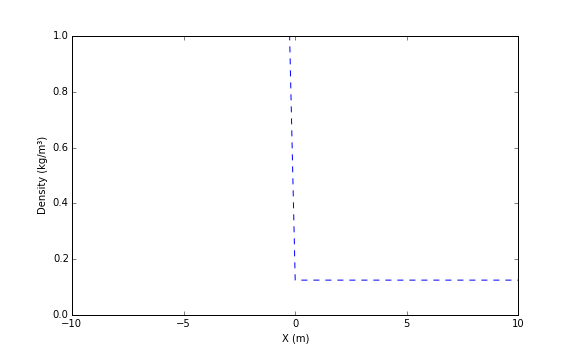
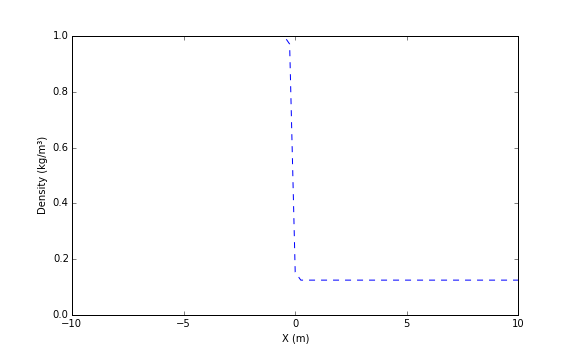
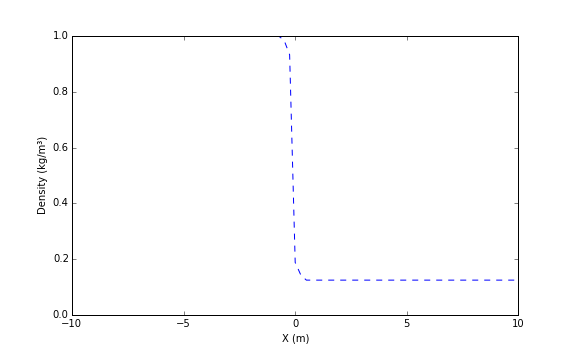
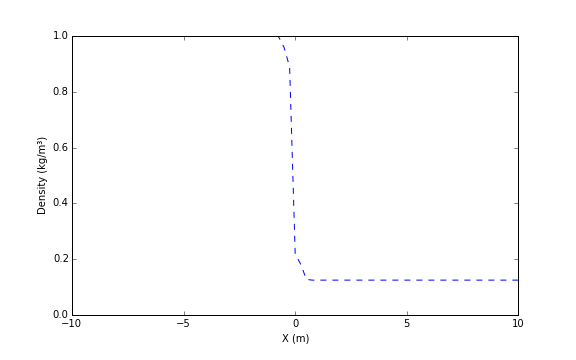
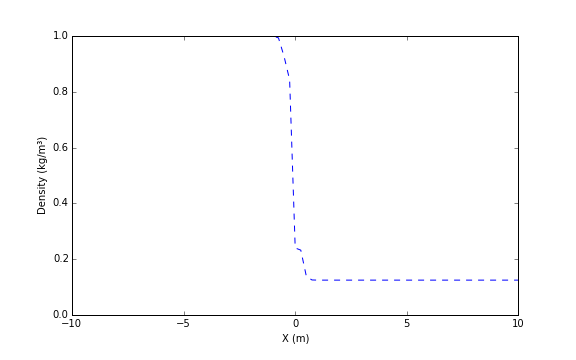
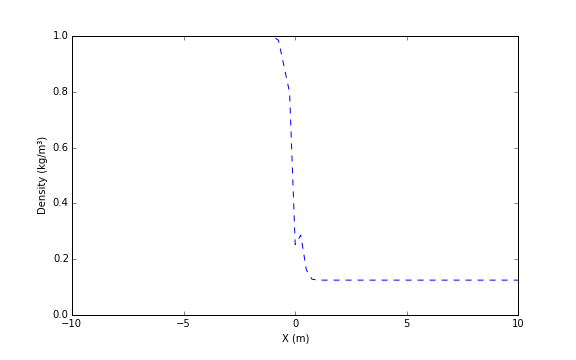
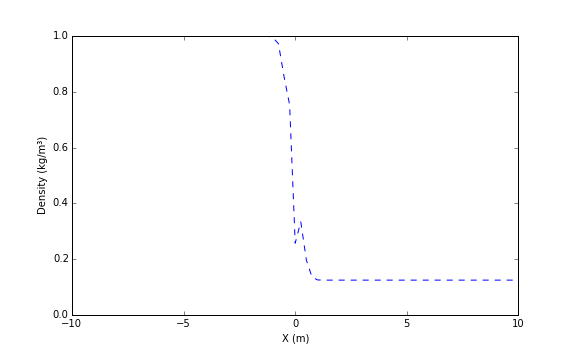
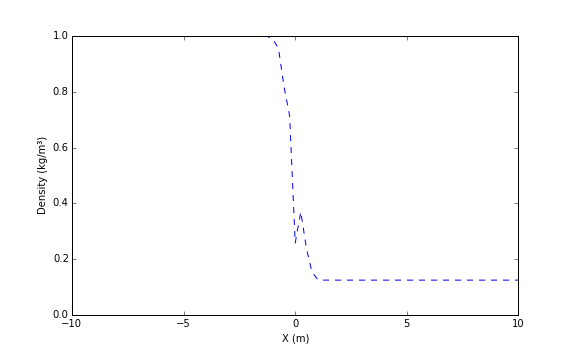
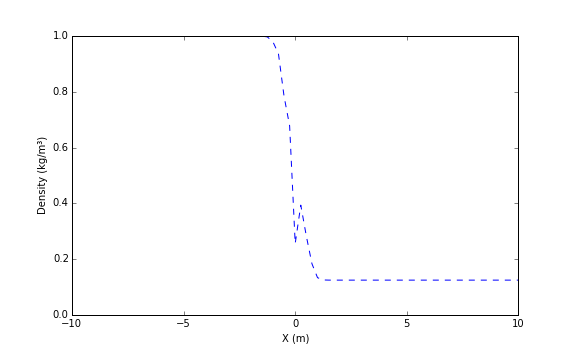
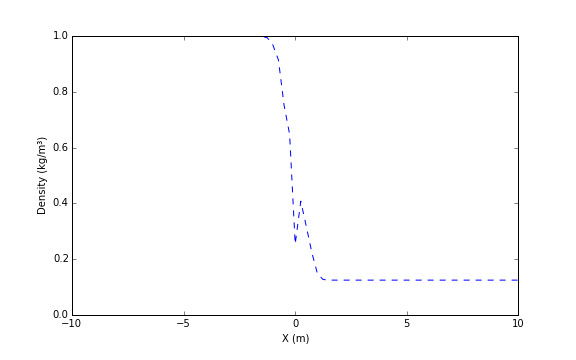
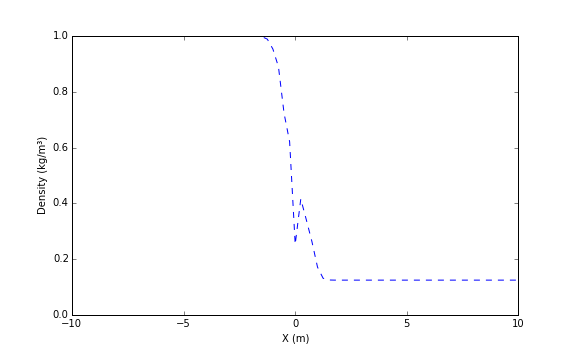
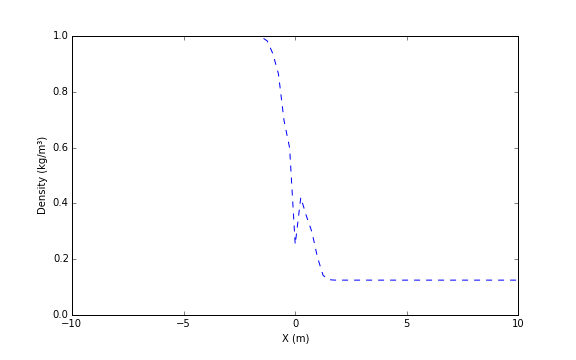
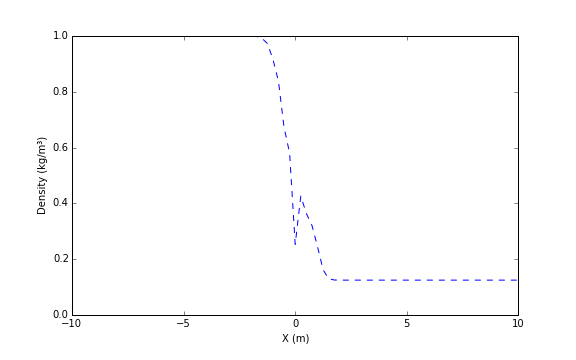
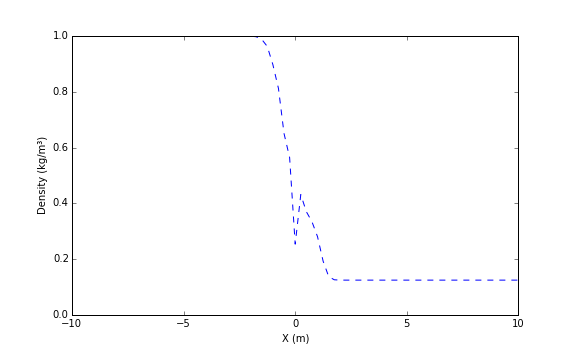
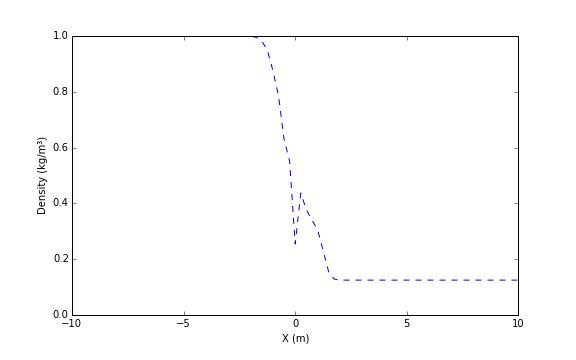
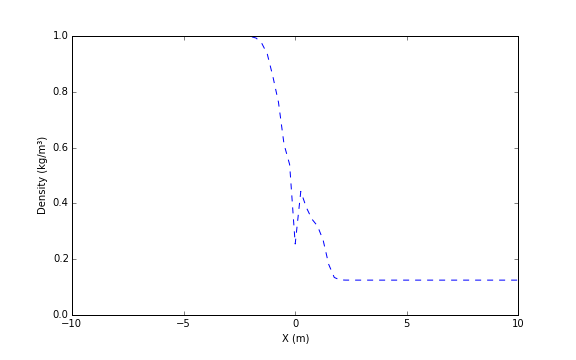
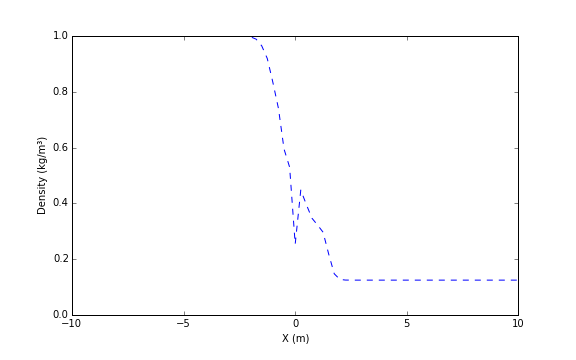
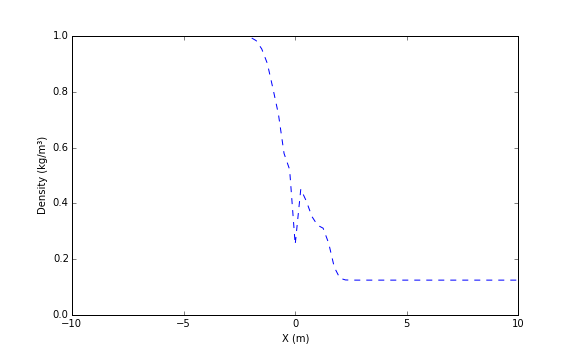
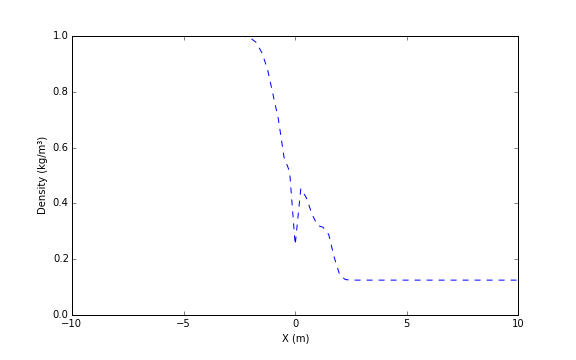
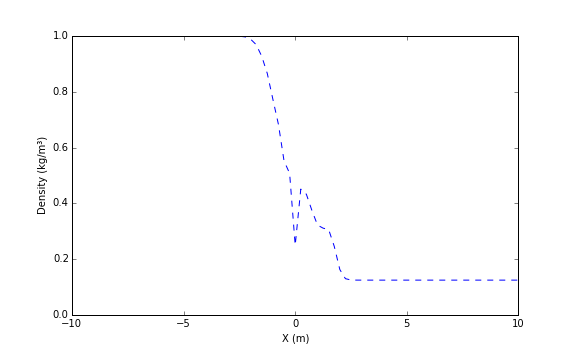
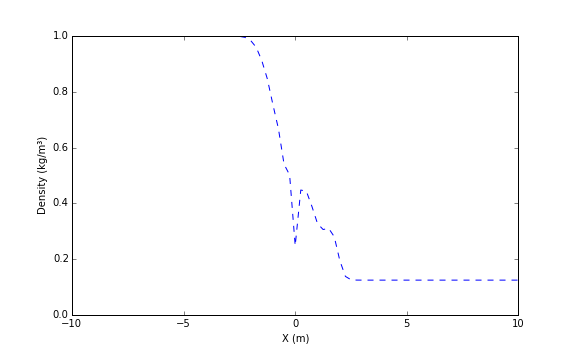
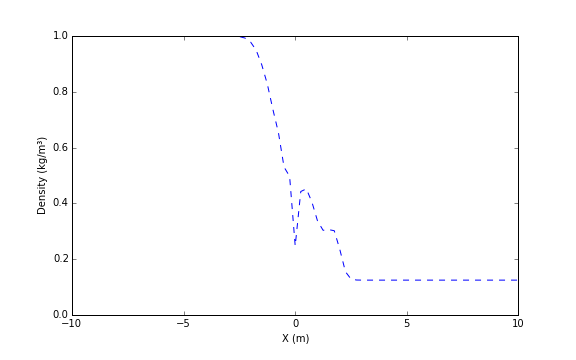
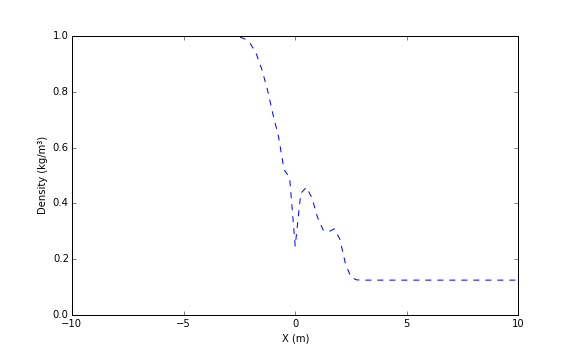
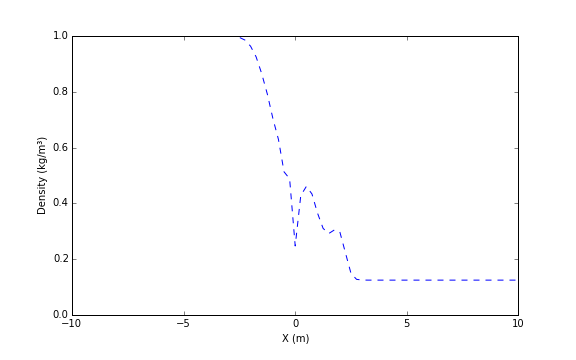
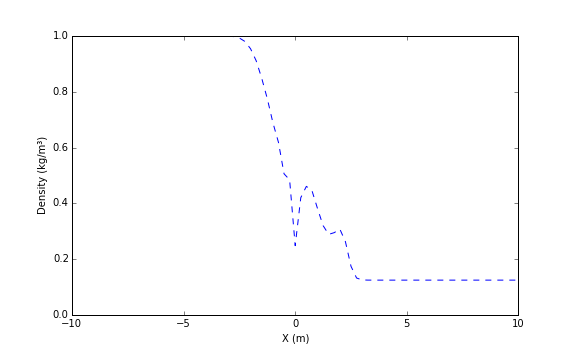
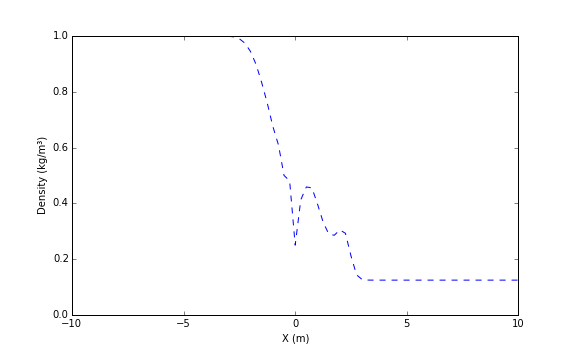
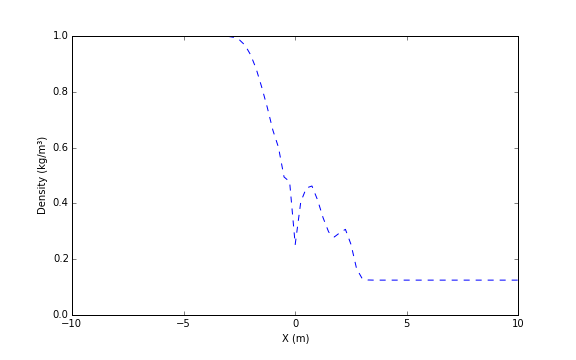
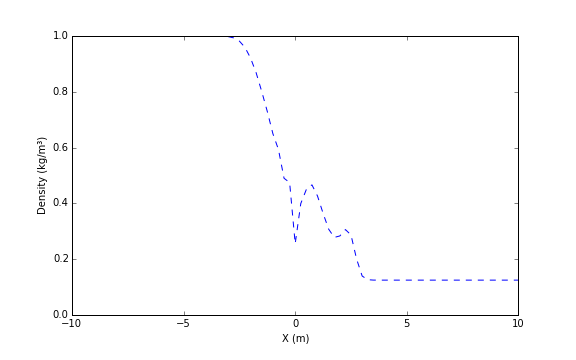
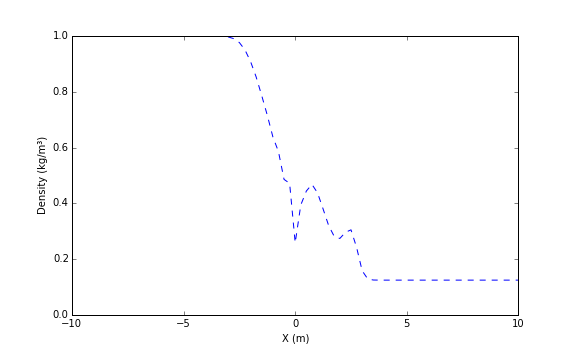
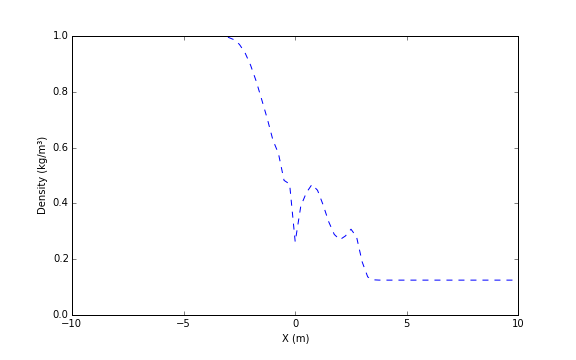
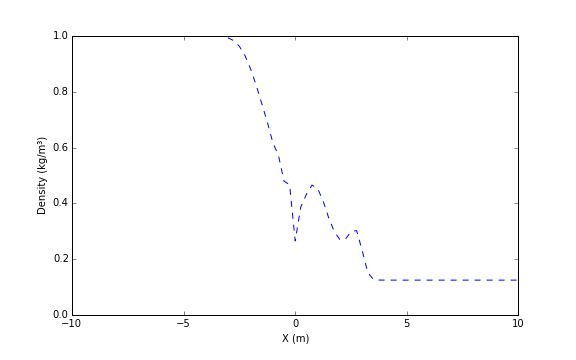
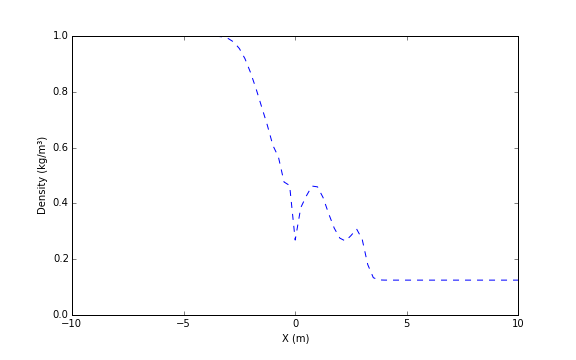
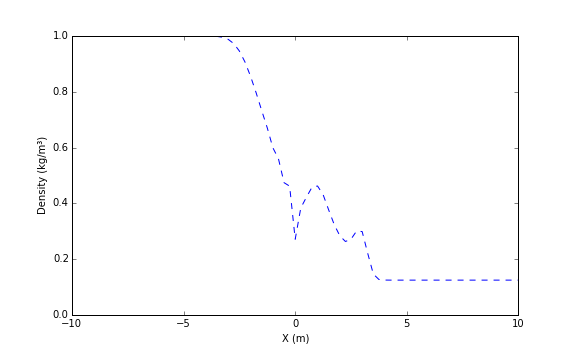
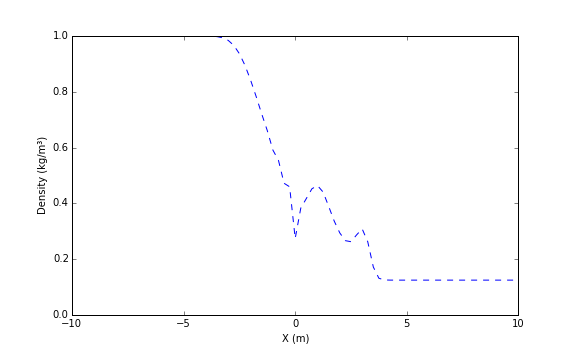
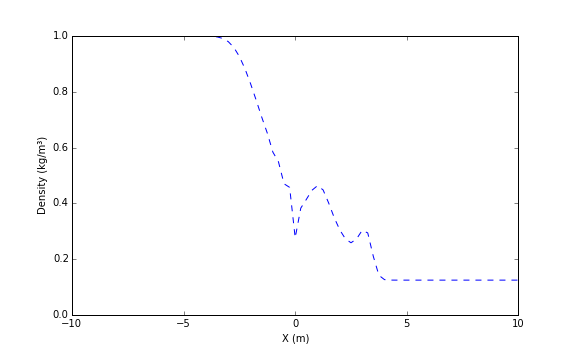
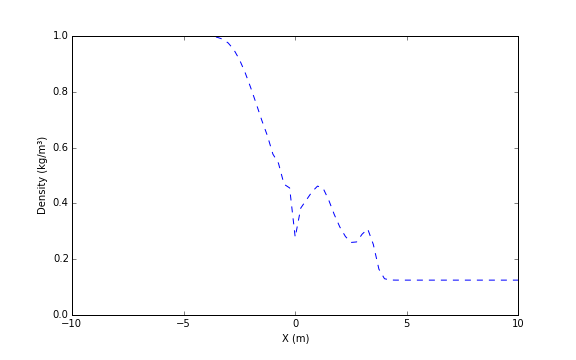
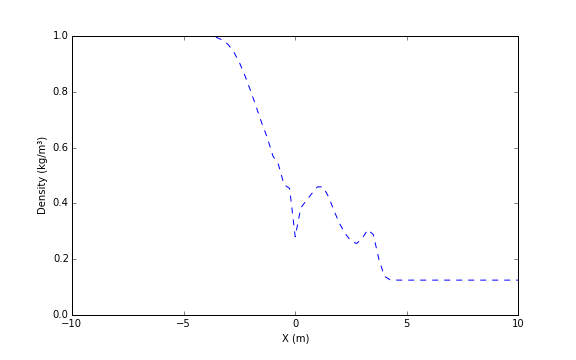
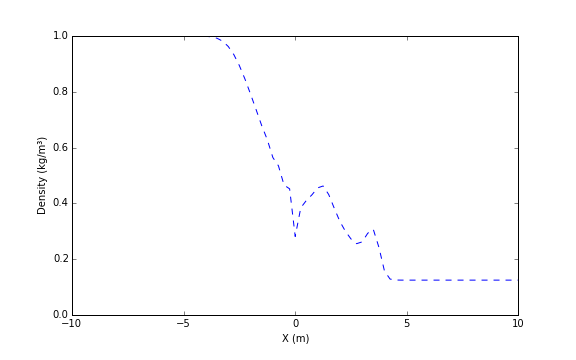
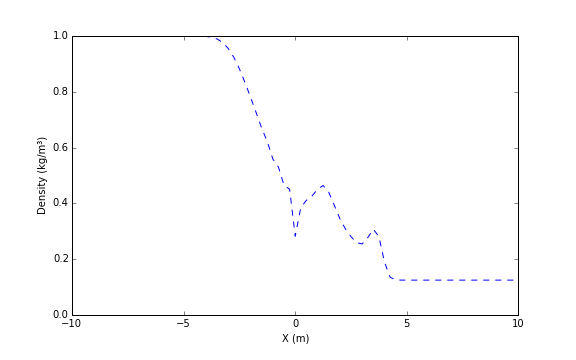
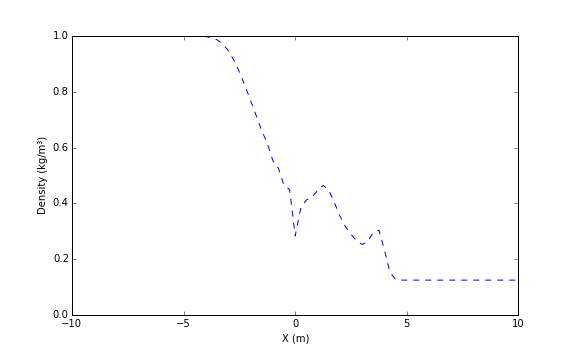
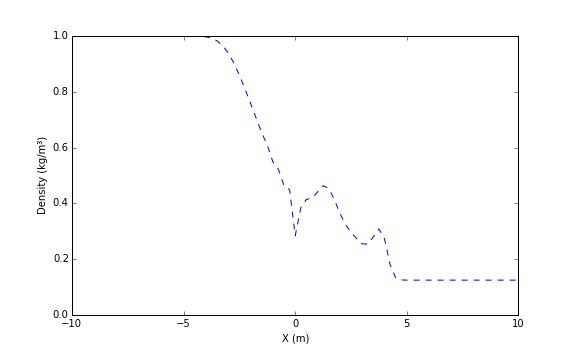
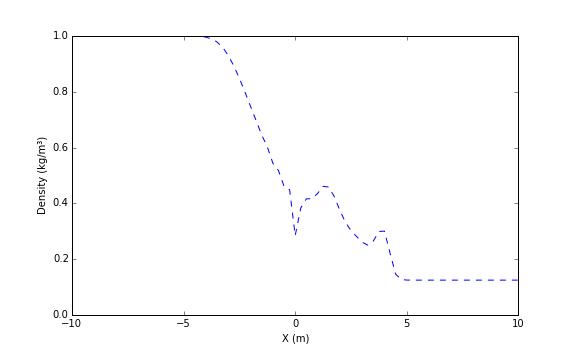
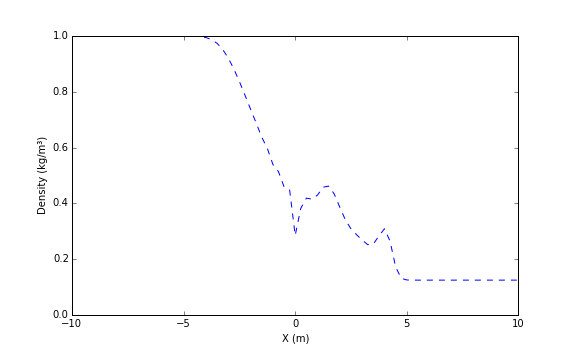
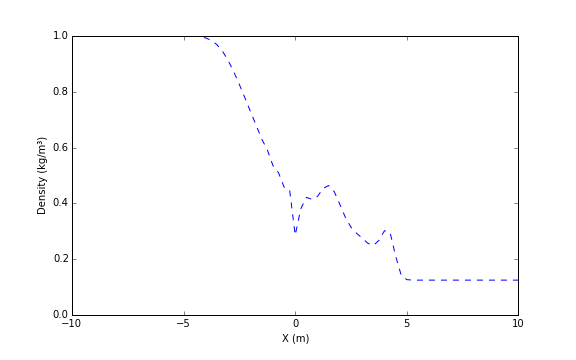
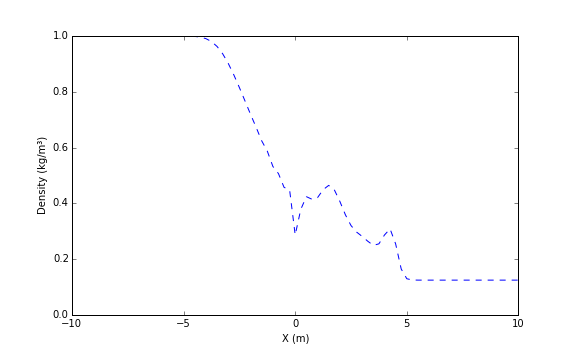
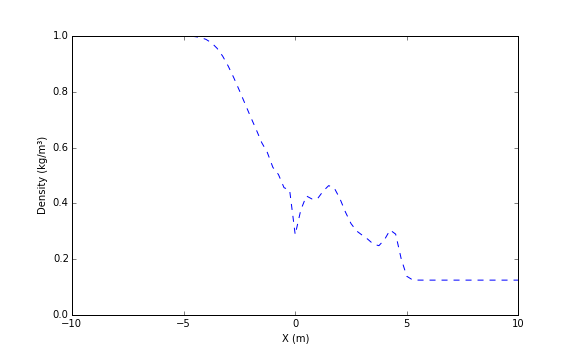
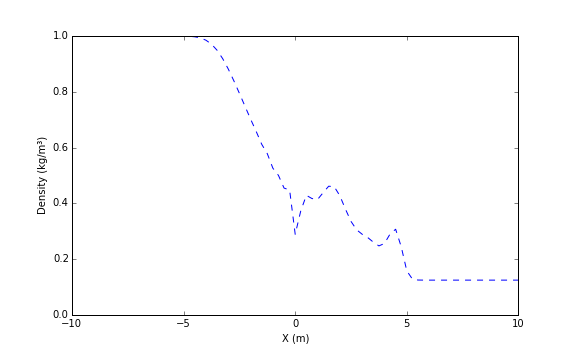
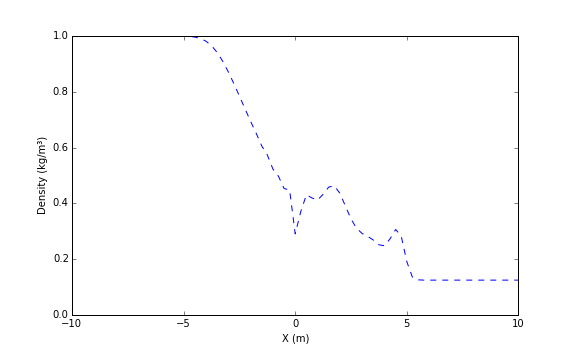
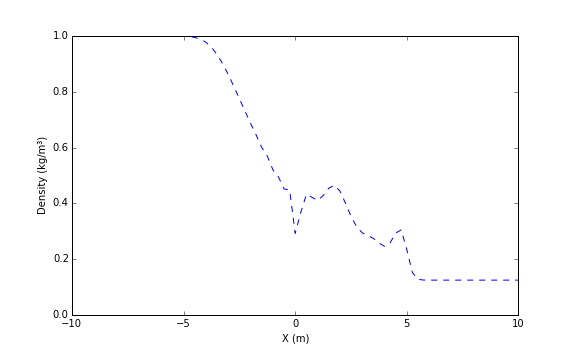
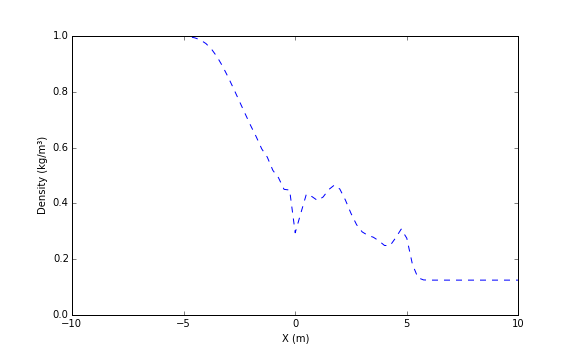
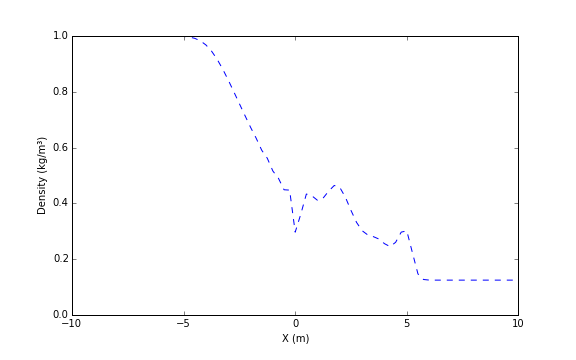
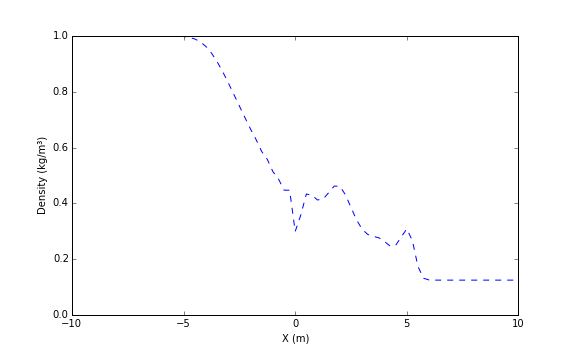
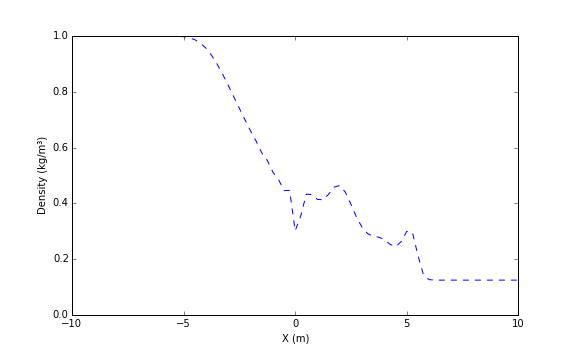
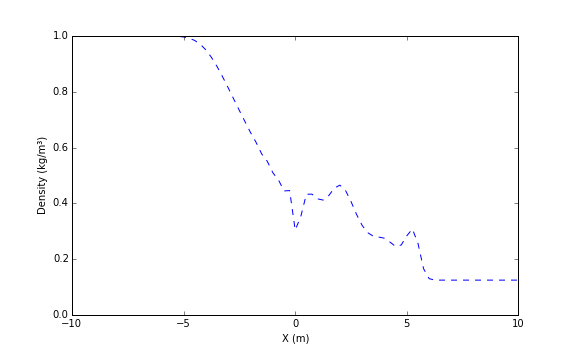
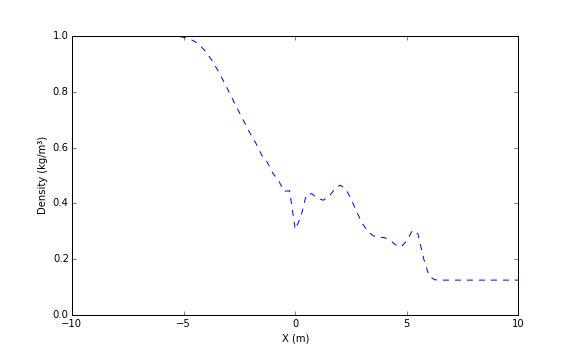
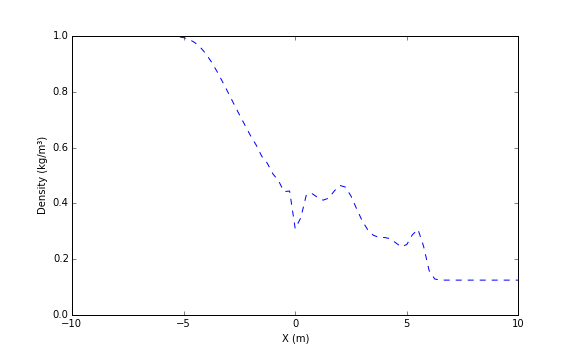
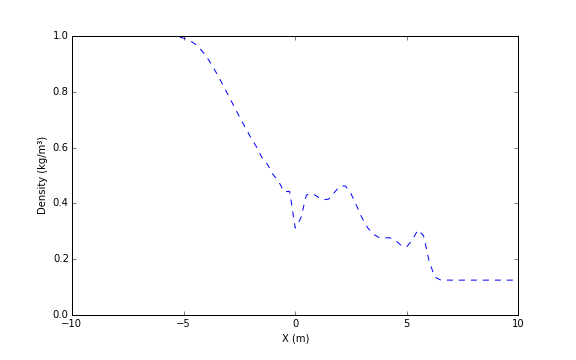
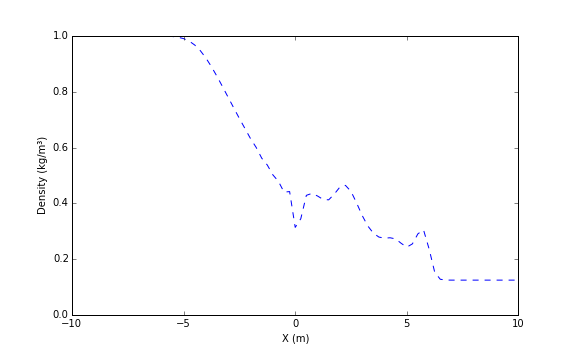
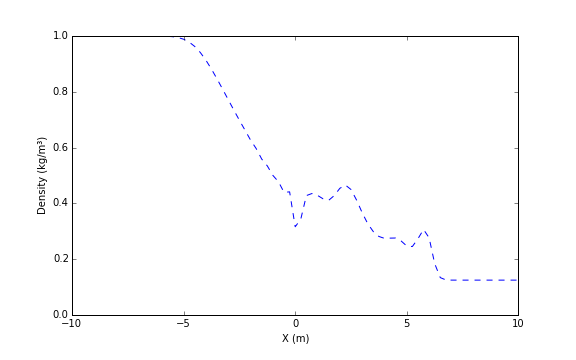
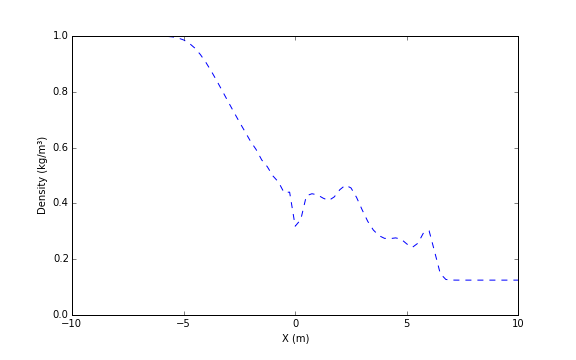
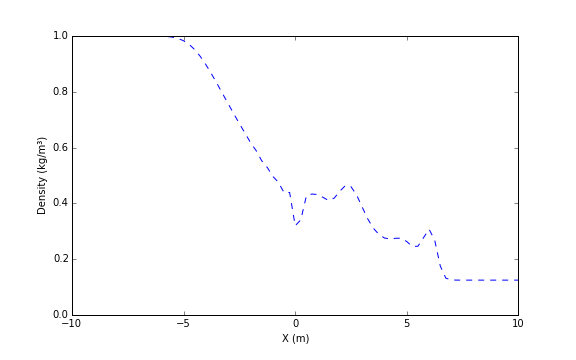
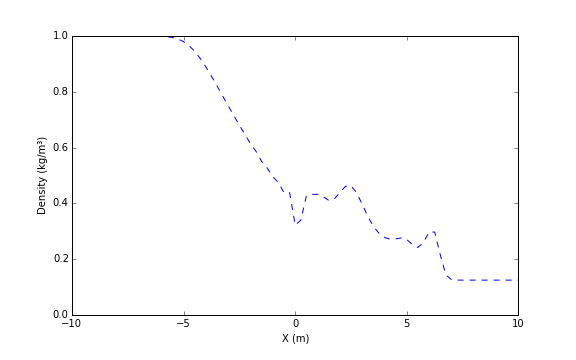
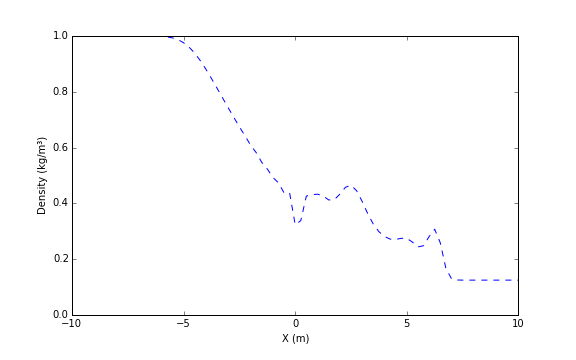
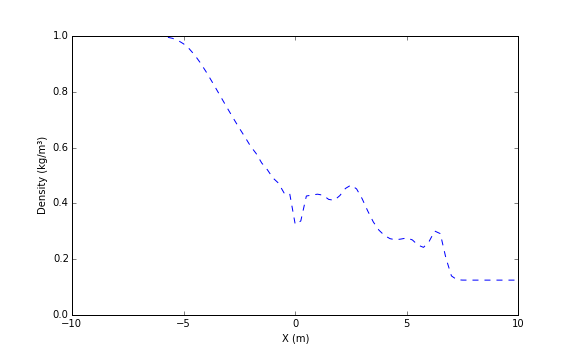
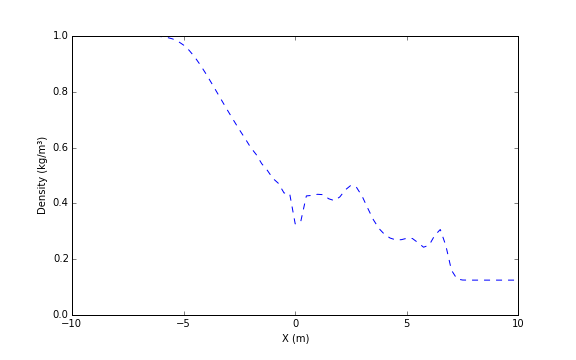
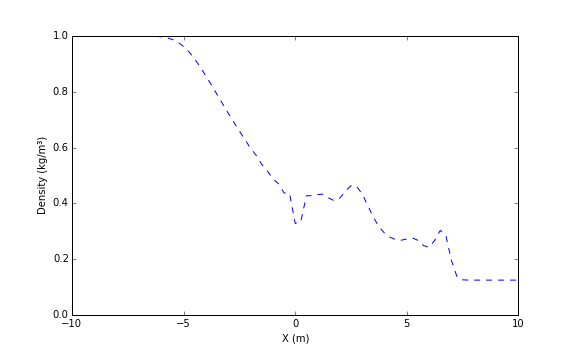
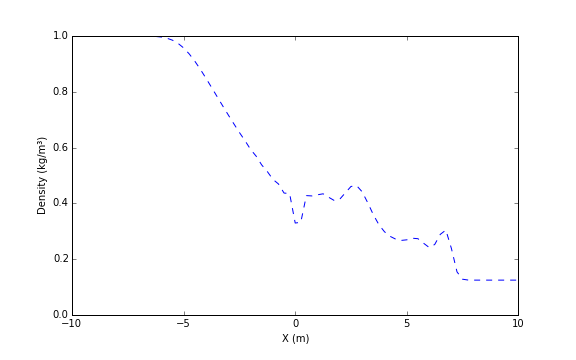
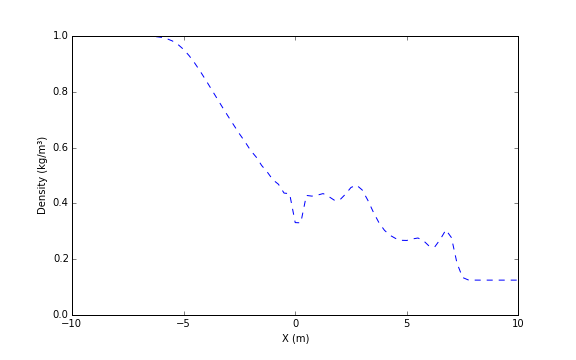
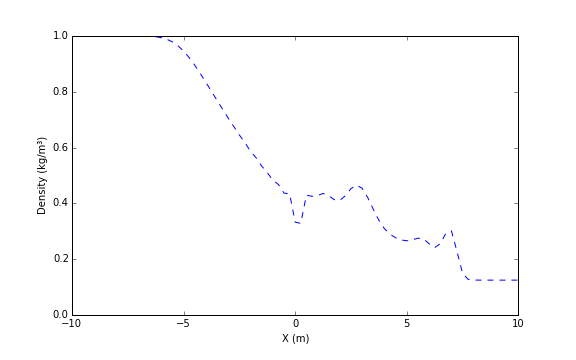
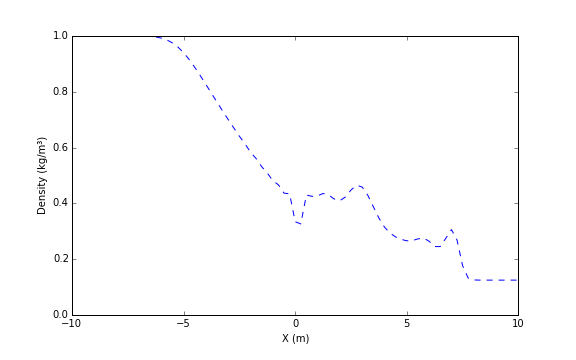
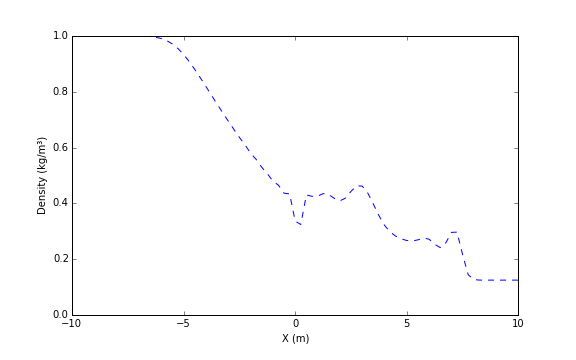
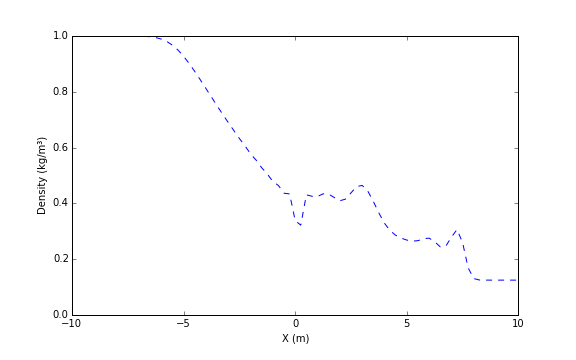
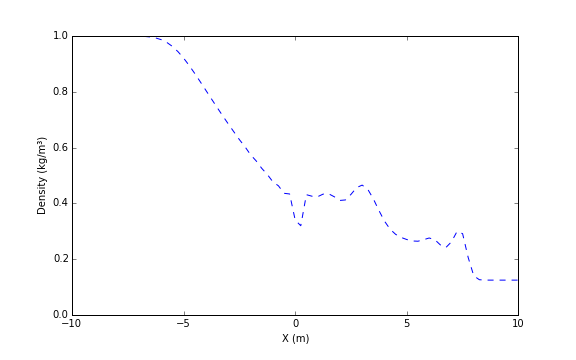
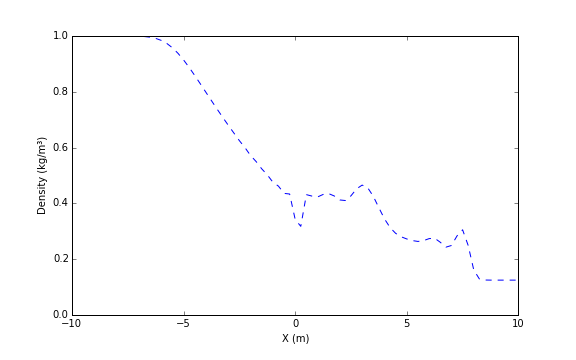
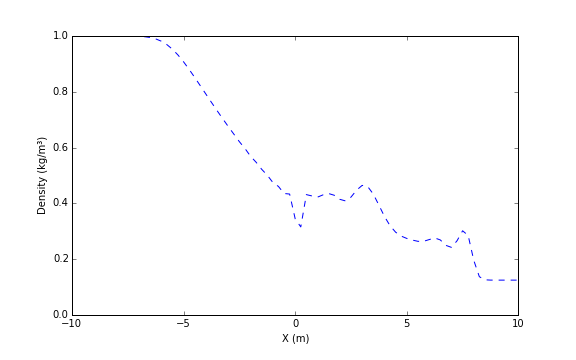
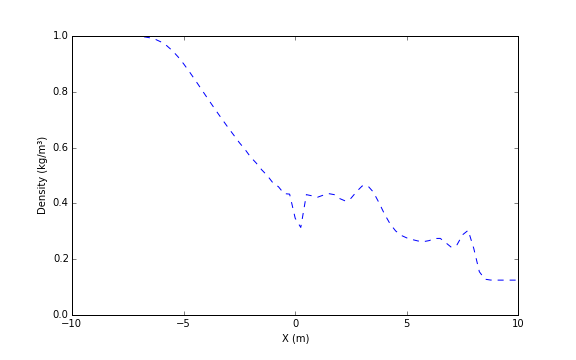
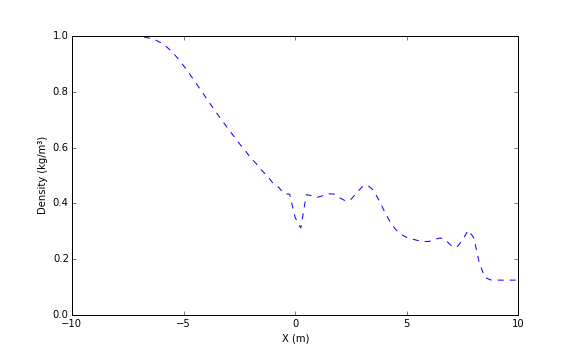
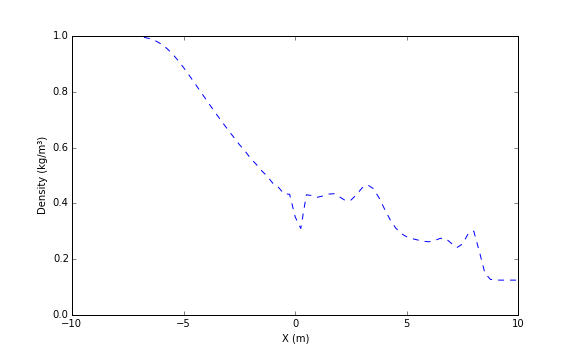
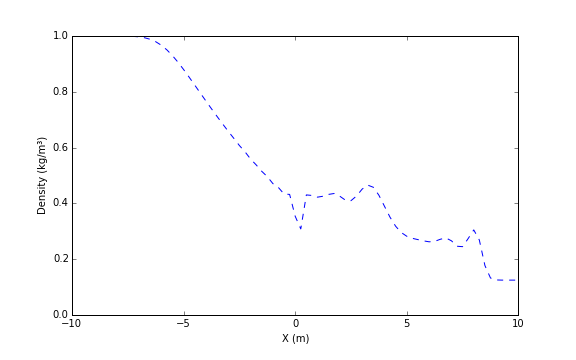
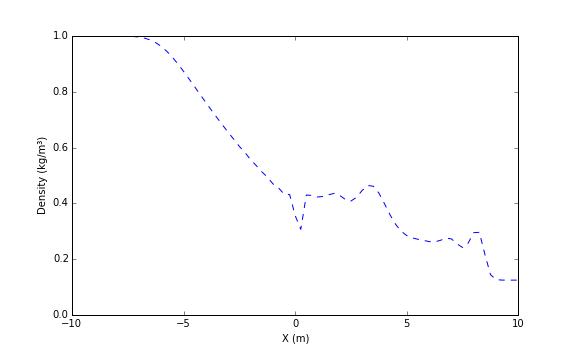
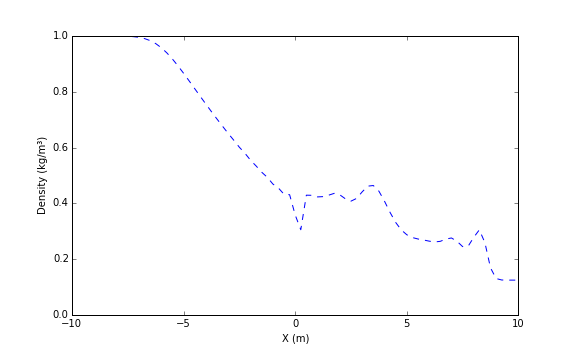
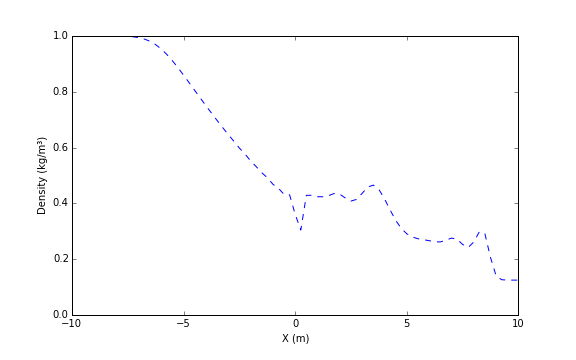
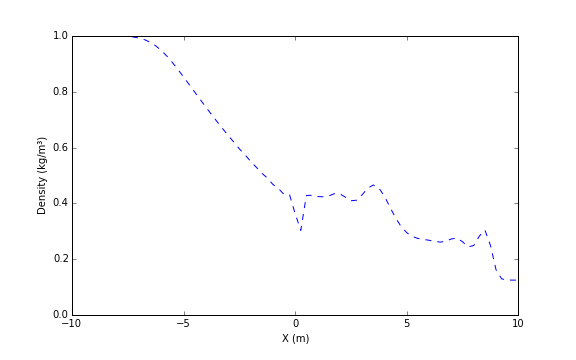
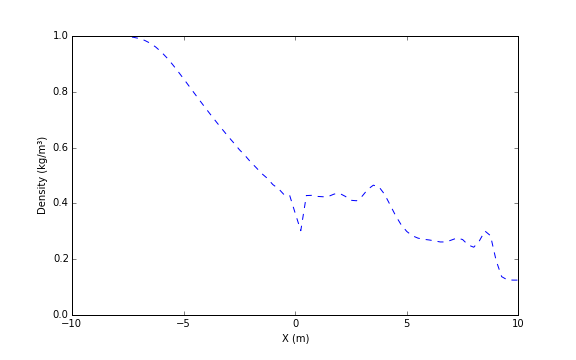
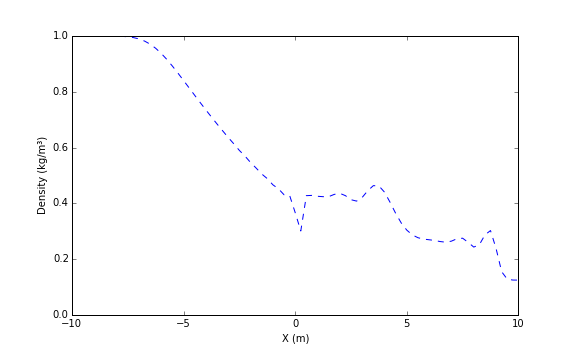
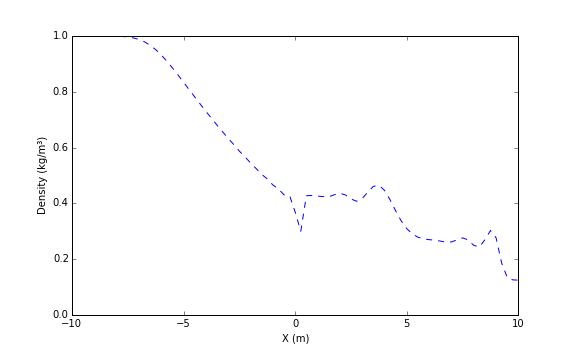
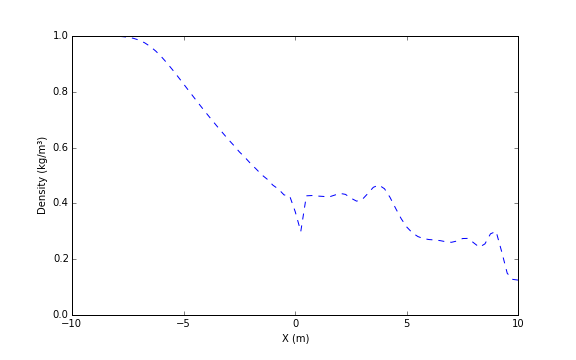
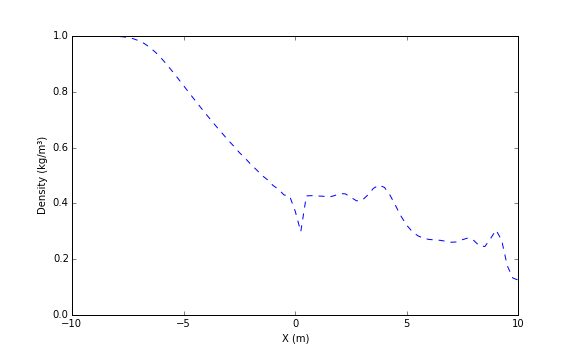
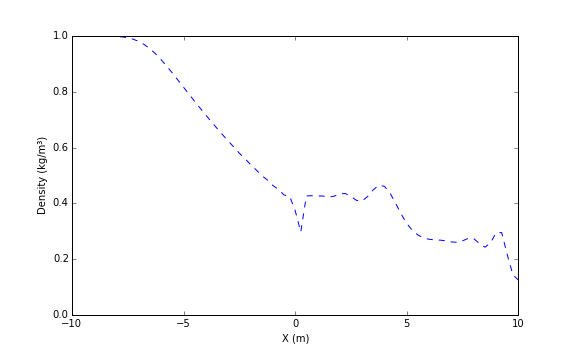
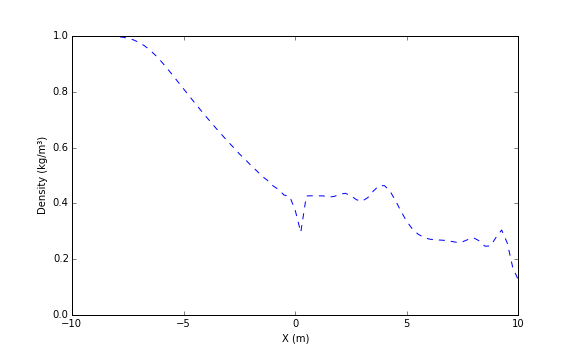
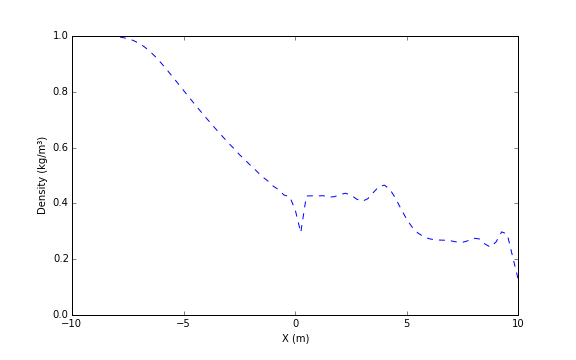
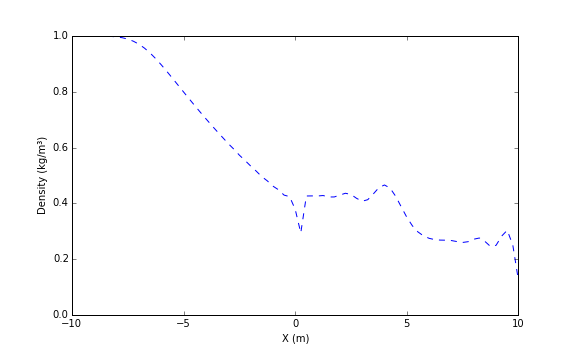
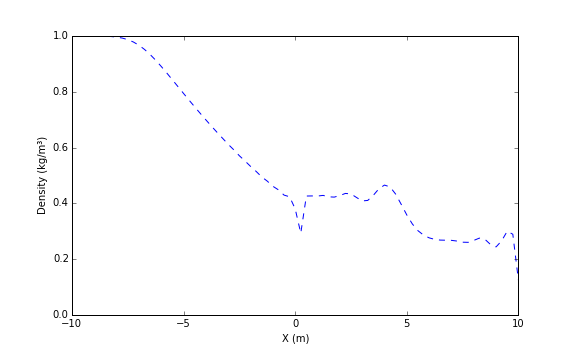
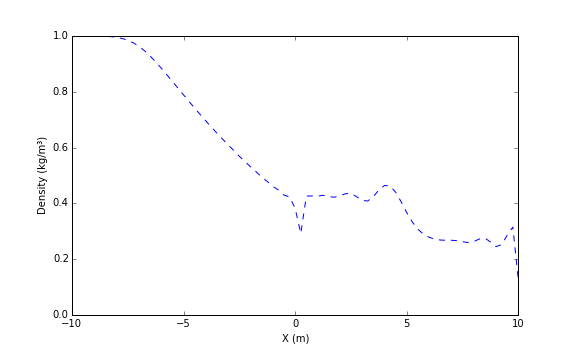
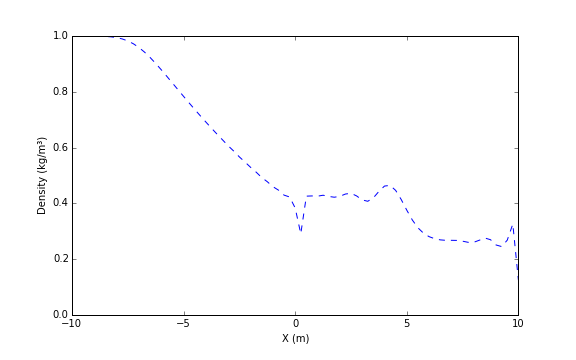
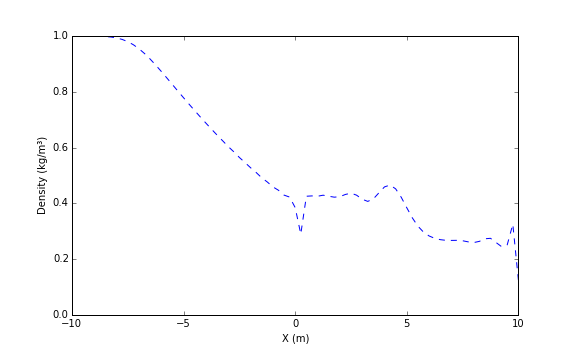
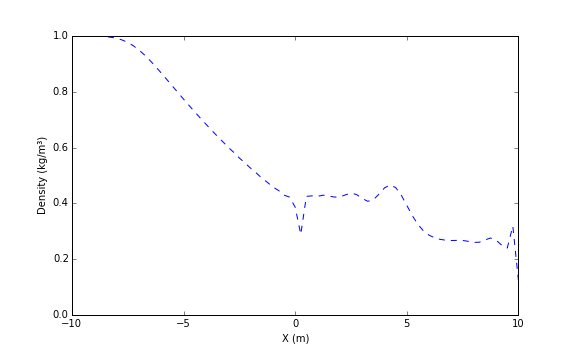
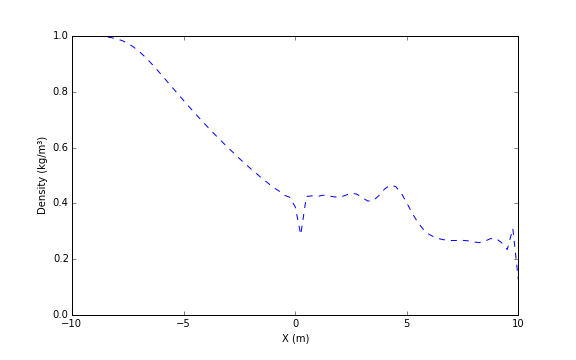
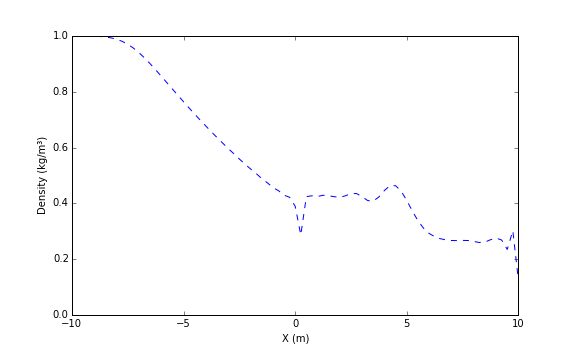
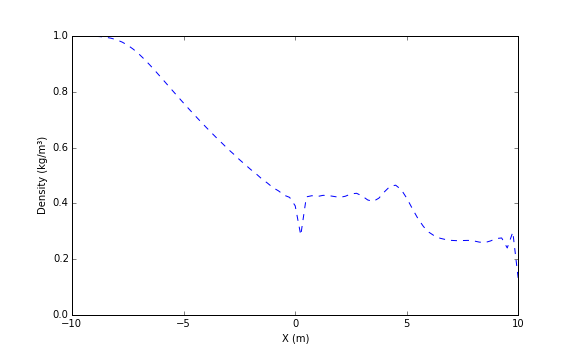
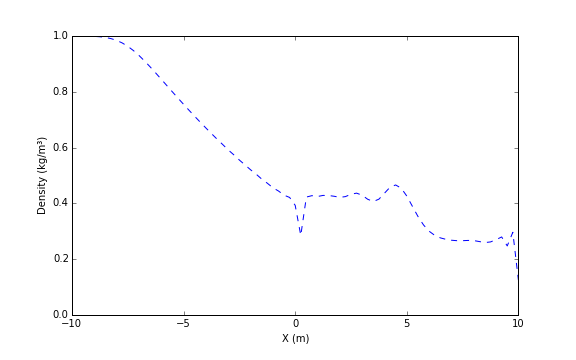
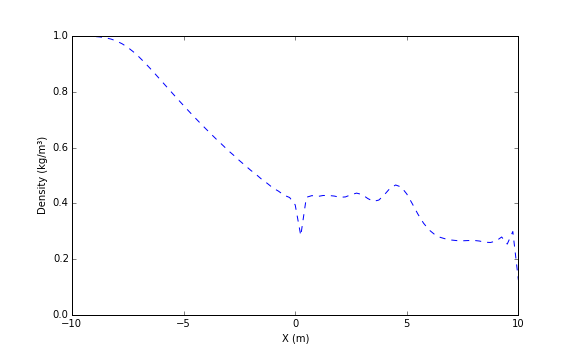
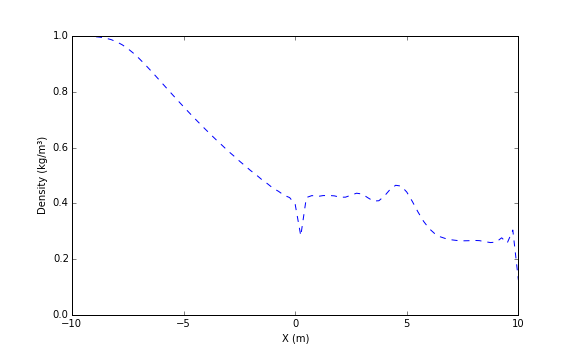
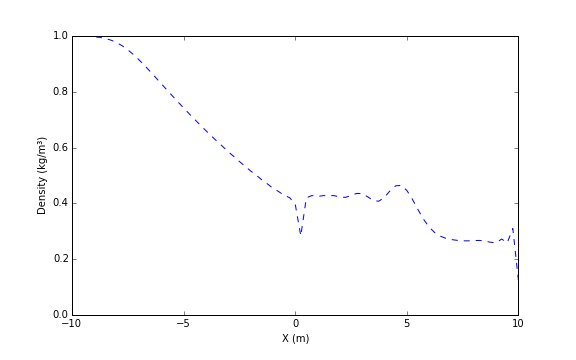
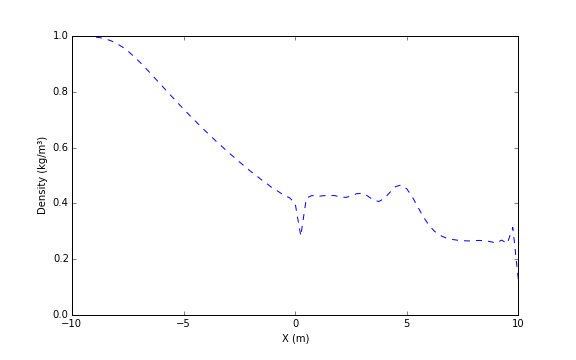
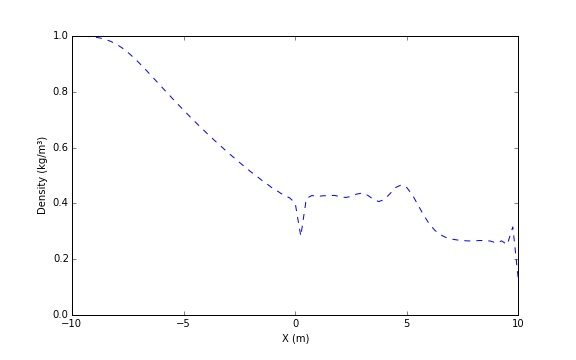
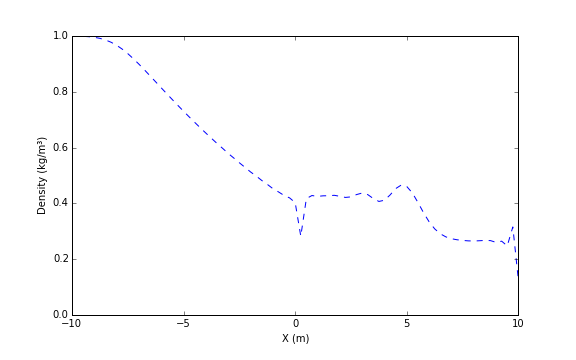
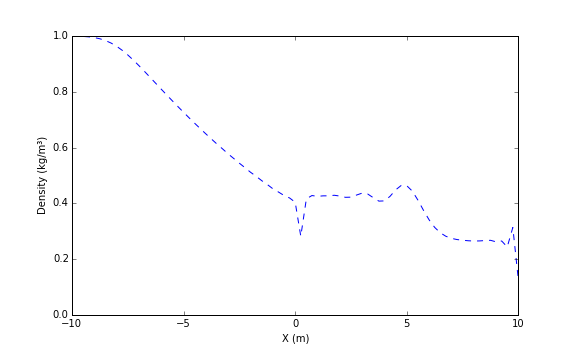
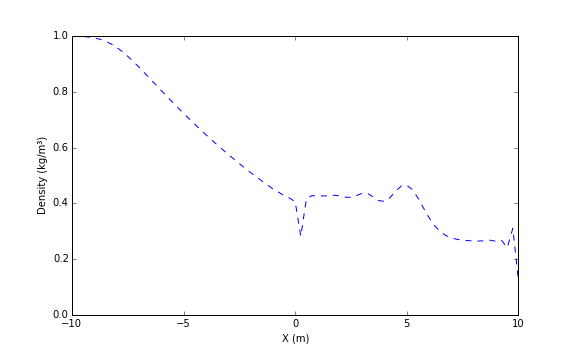
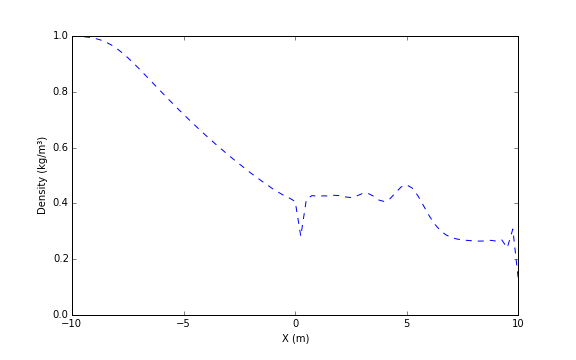
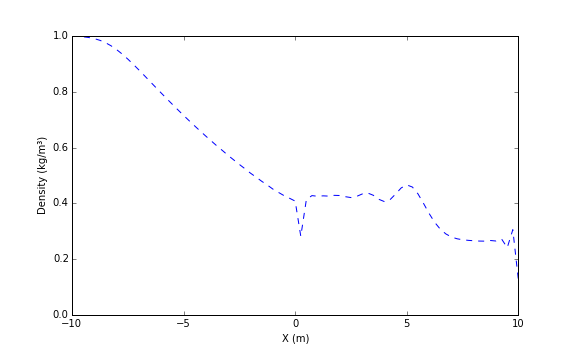
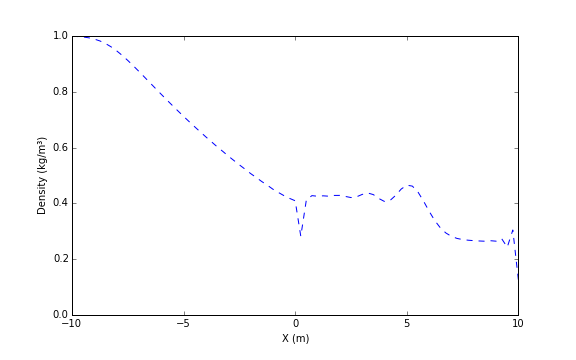
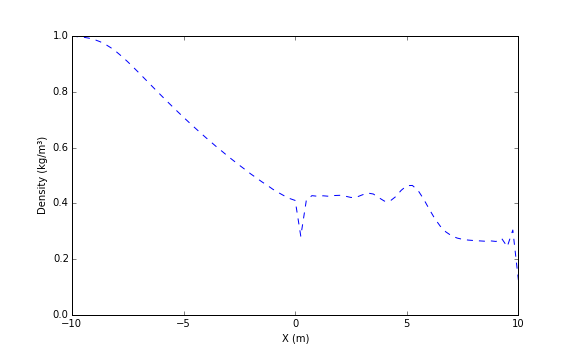
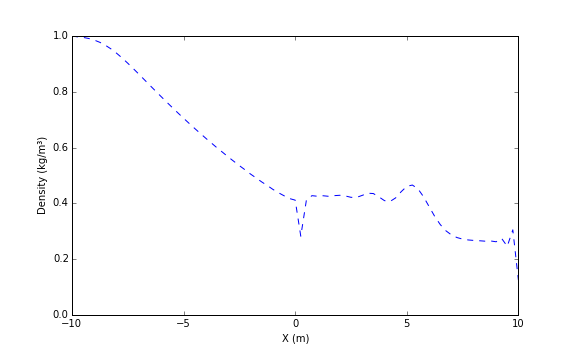
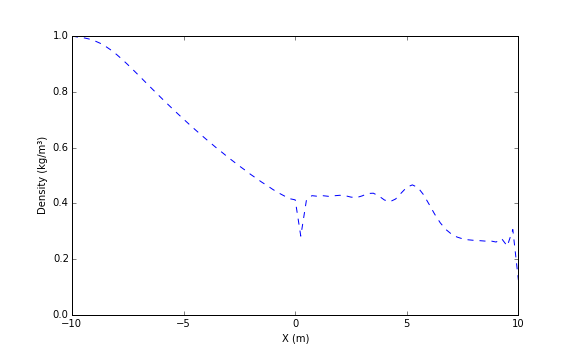
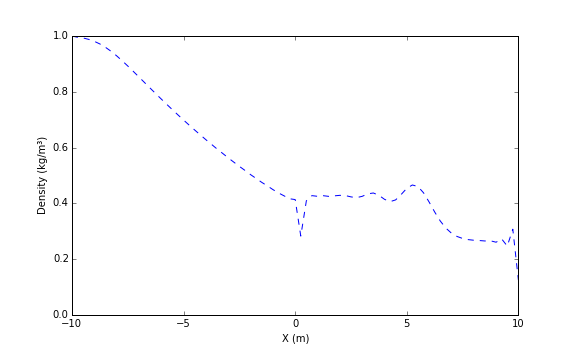
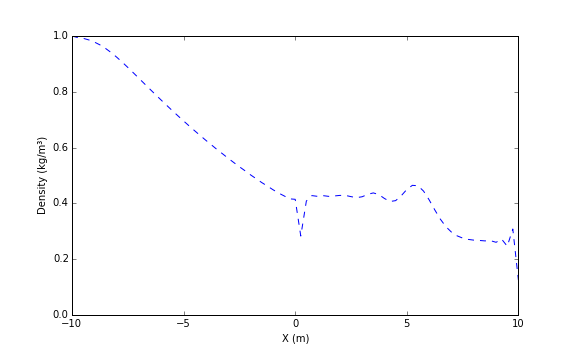
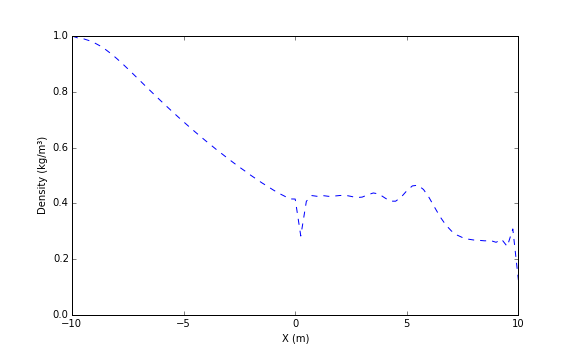
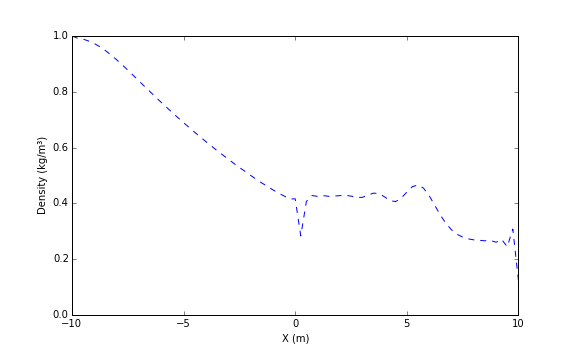
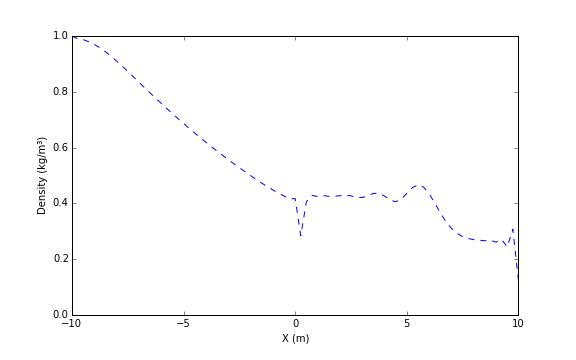
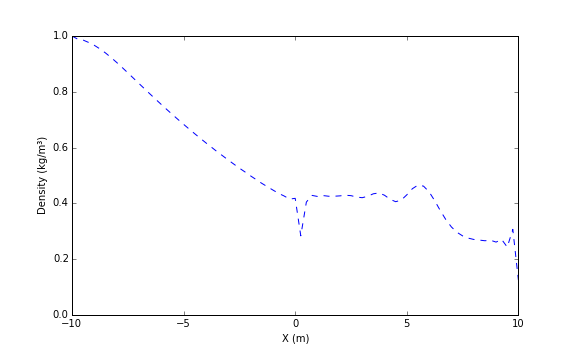
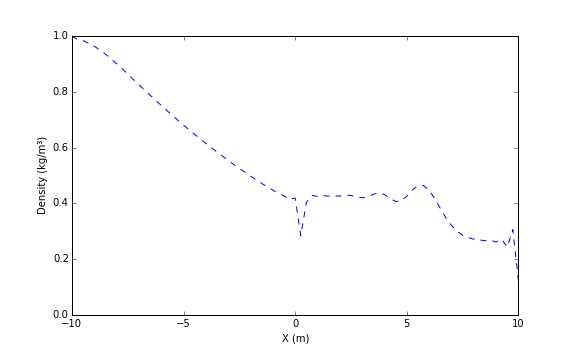
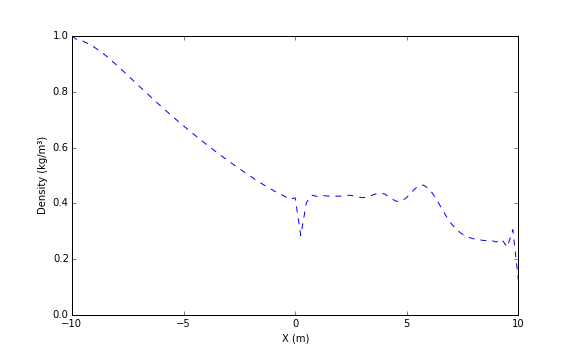
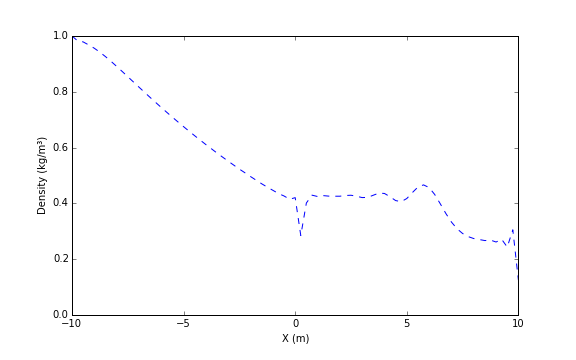
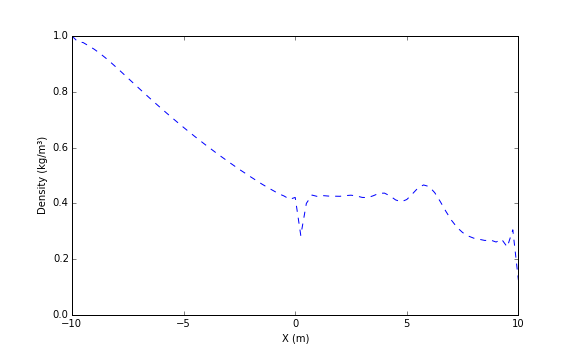
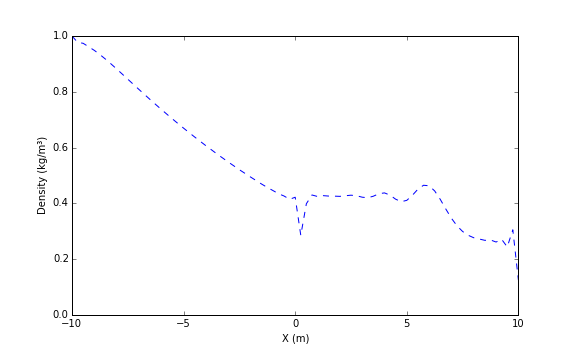
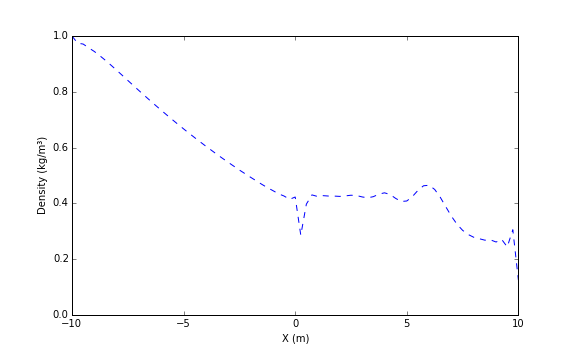
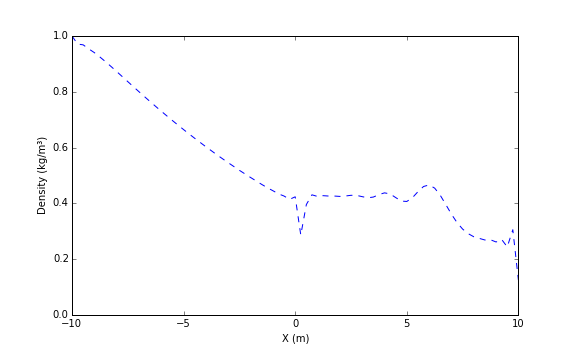
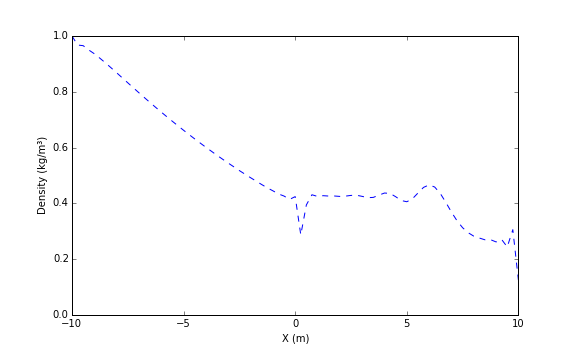
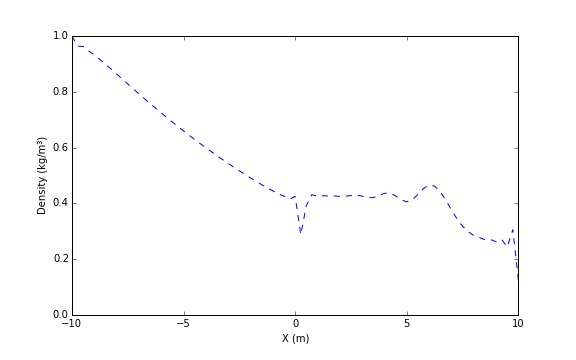
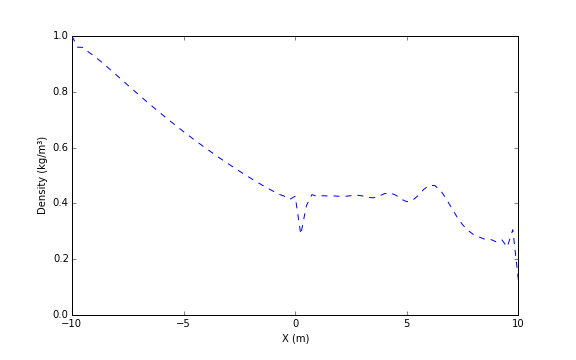
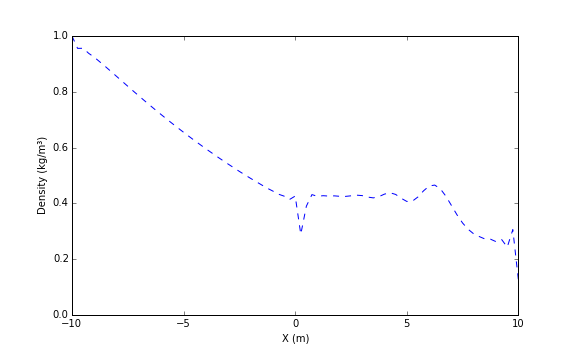
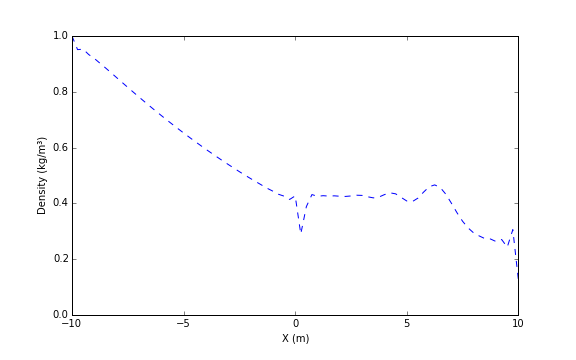
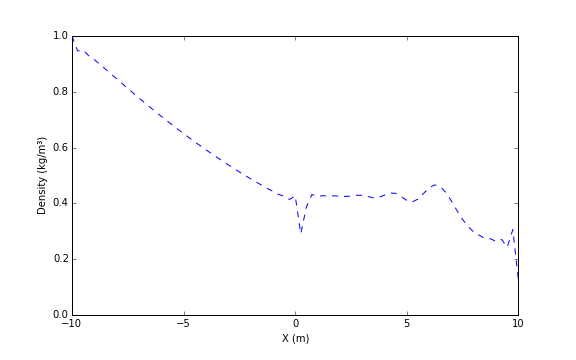
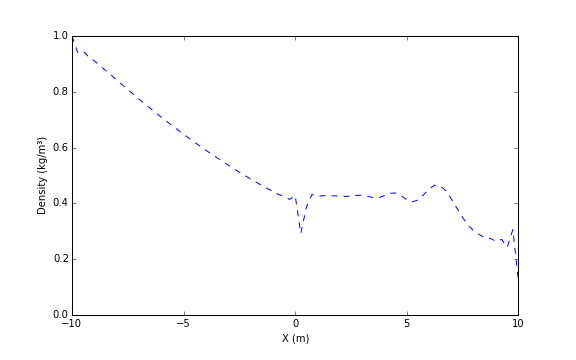
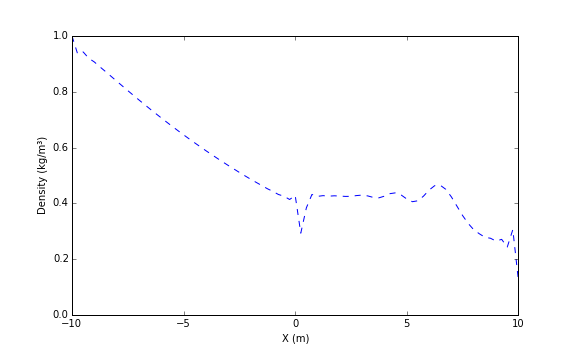
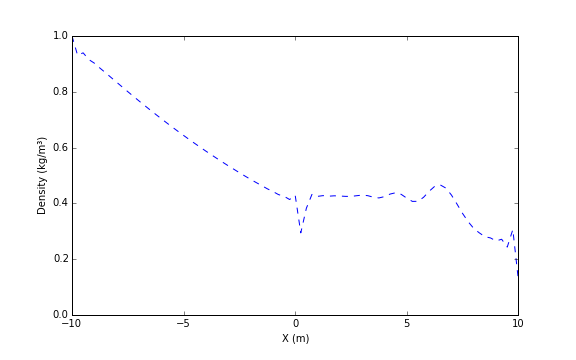
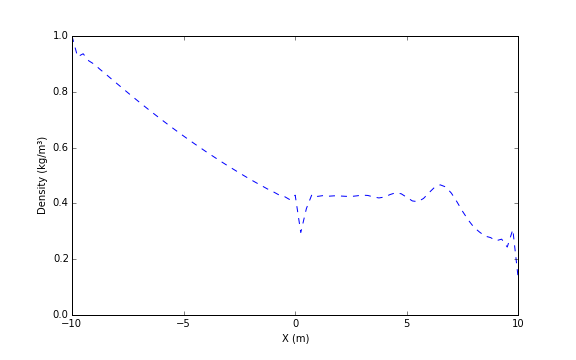
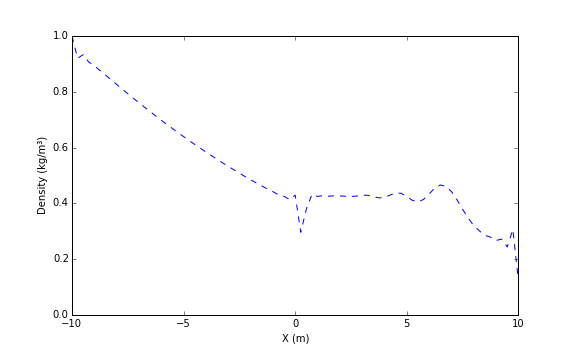
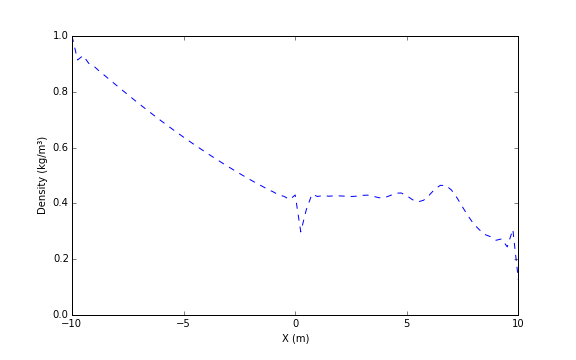
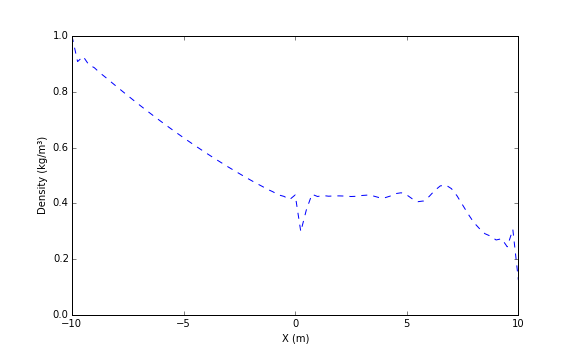
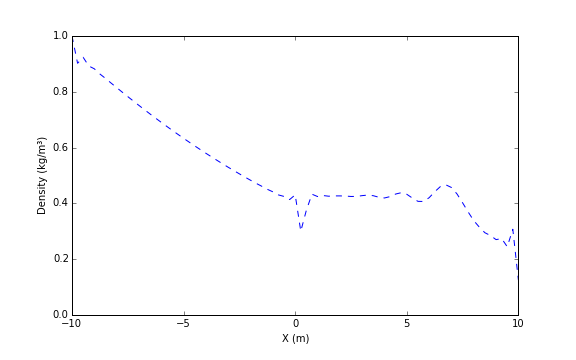
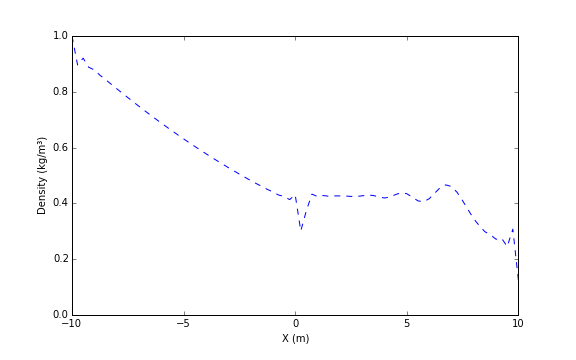
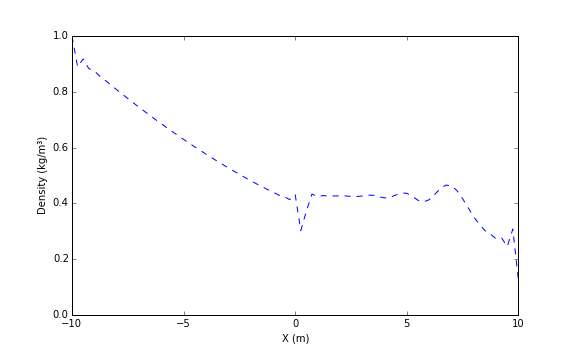
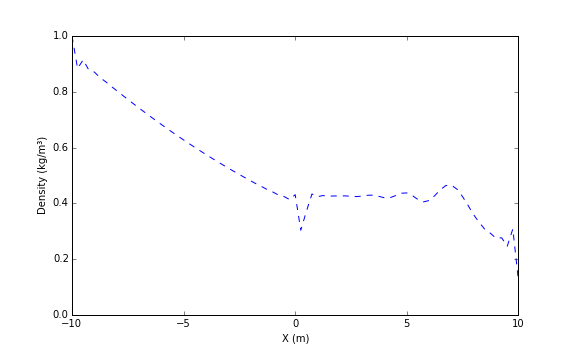
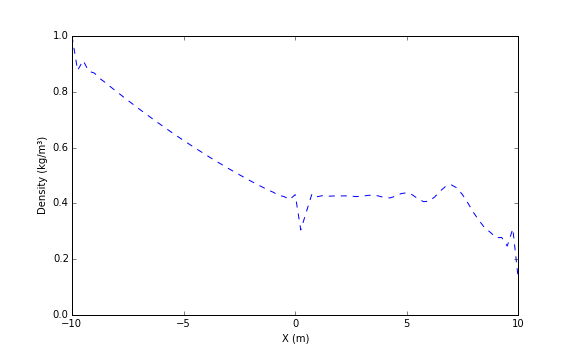
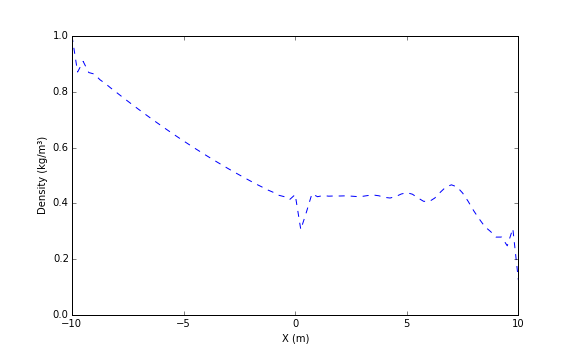
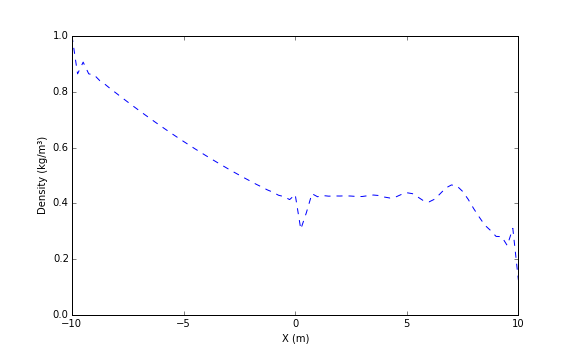
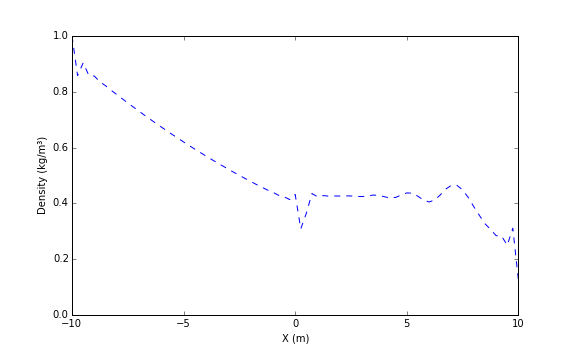
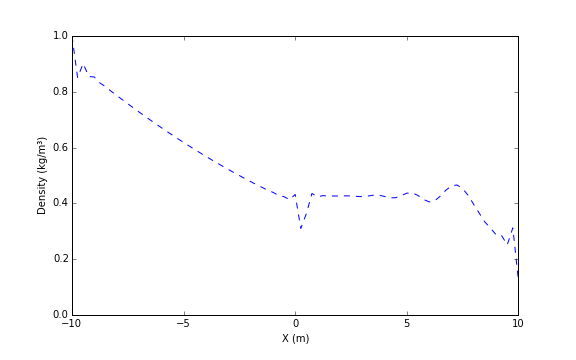
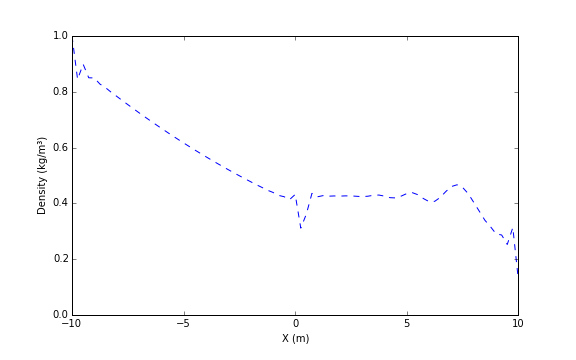

In [6]:
def V(U):
    nt = len(U)
    nx = len(U[0][1])
    v = U[:,1,:]/U[:,0,:]
    return v
def P(U):
    nt = len(U)
    nx = len(U[0][1])
    p= (1.4-1)*(U[:,1,:]-0.5*U[:,1,:]*U[:,1,:]/U[:,0,:])
    return p
    
def visual(Utot,U,ylimite,labelx,labely):
    from JSAnimation.IPython_display import display_animation
    from matplotlib import animation
    fig=plt.figure(figsize=(8,5))
    ax=plt.axes(xlim=(-10,10),ylim = ylimite,xlabel = labelx,ylabel=labely)
    line=ax.plot([],[],ls='--')[0]
    lis = np.ones(nx)
    x = np.linspace(-10, 10, num=81)
    if U == 0:
        ls = Utot[:,U,:]
    if U == 1:
        ls = V(Utot)
    if U == 2:
        ls = P(Utot)
    def anim(i):
        line.set_data(x,lis)
        lis[:]=ls[i]
    return animation.FuncAnimation(fig, anim,
                        frames=len(ls),interval=100)

visual(Utot,0,(0,1),"X (m)","Density (kg/m³)")



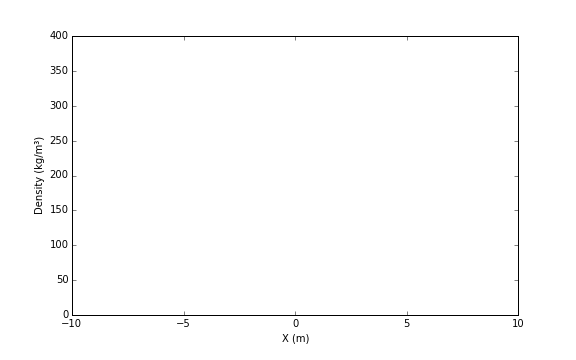
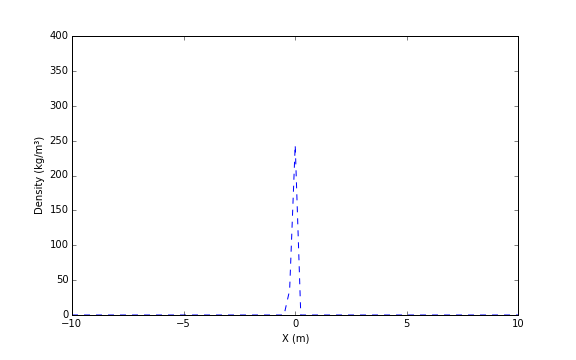
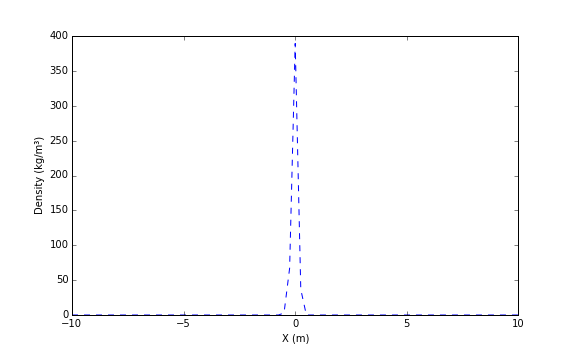
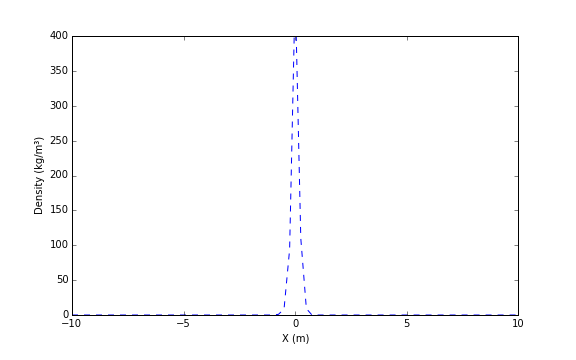
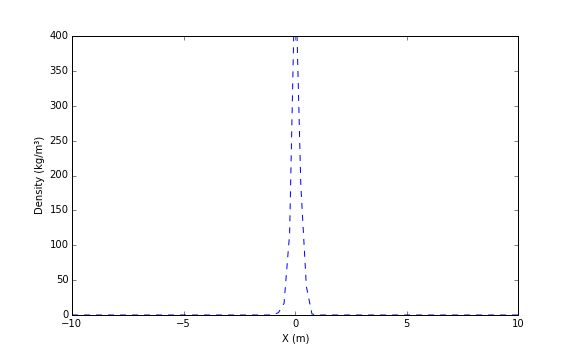
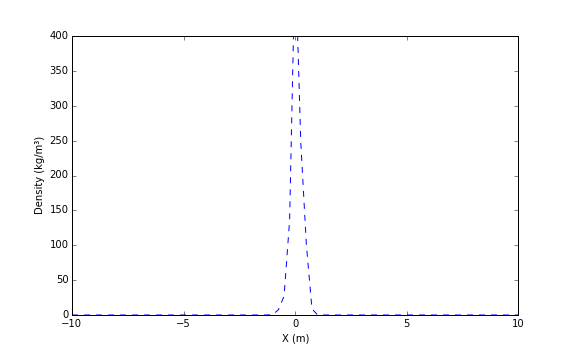
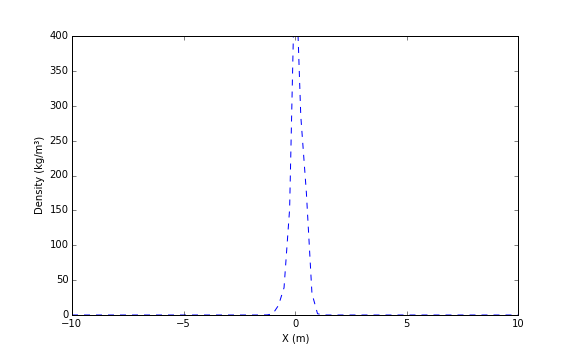
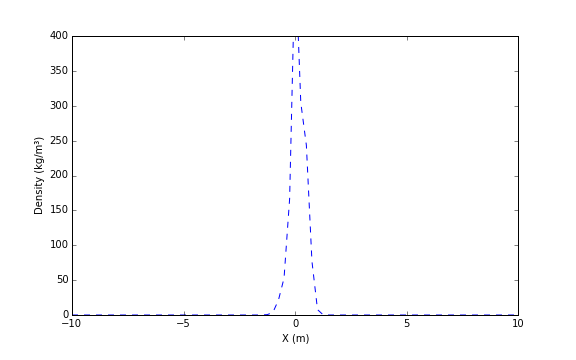
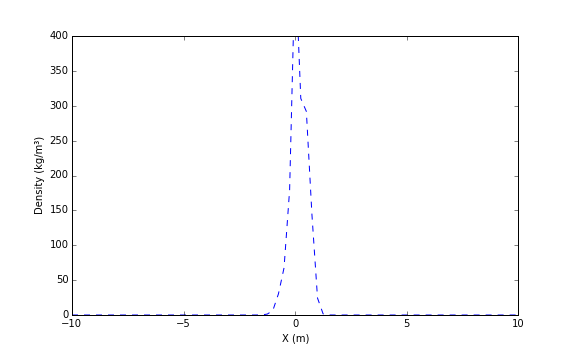
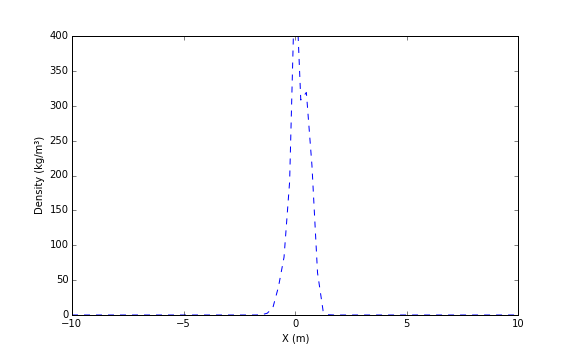
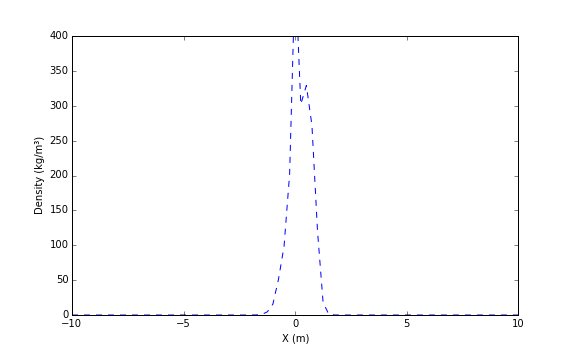
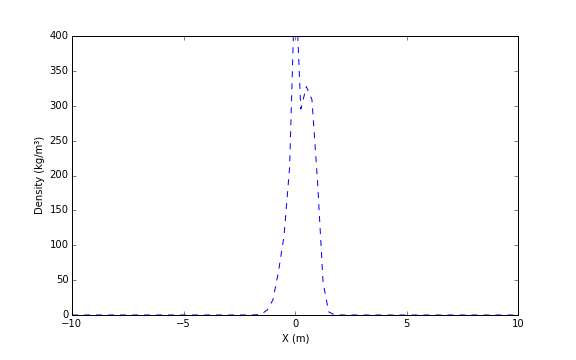
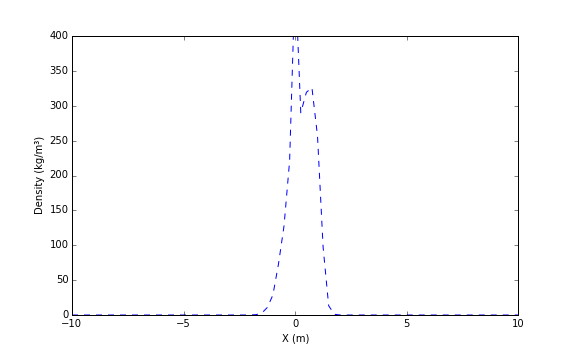
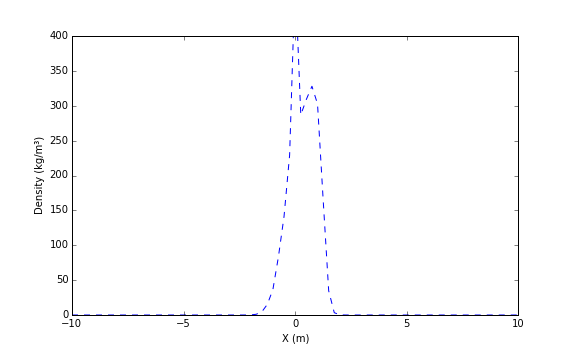
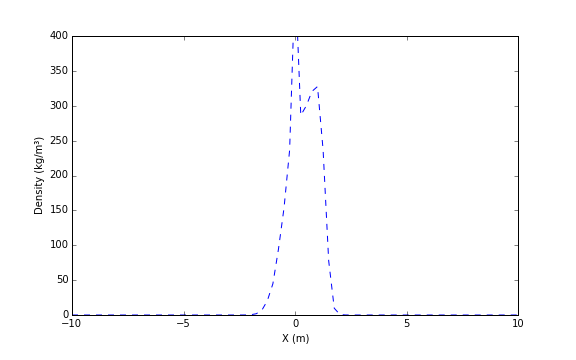
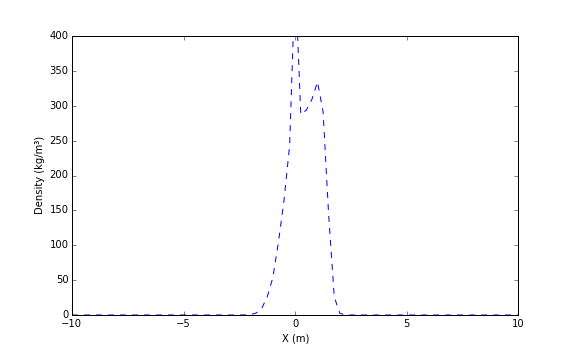
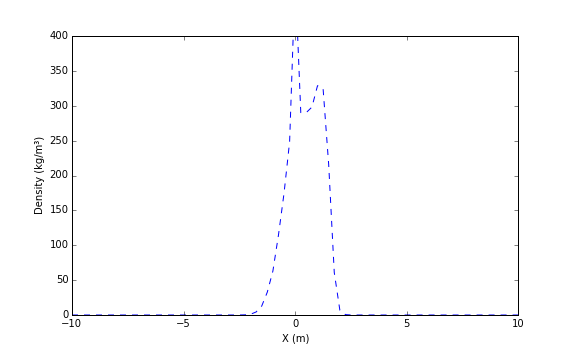
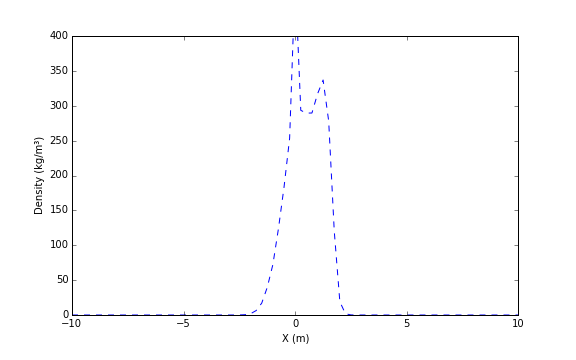
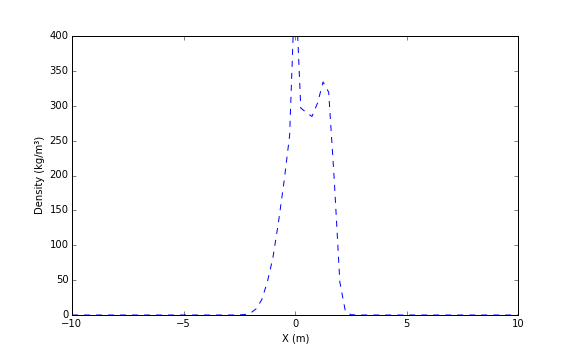
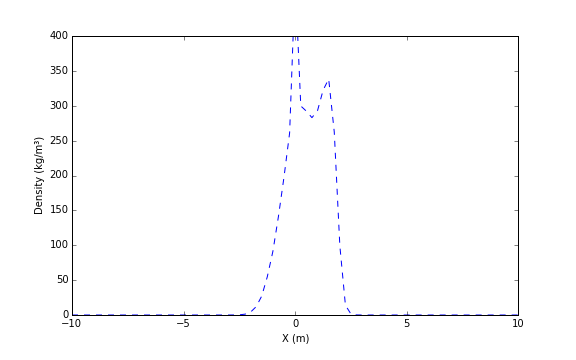
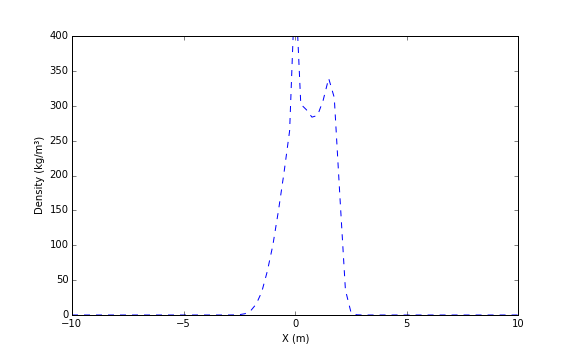
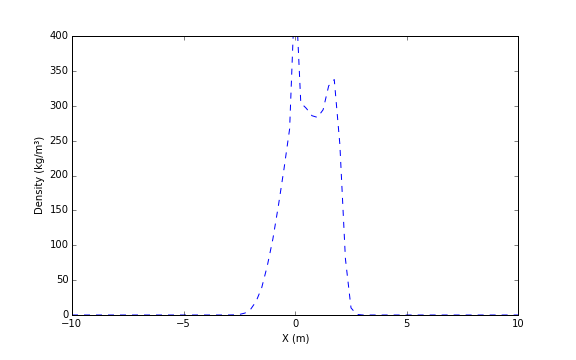
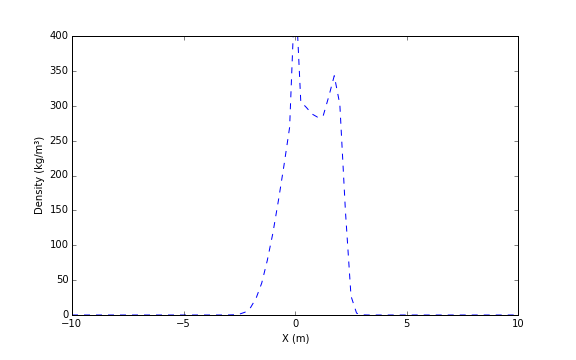
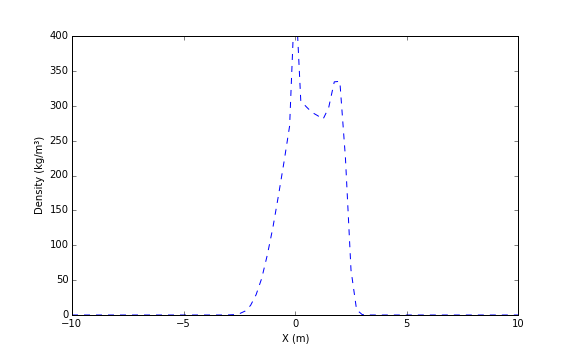
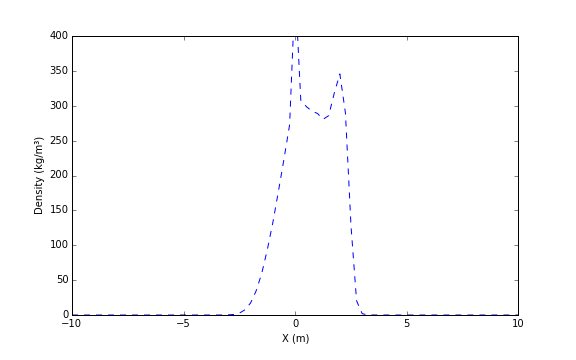
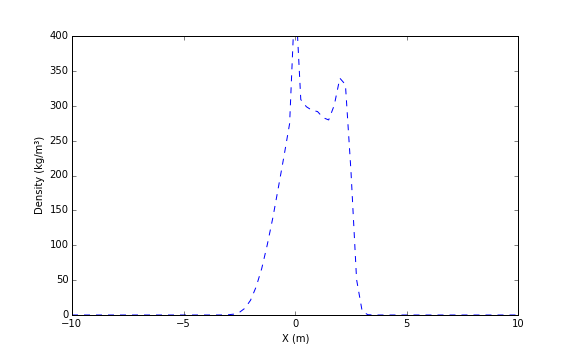
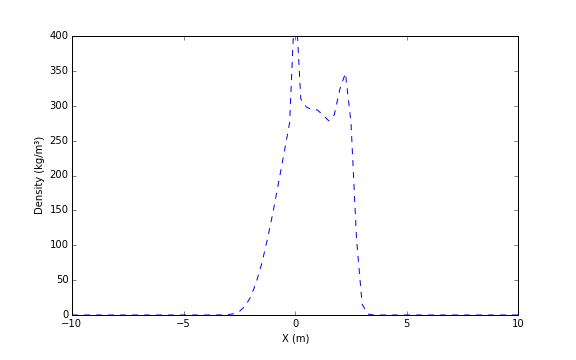
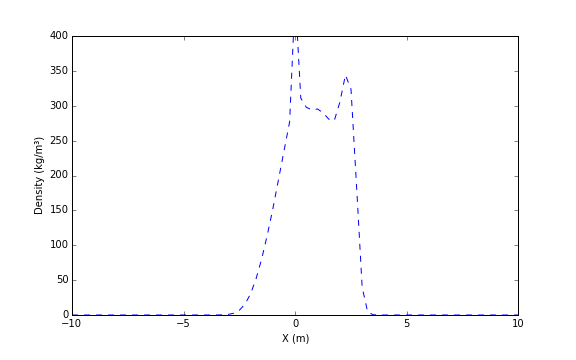
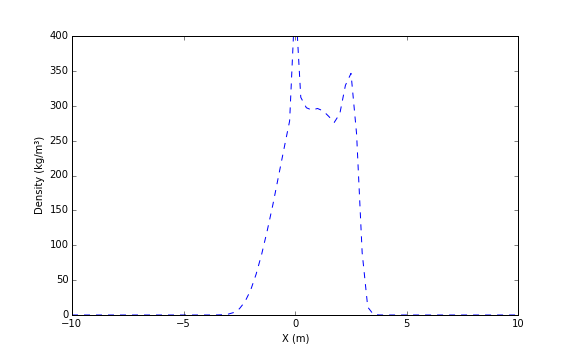
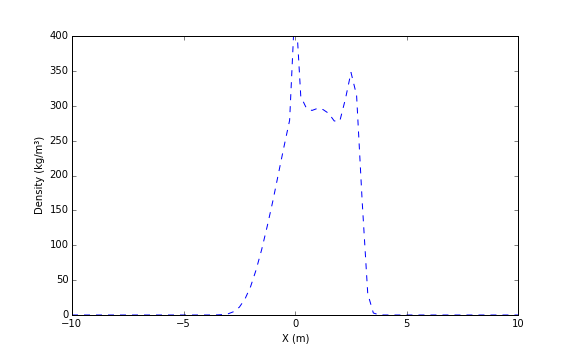
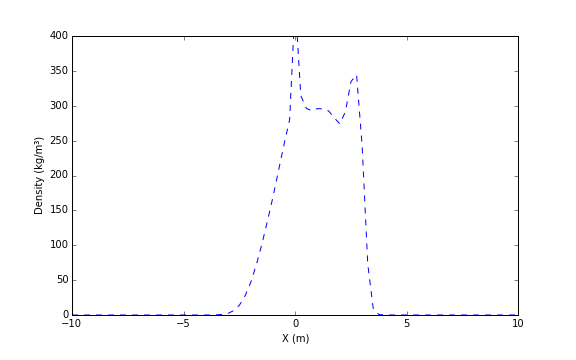
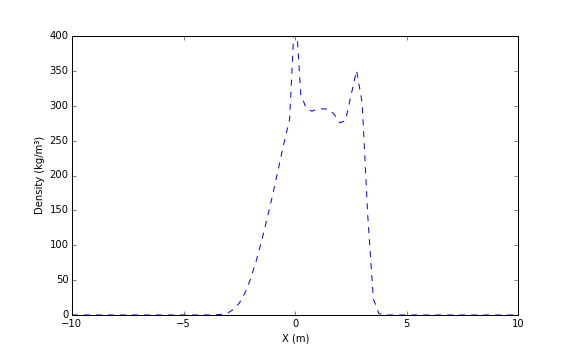
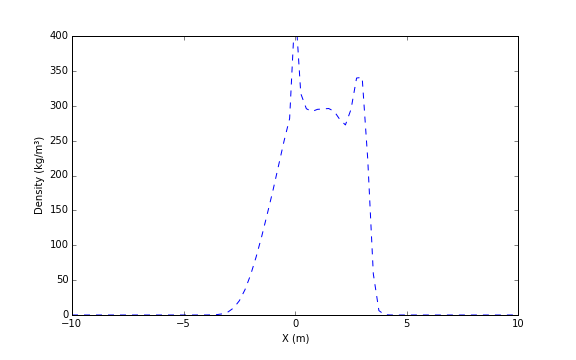
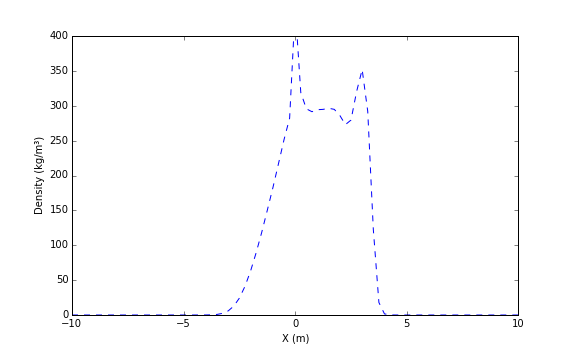
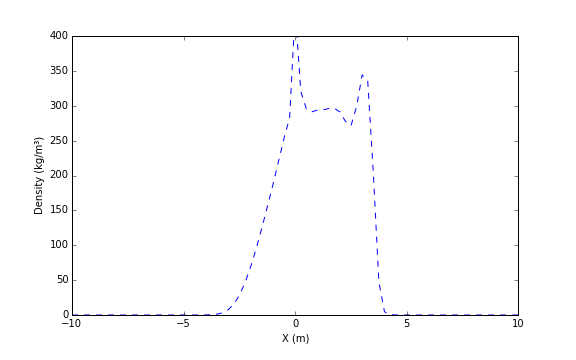
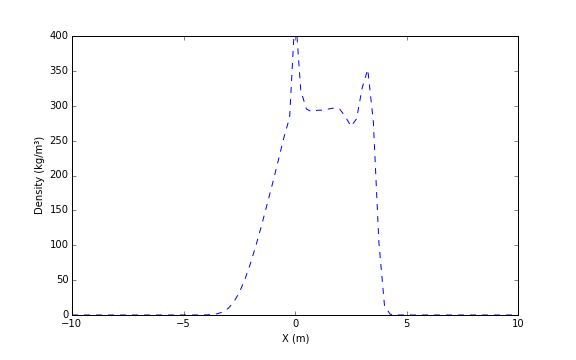
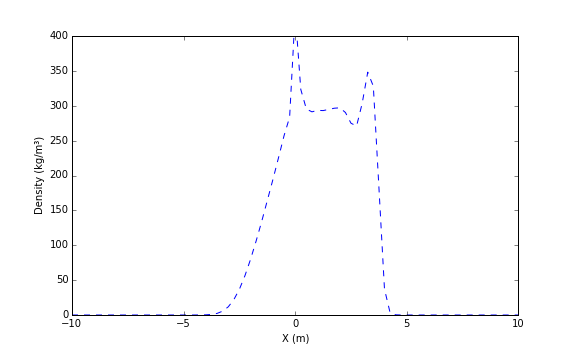
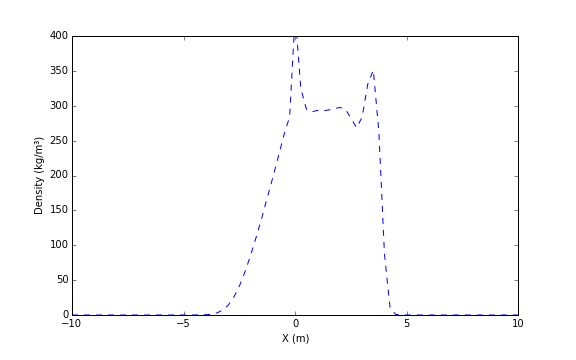
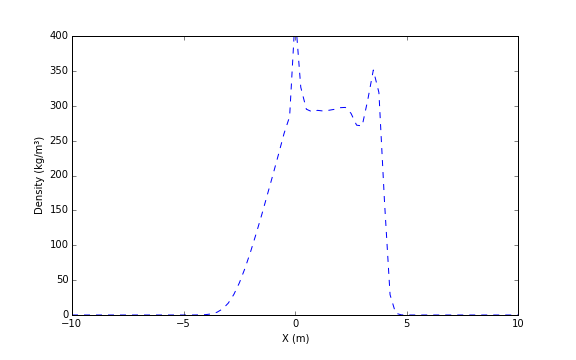
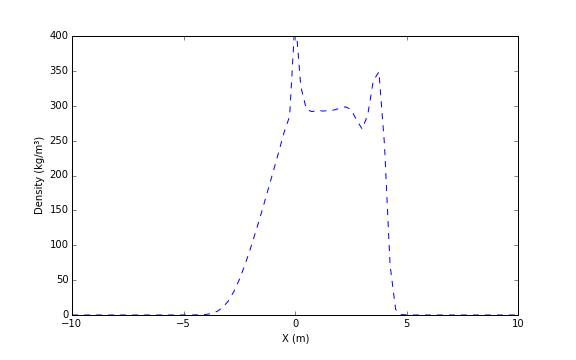
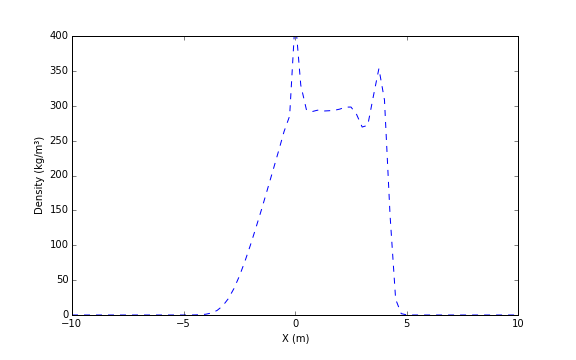
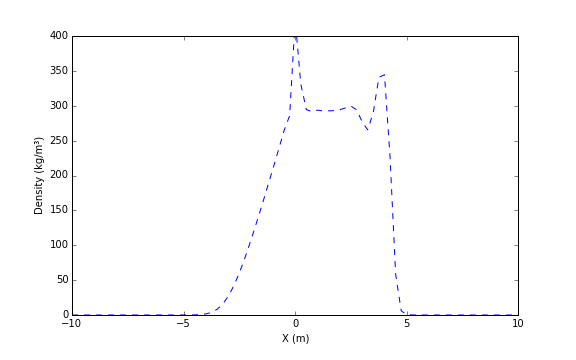
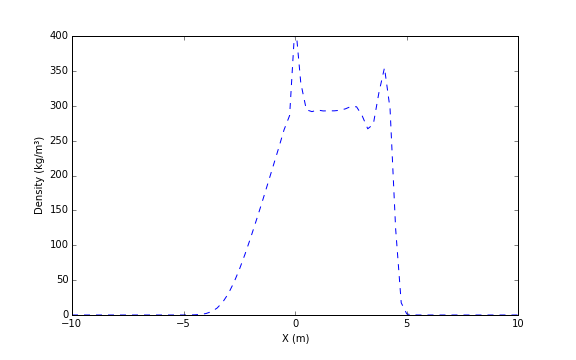
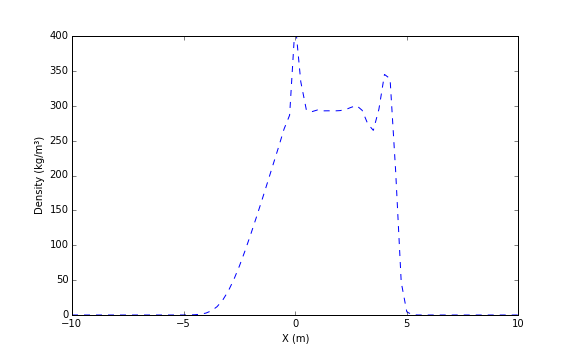
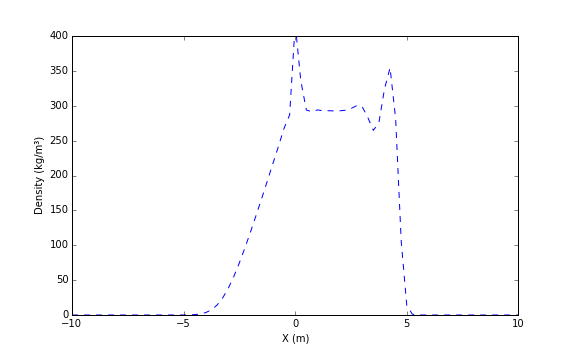
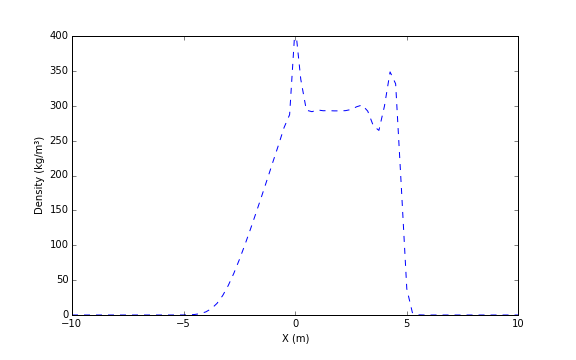
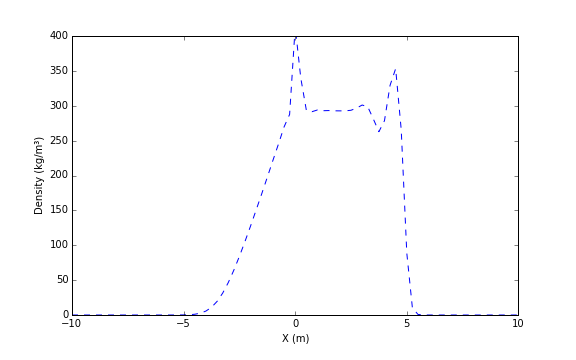
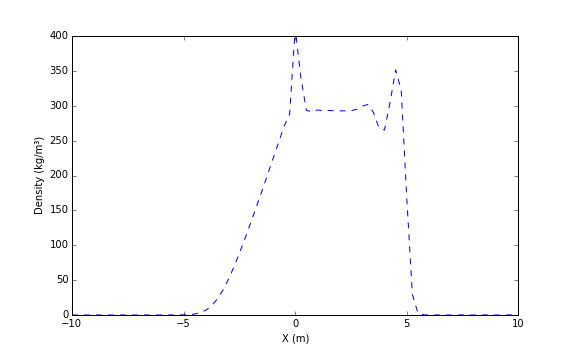
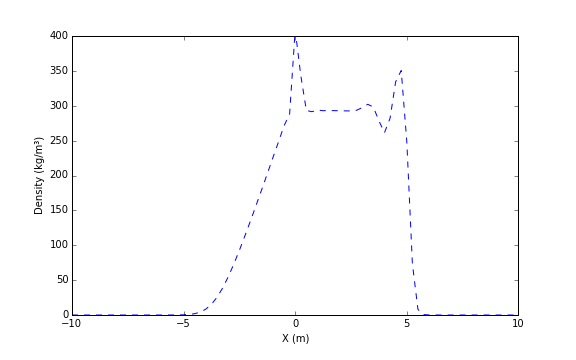
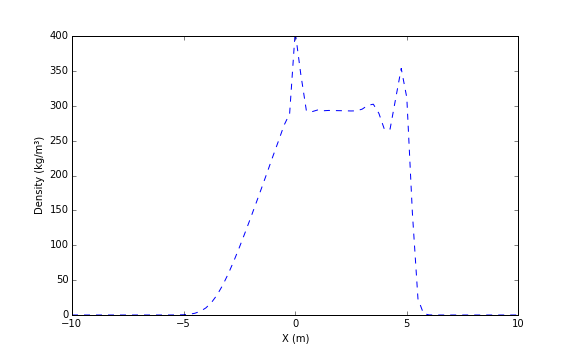
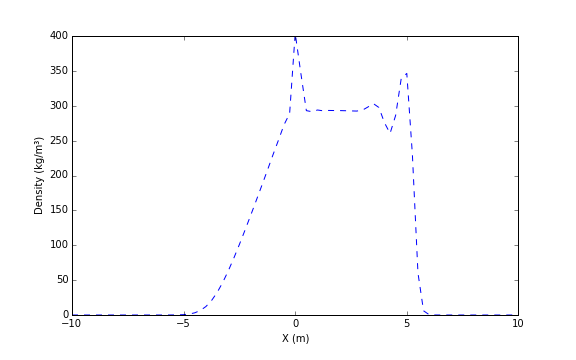
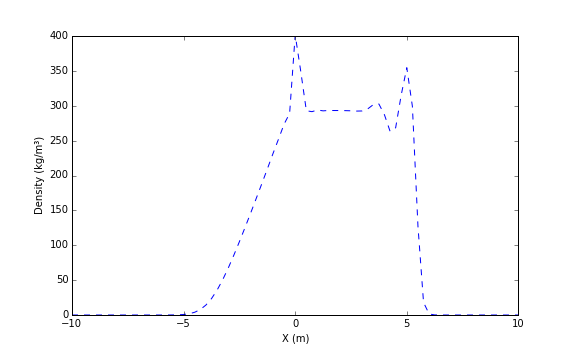
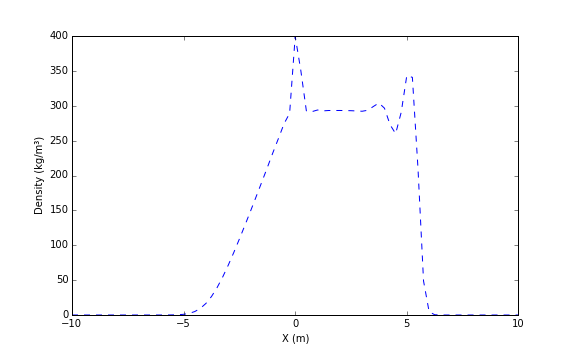
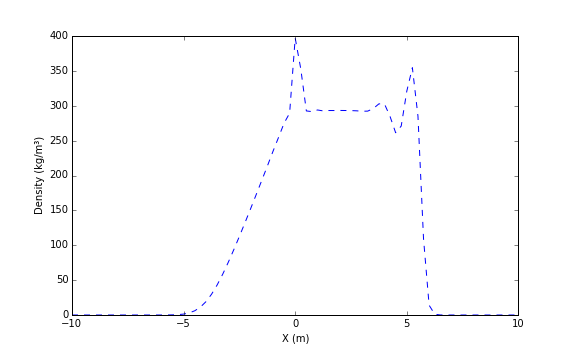
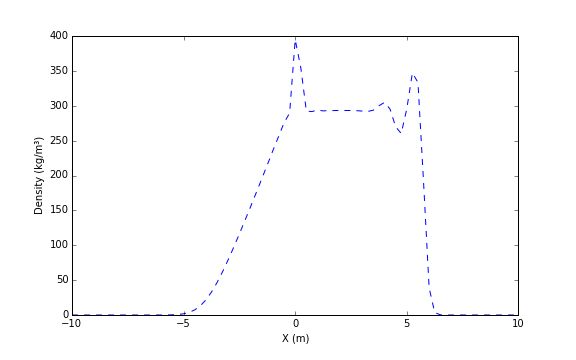
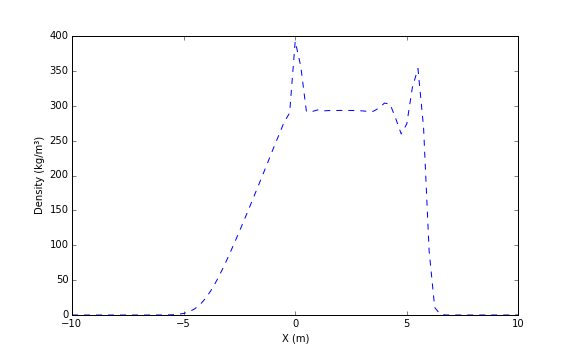
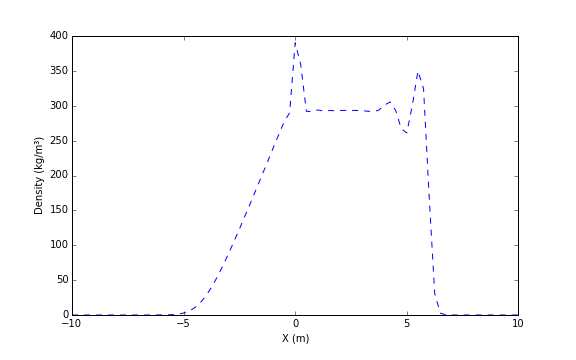
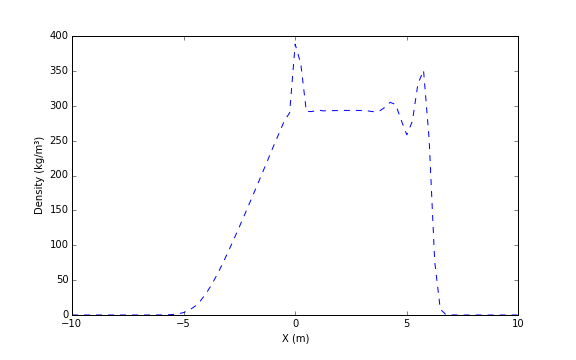
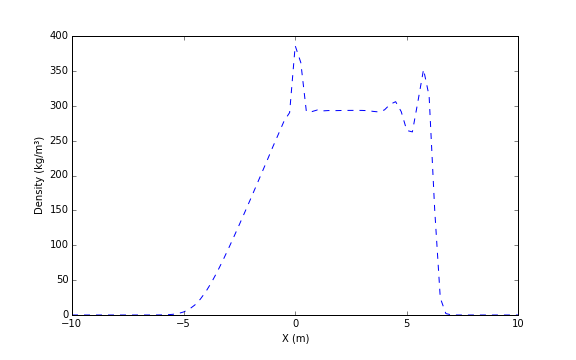
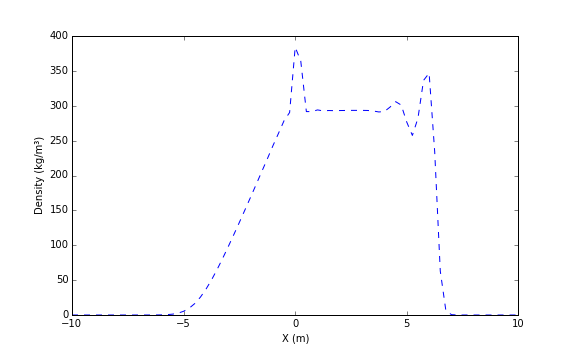
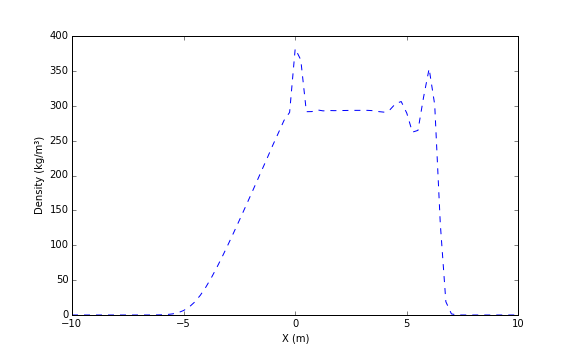
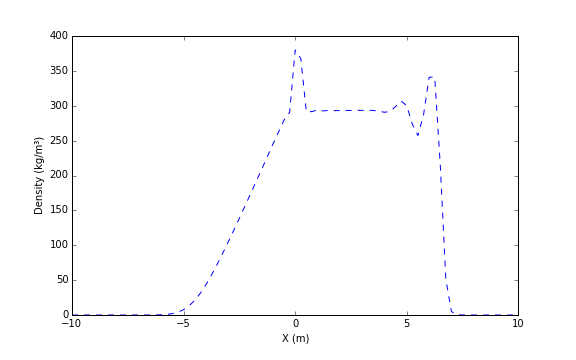
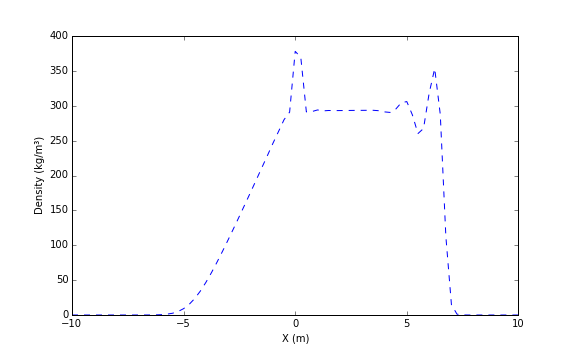
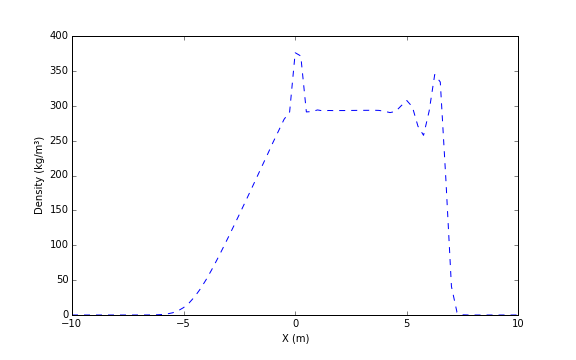
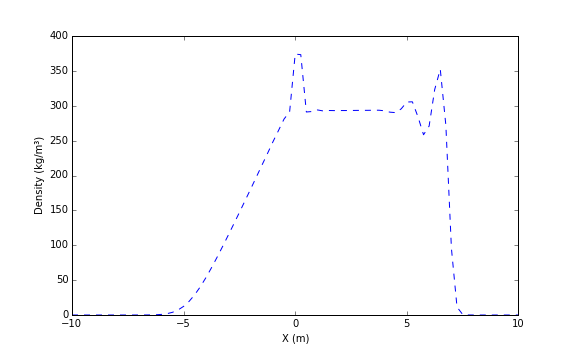
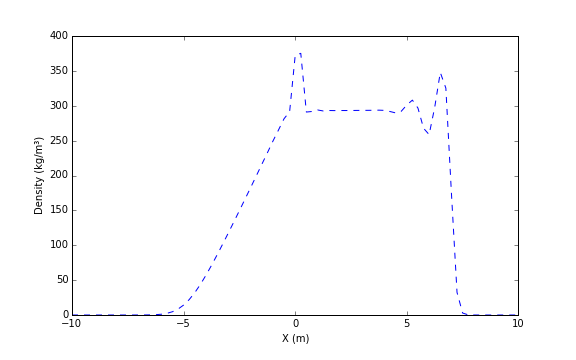
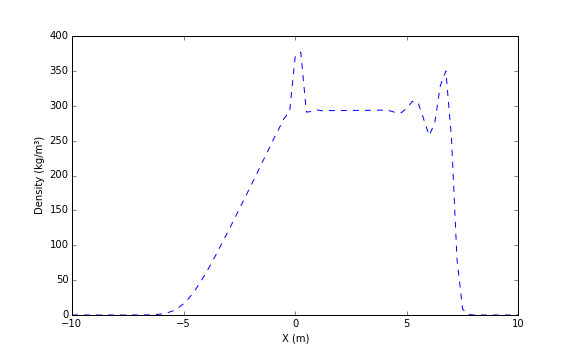
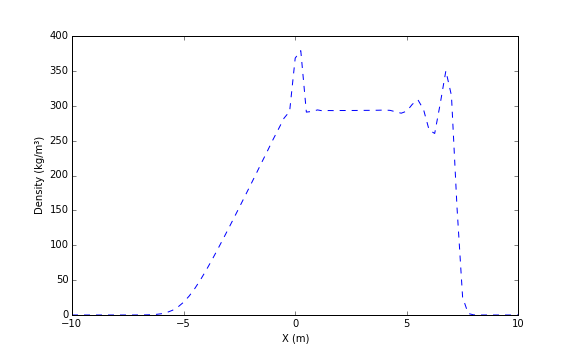
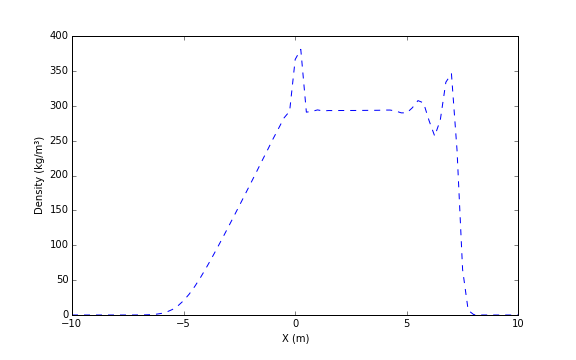
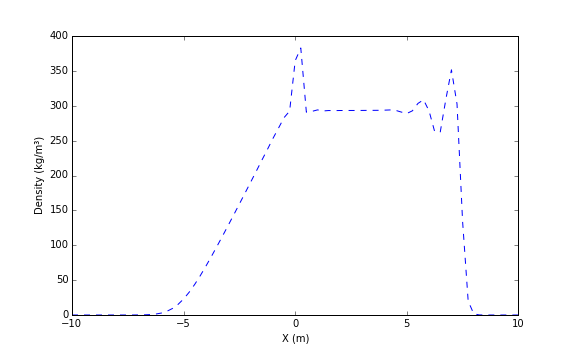
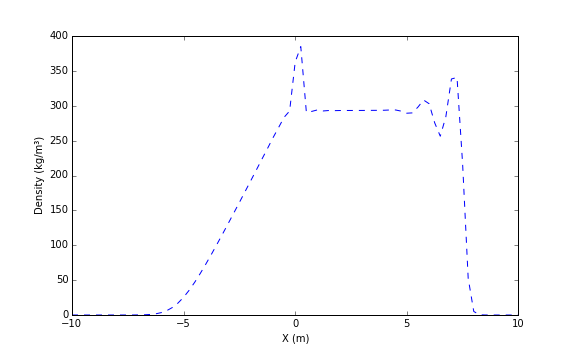
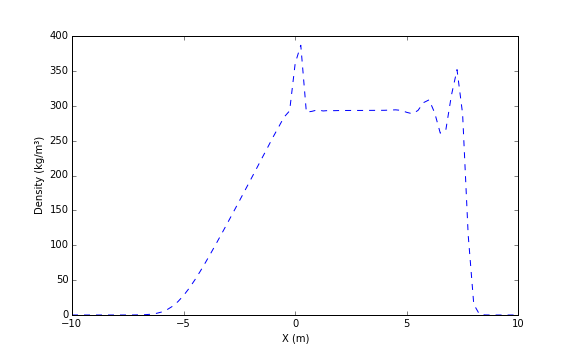
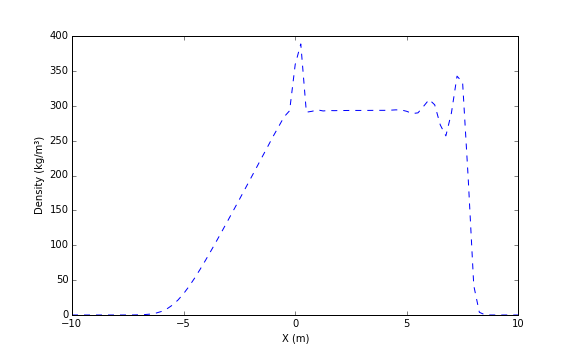
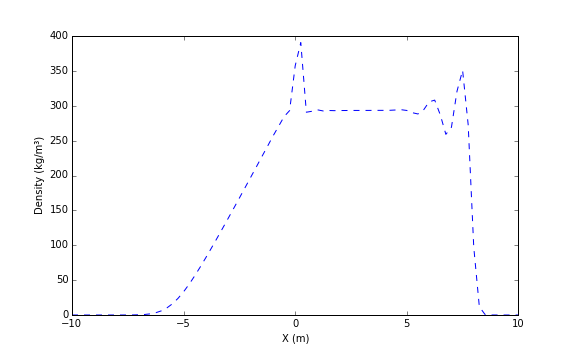
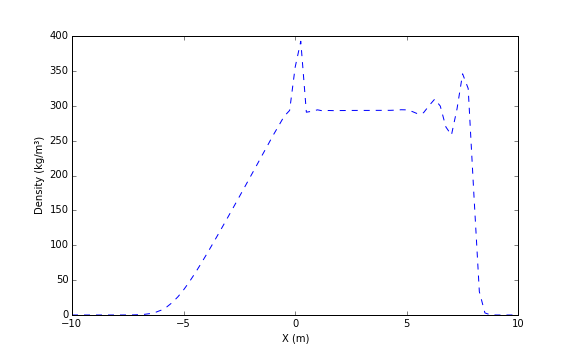
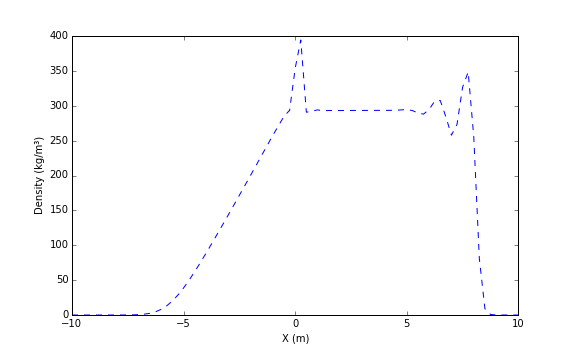
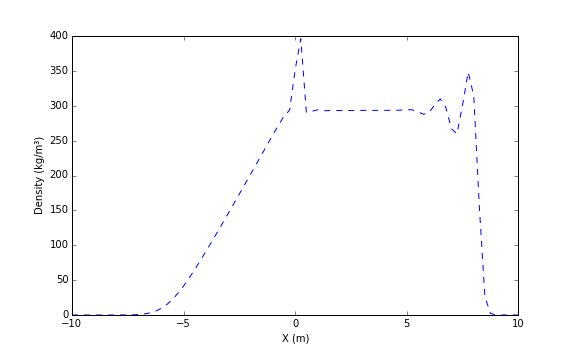
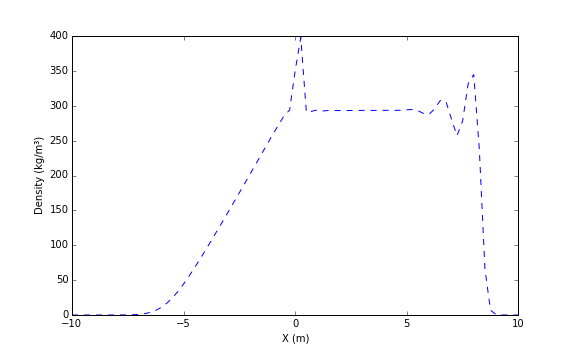
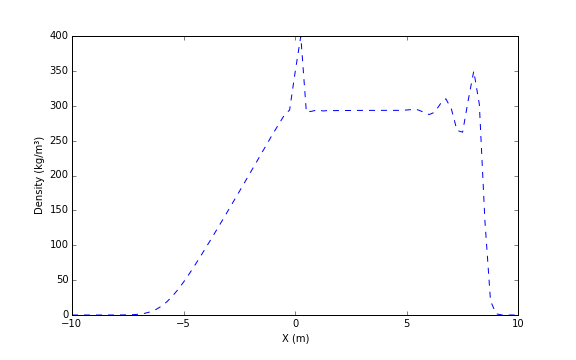
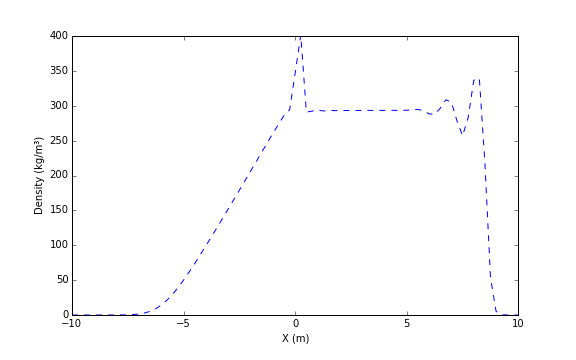
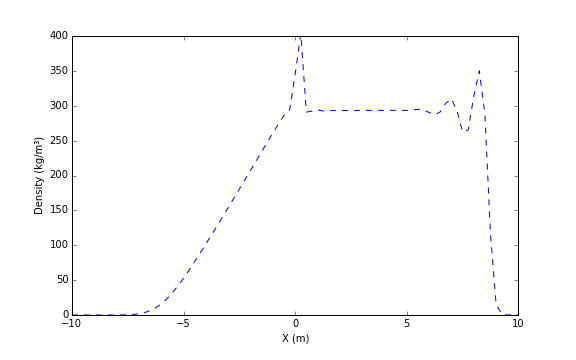
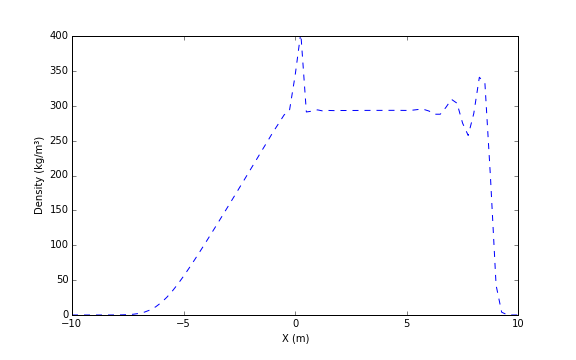
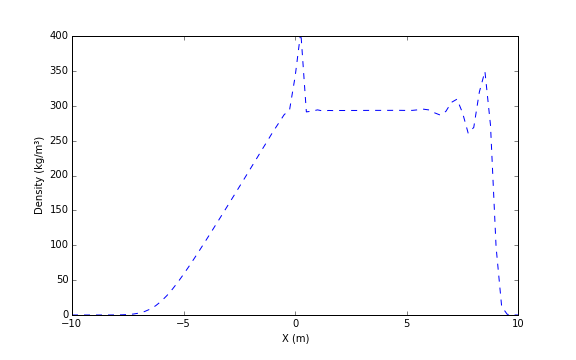
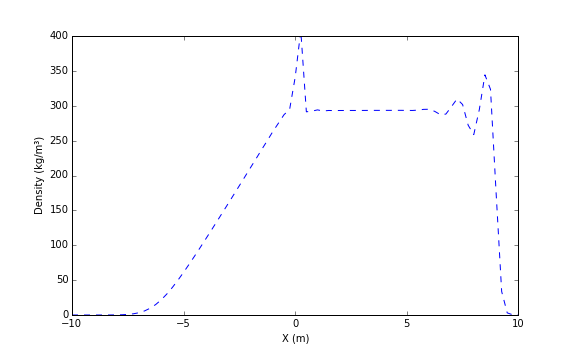
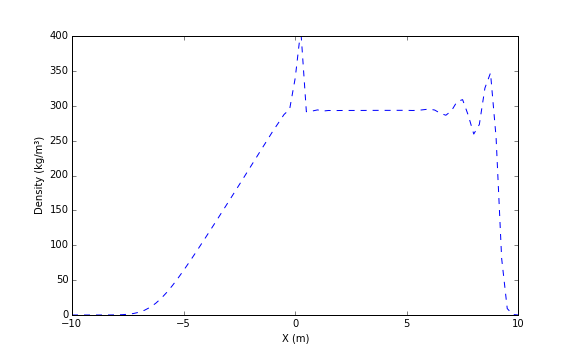
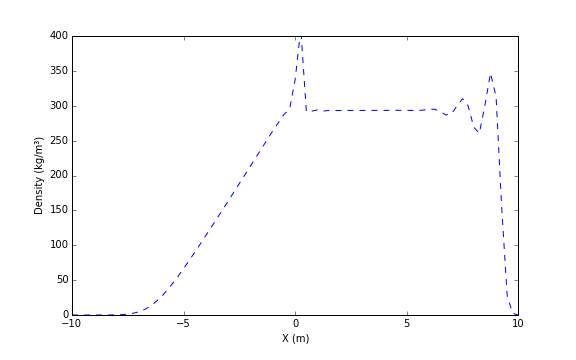
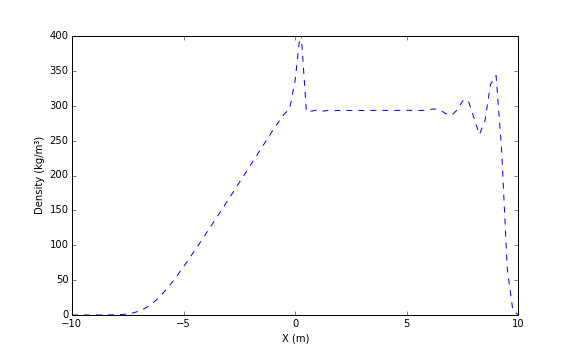
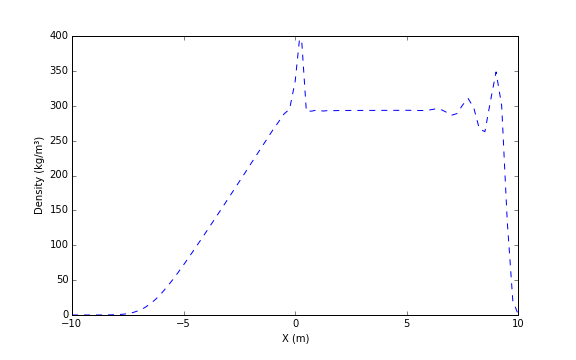
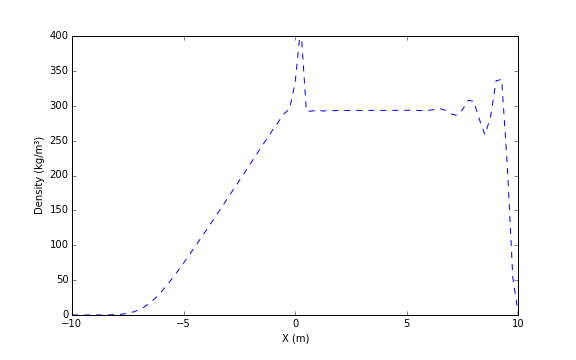
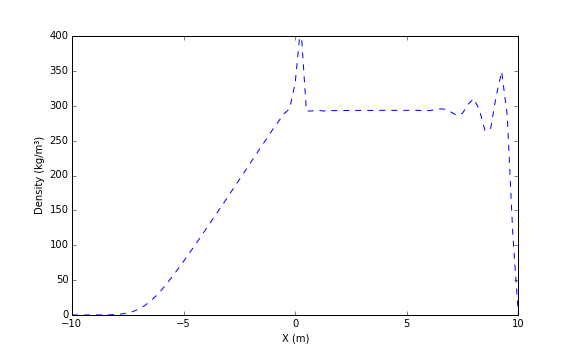
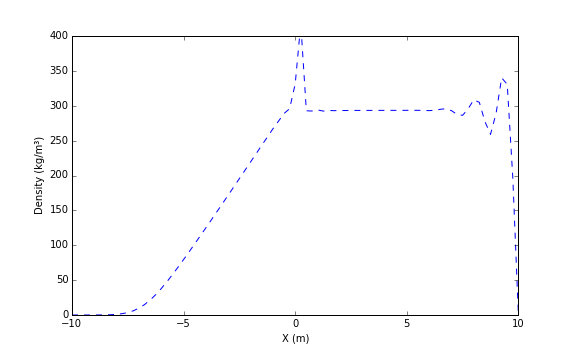
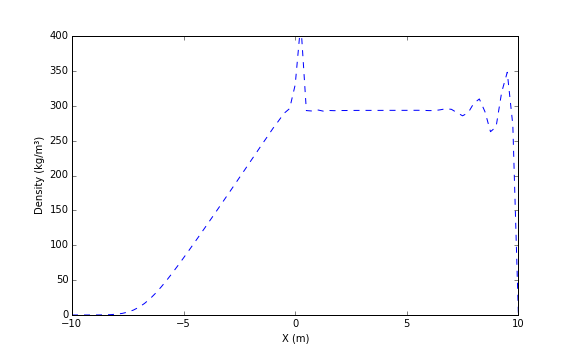
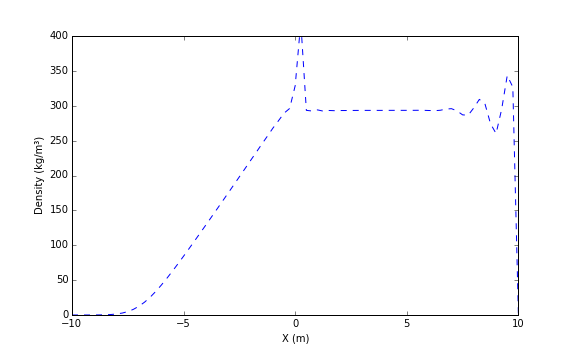
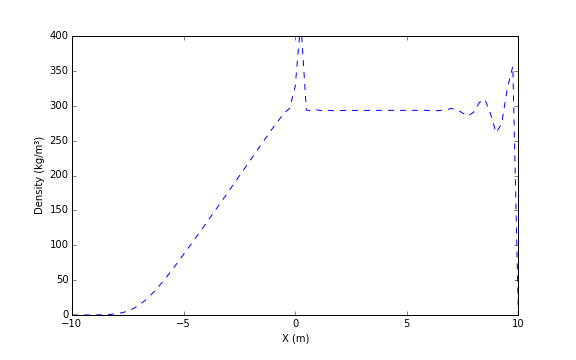
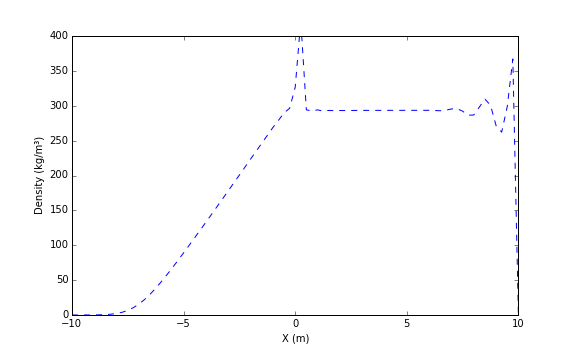
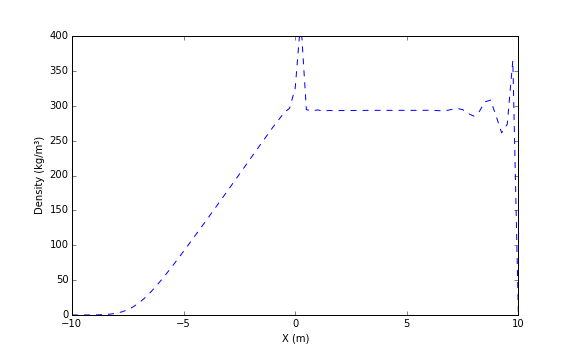
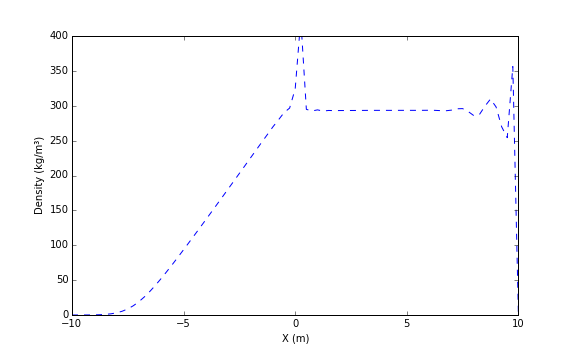
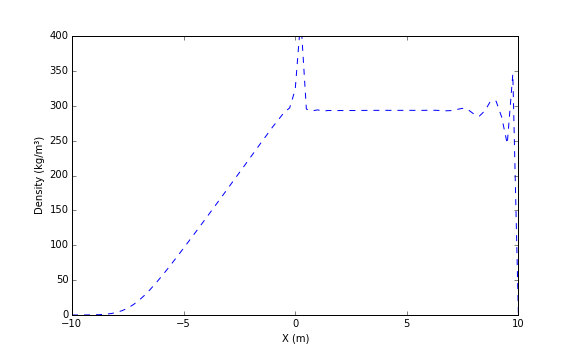
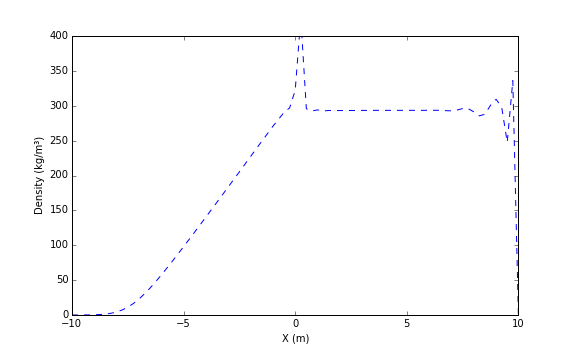
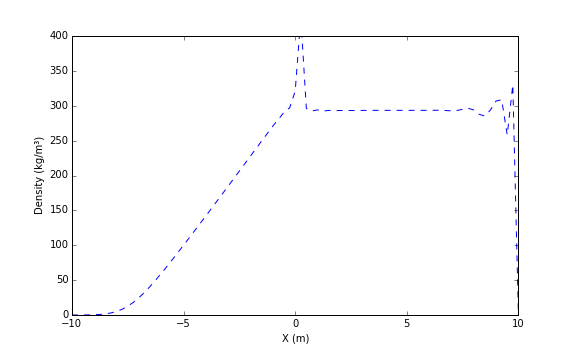
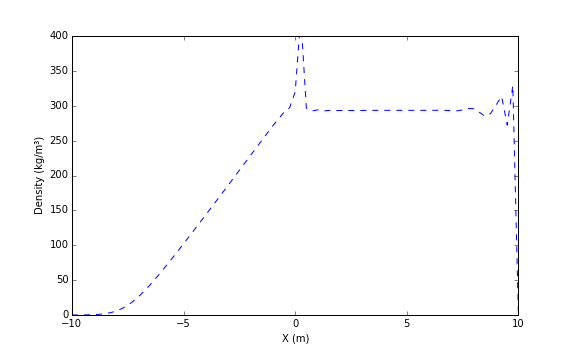
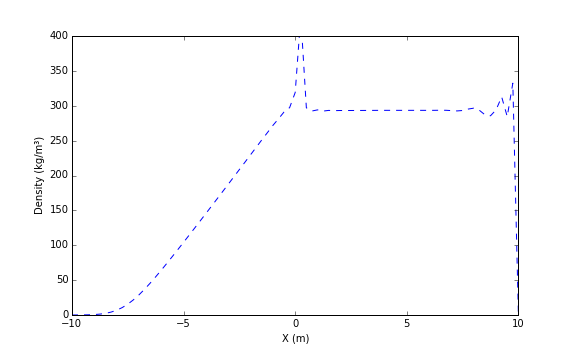
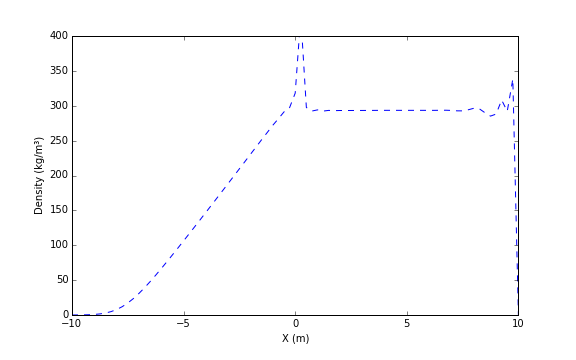
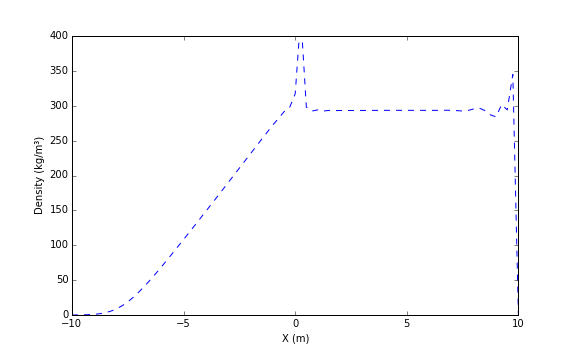
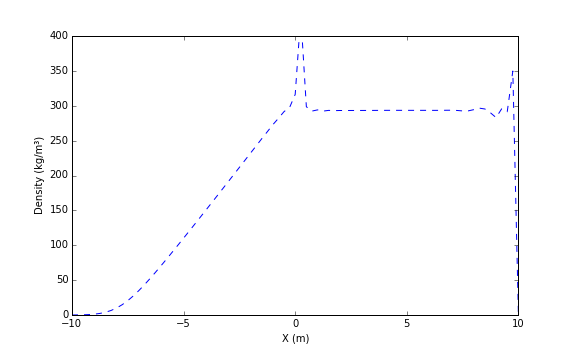
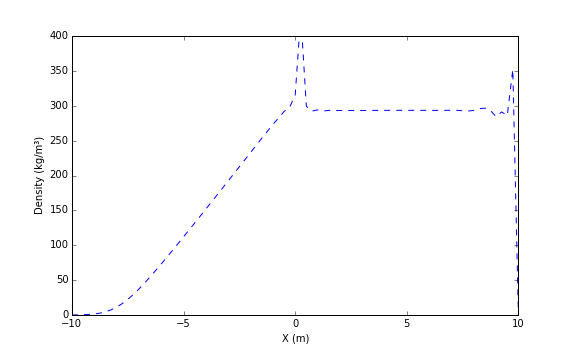
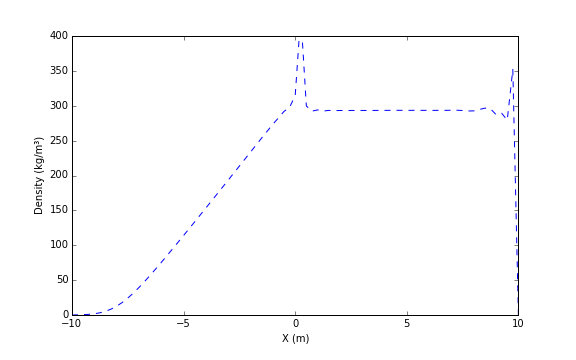
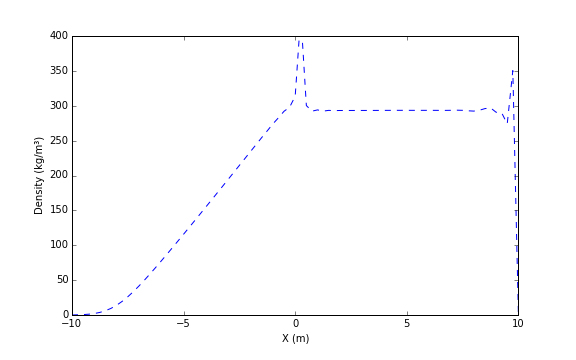
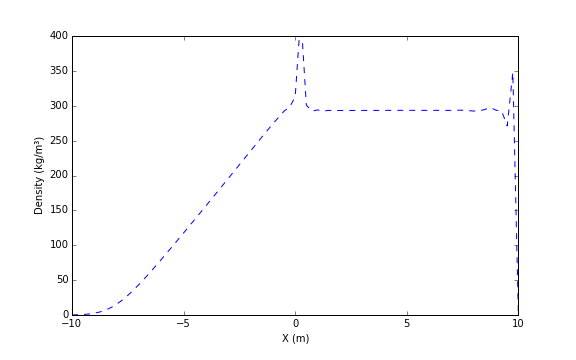
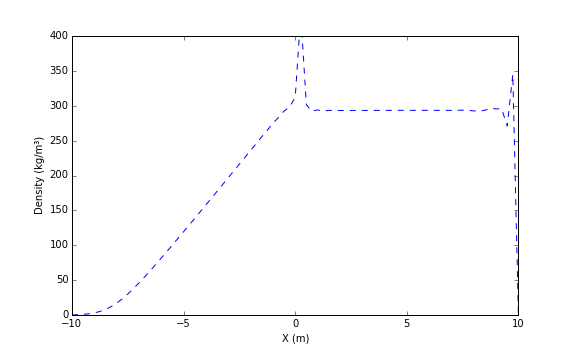
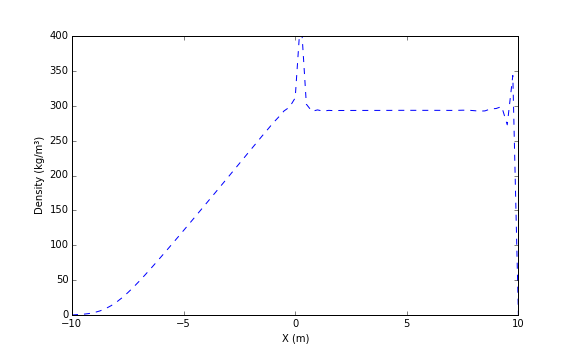
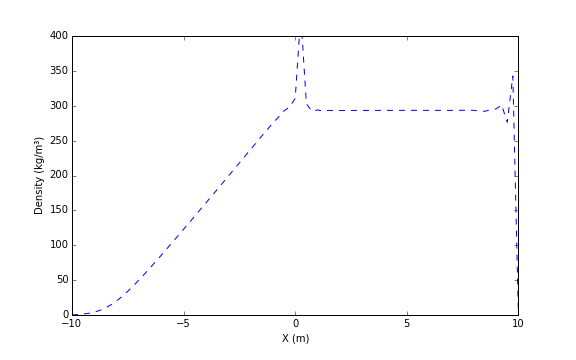
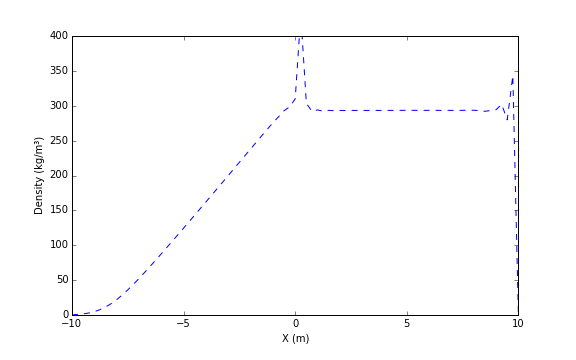
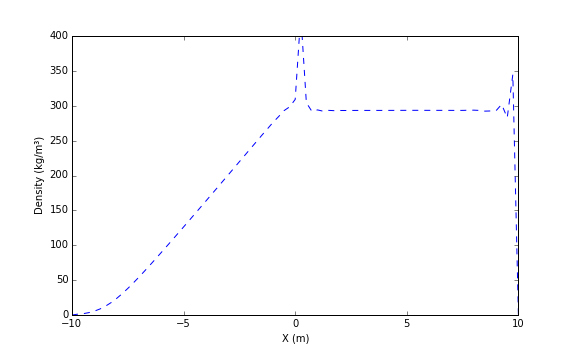
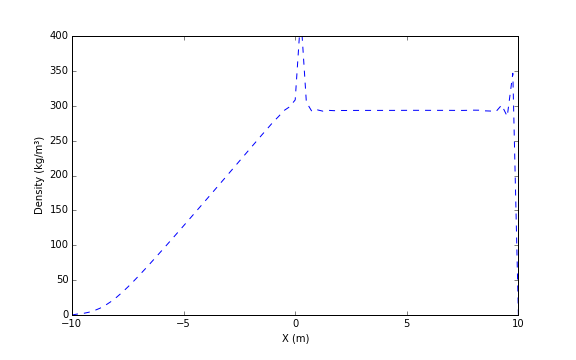
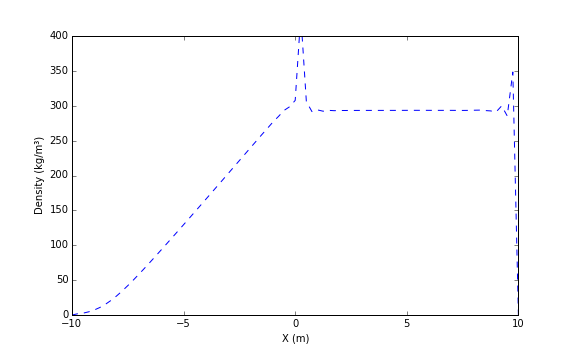
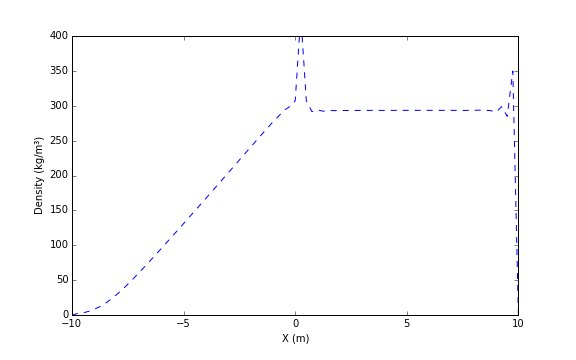
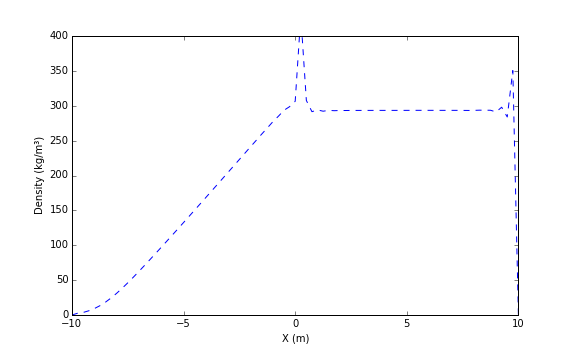
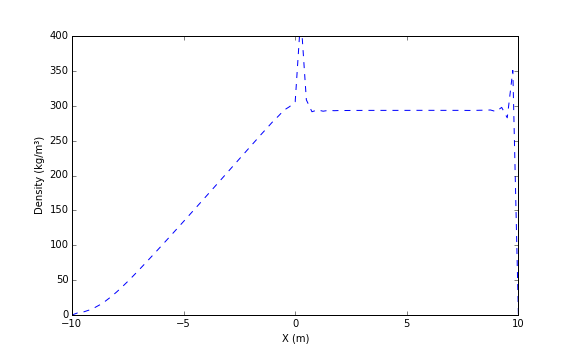
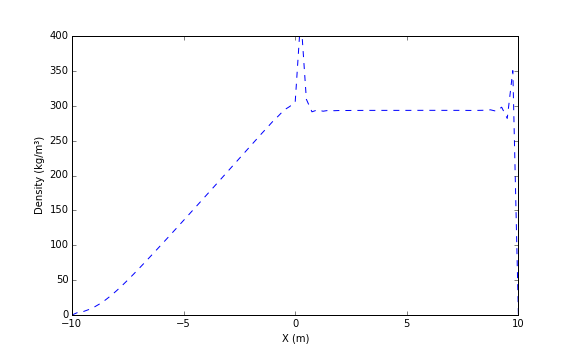
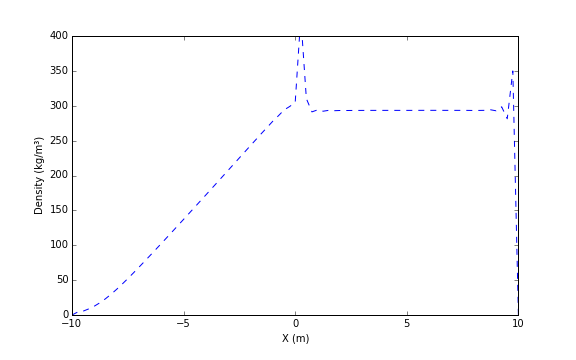
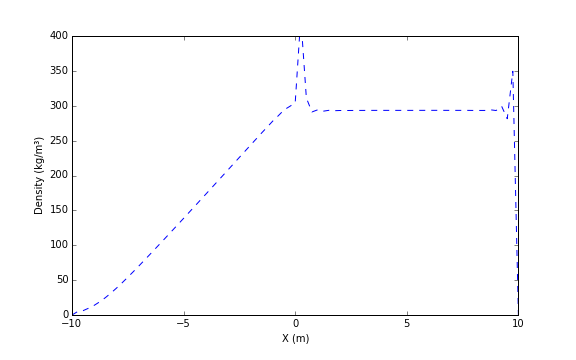
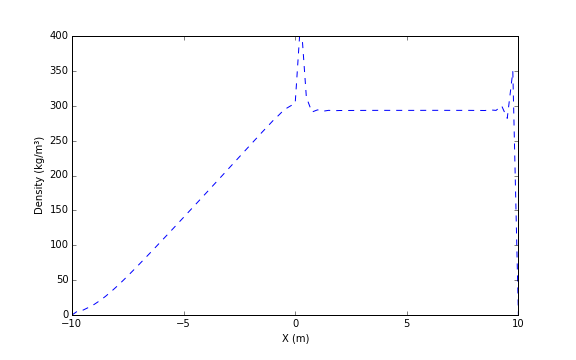
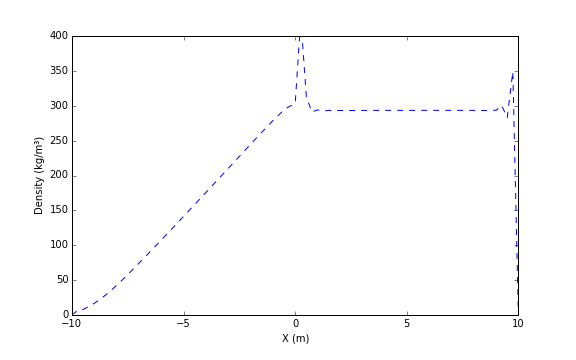
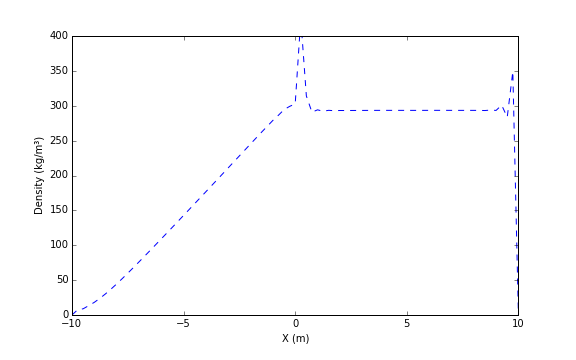
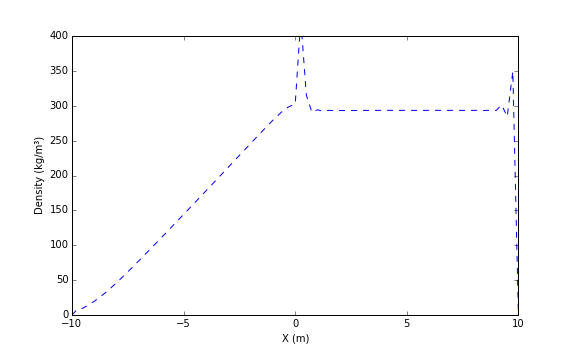
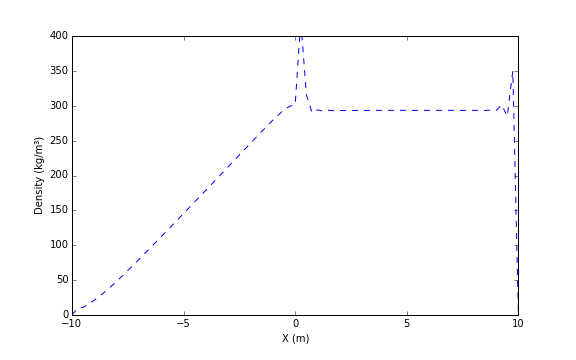
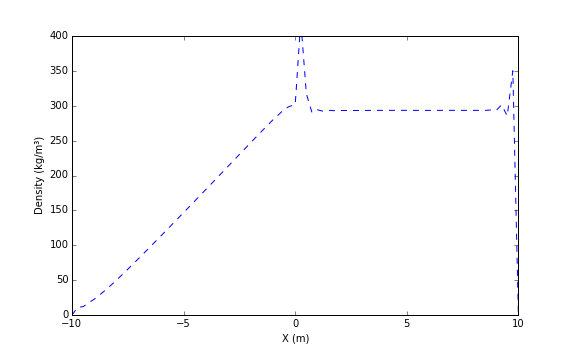
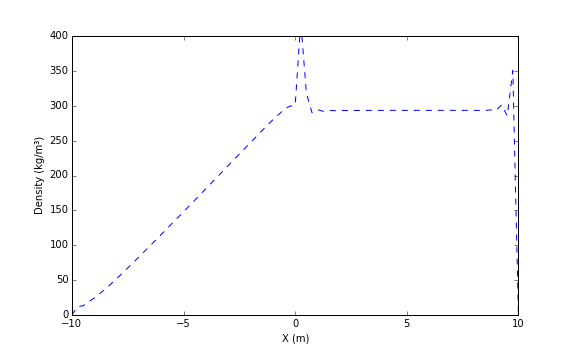
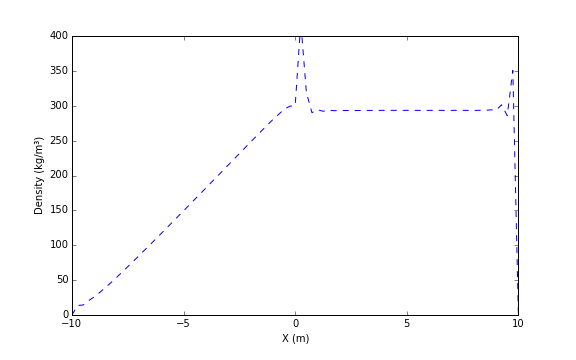
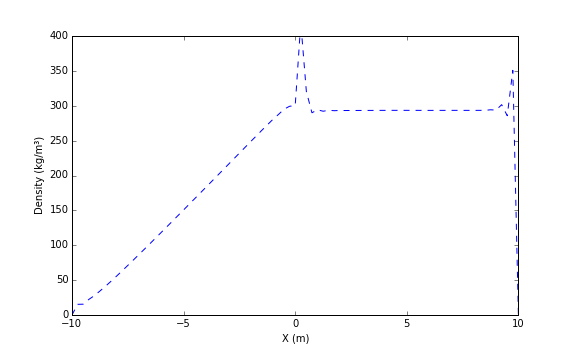
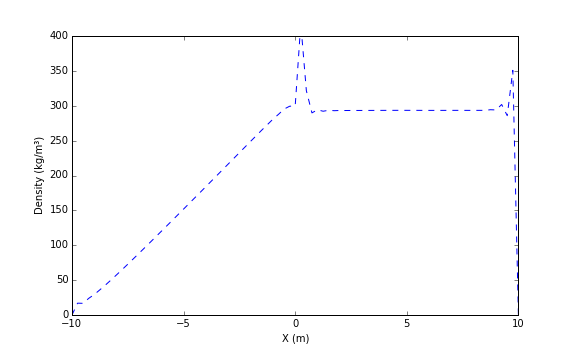
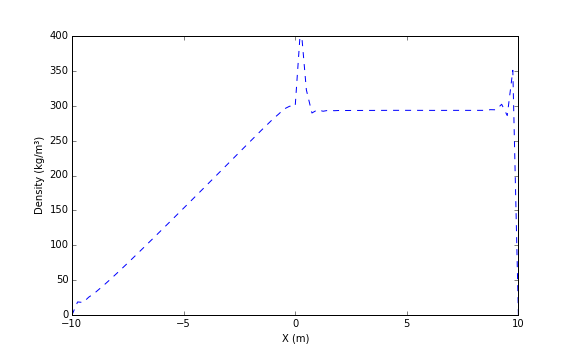
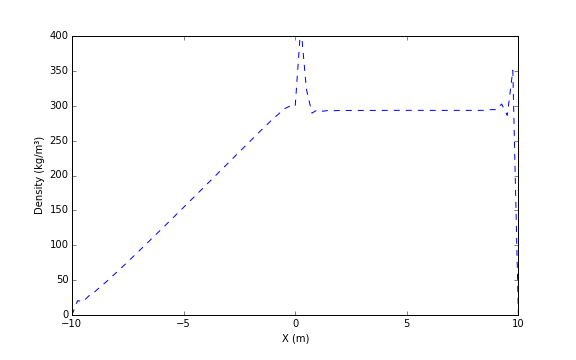
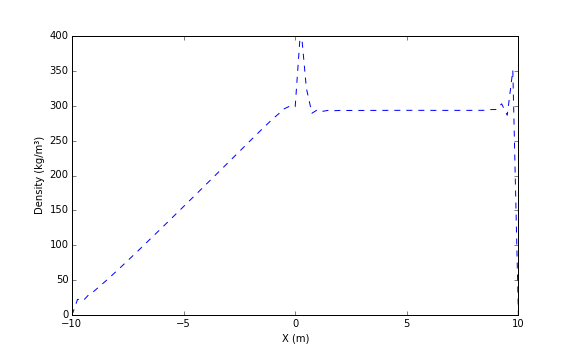
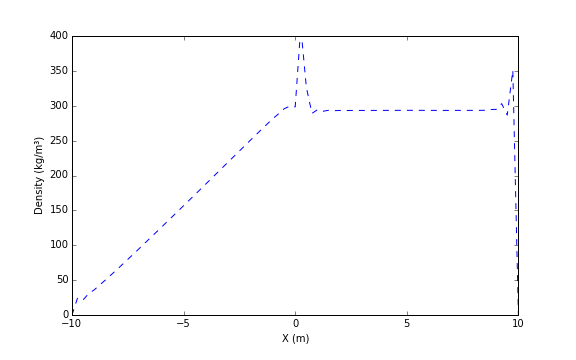
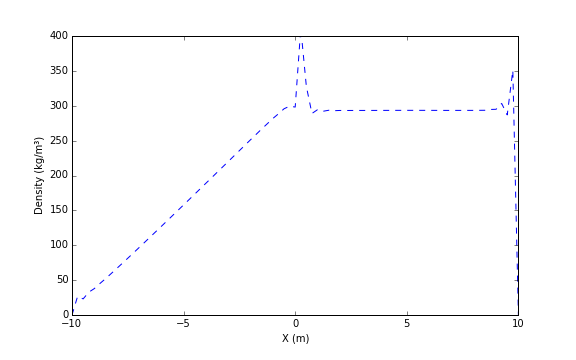
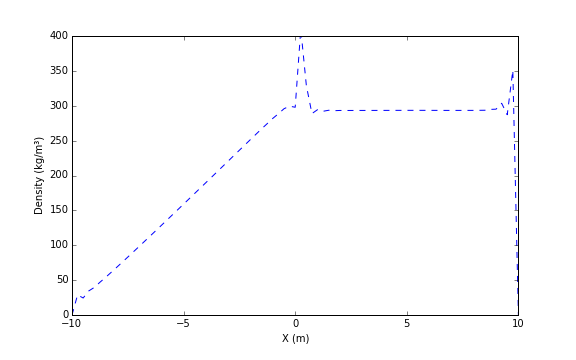
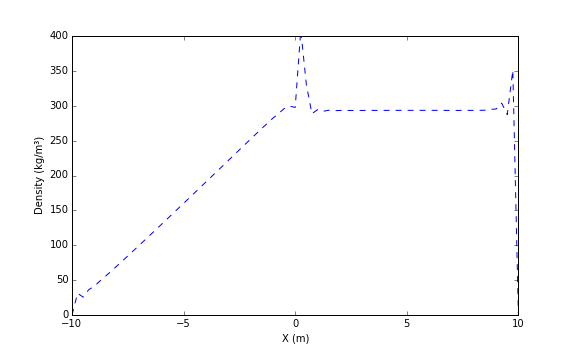
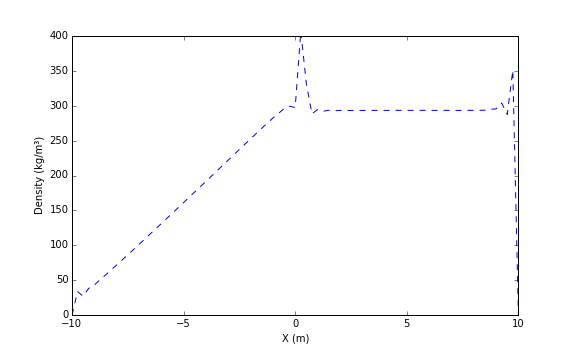
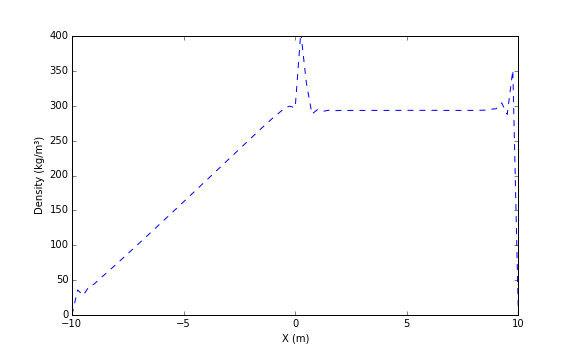
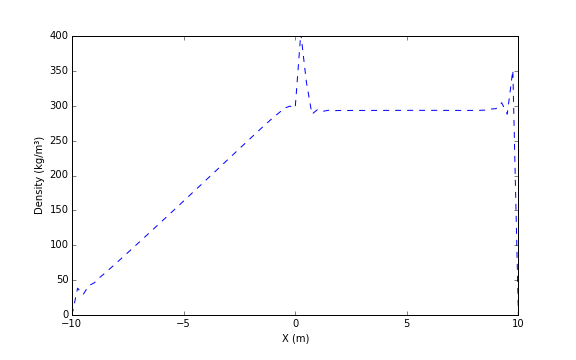
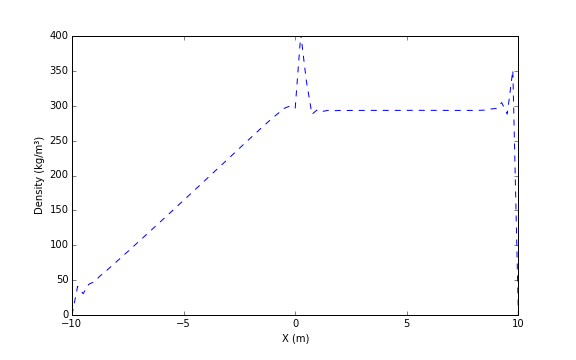
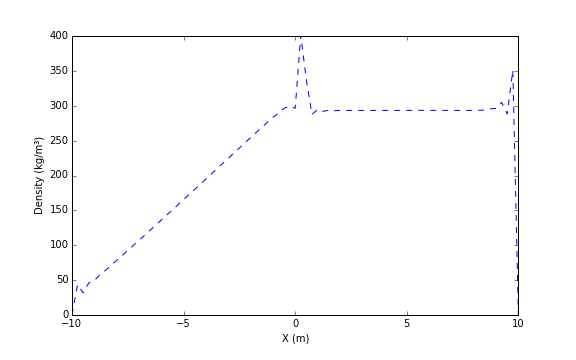
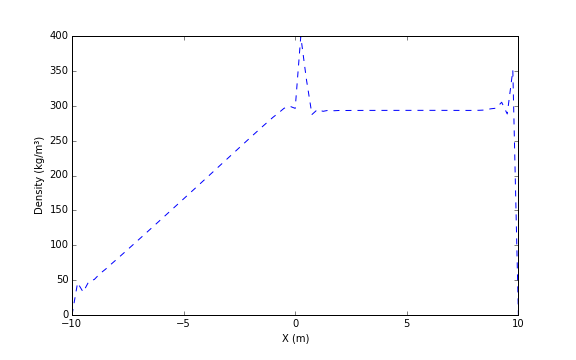
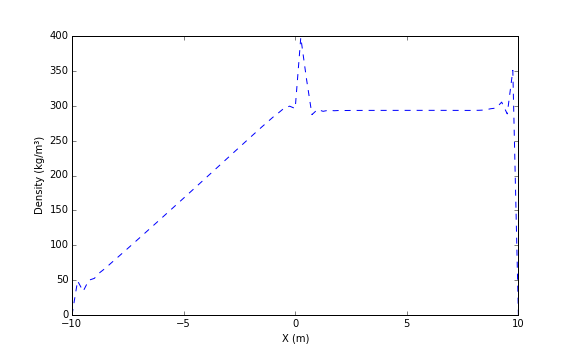
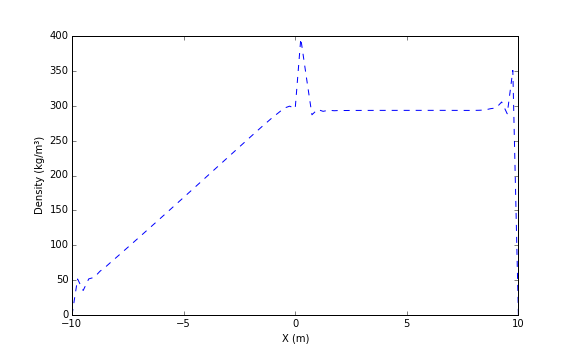
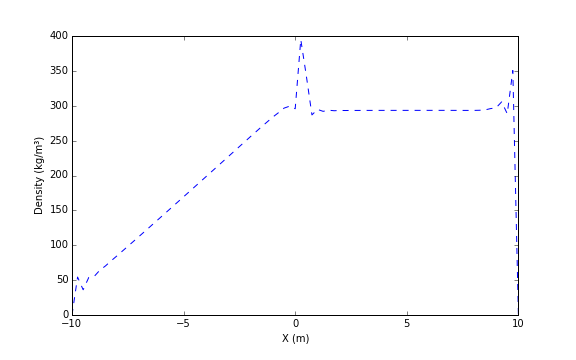
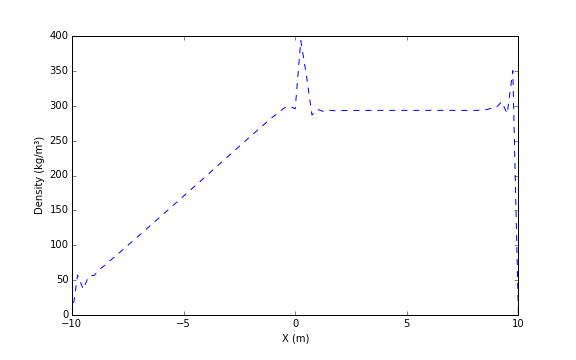
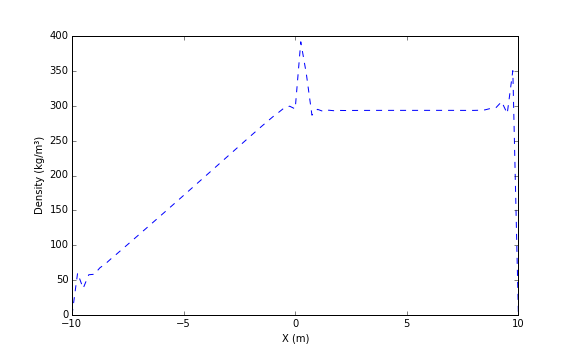
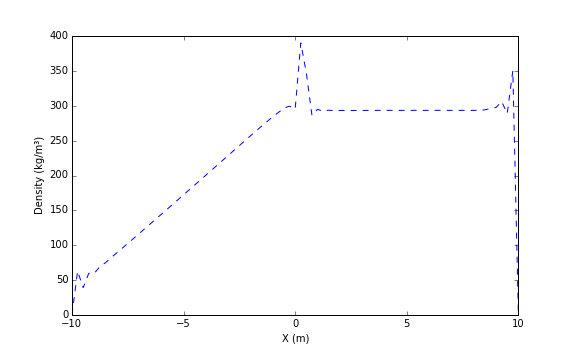

In [7]:
visual(Utot,1,(0,400),"X (m)","Density (kg/m³)")


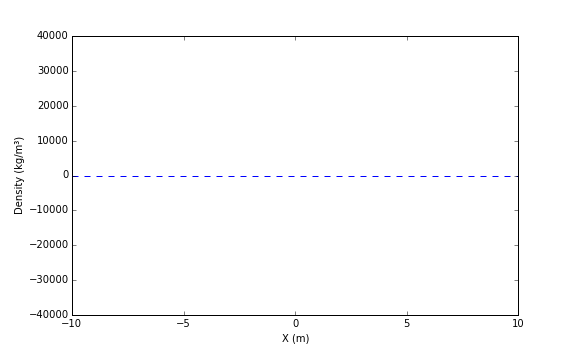
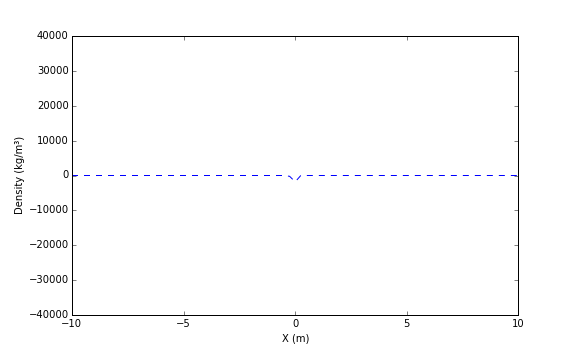
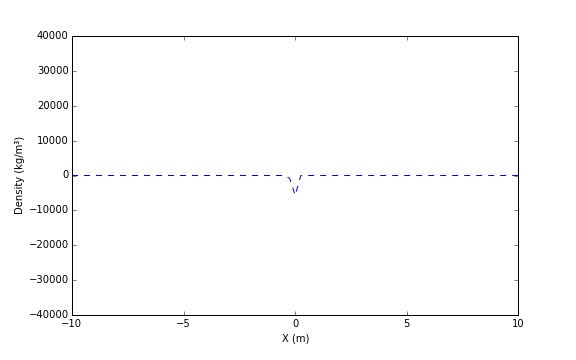
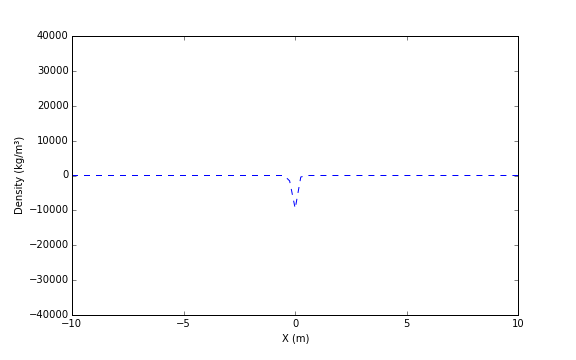
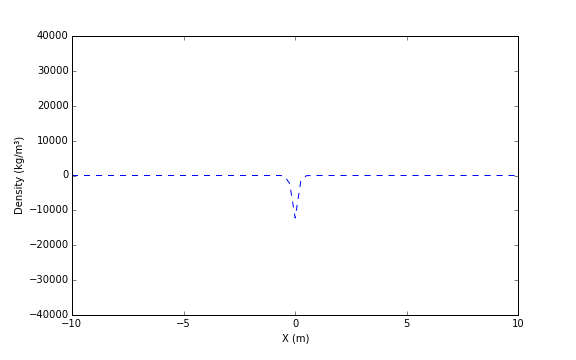
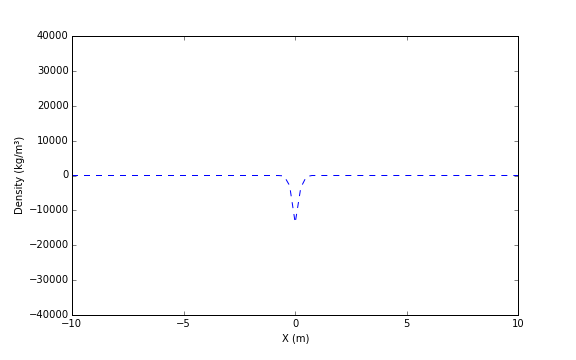
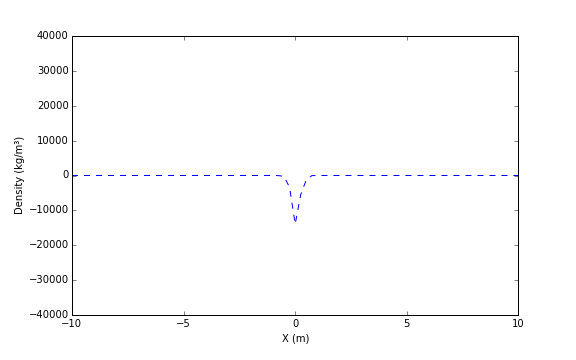
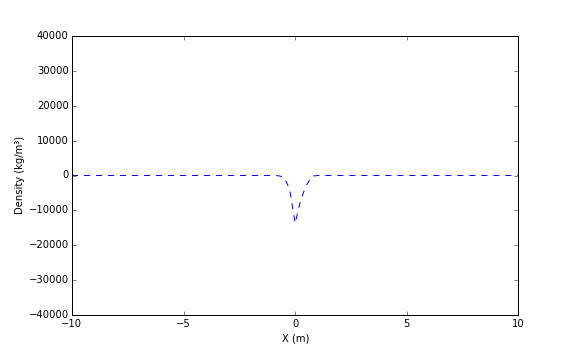
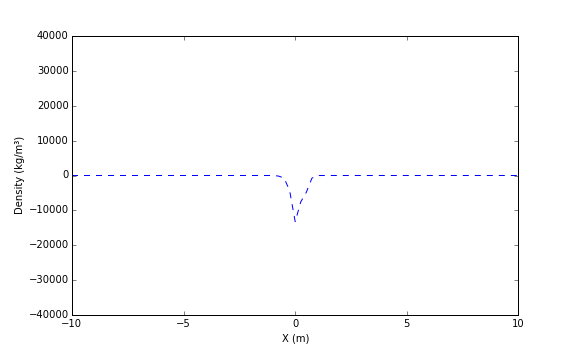
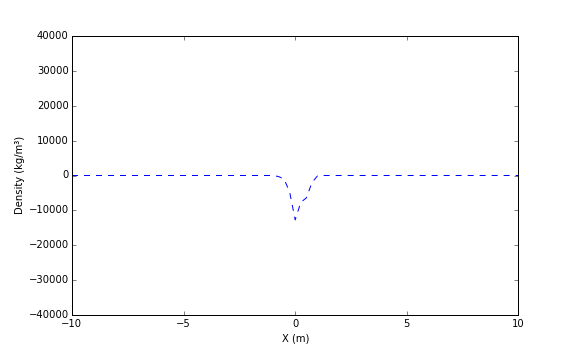
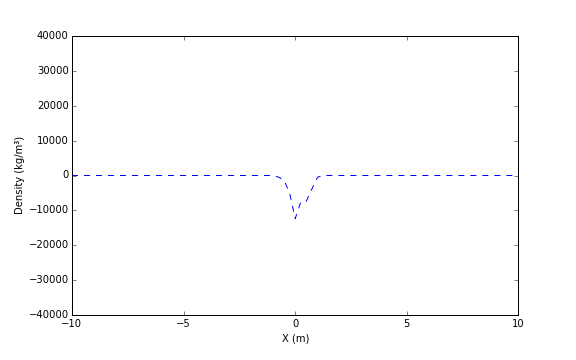
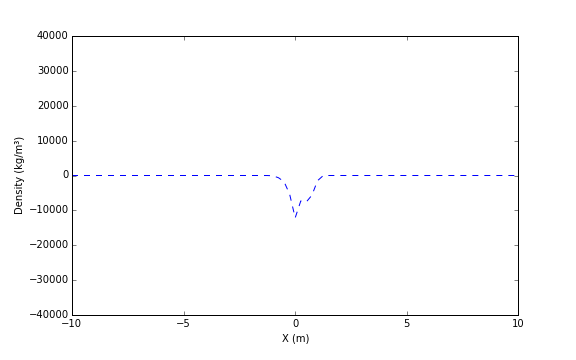
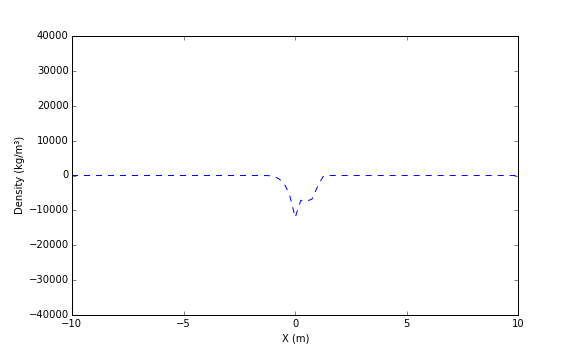
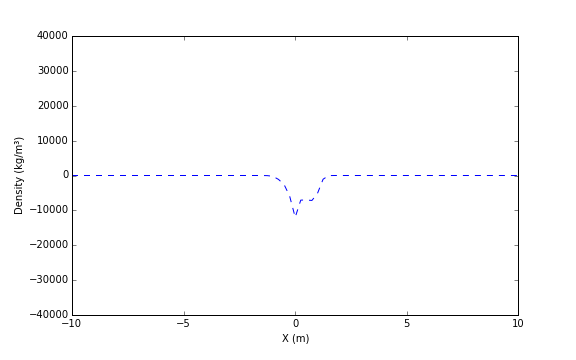
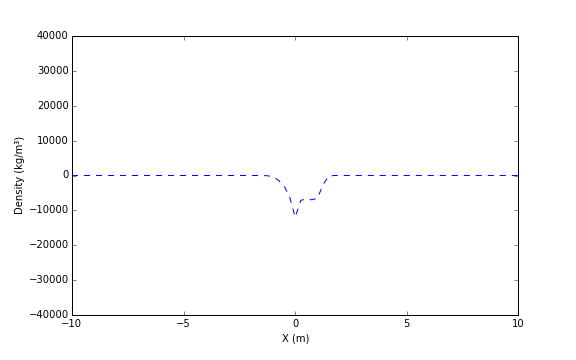
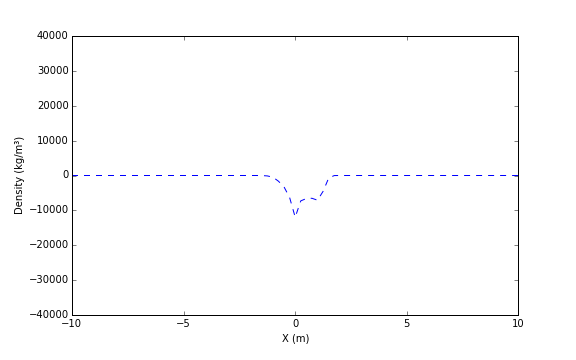
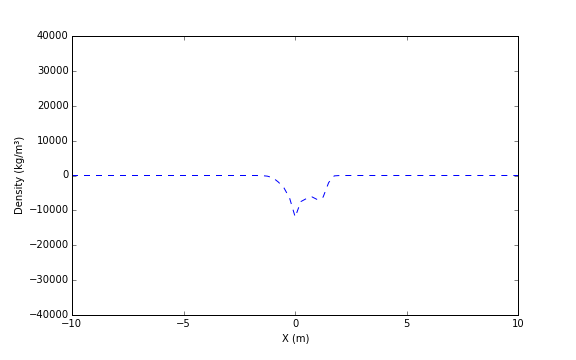
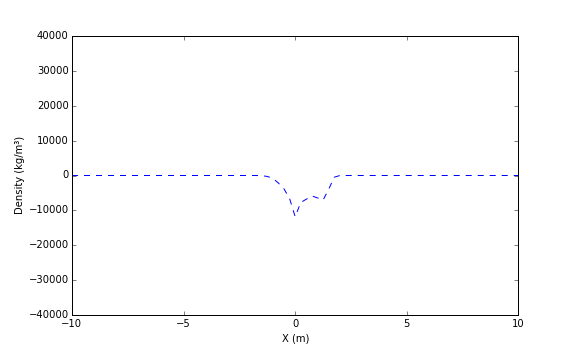
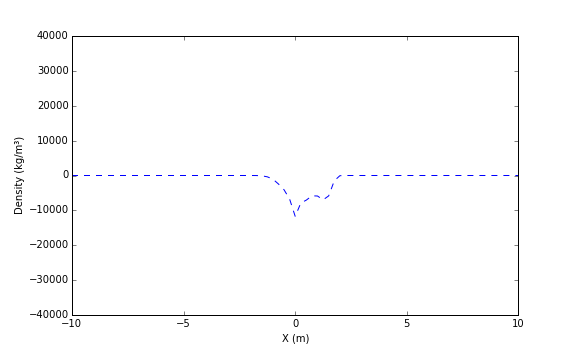
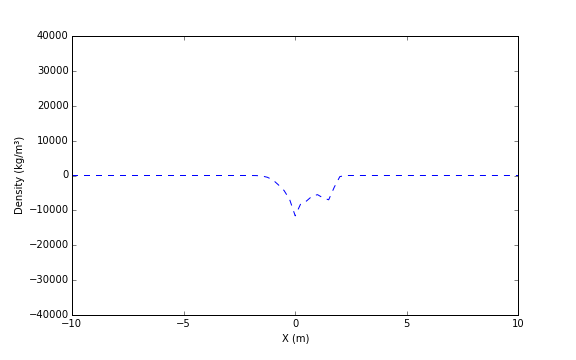
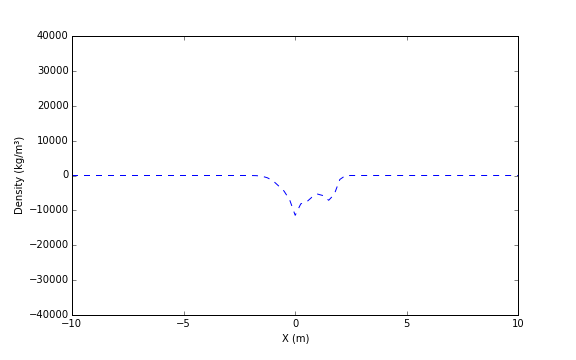
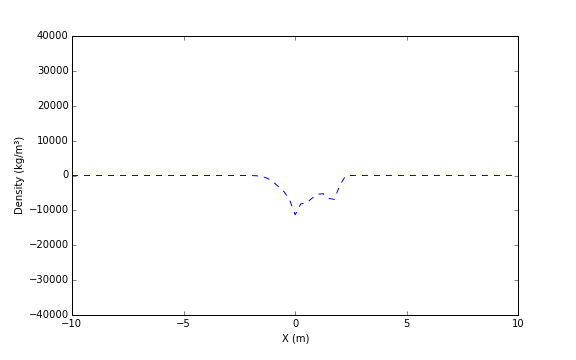
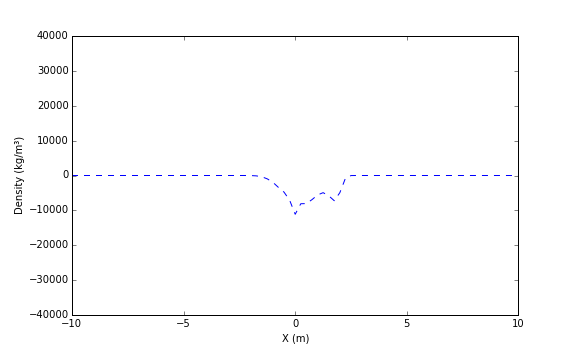
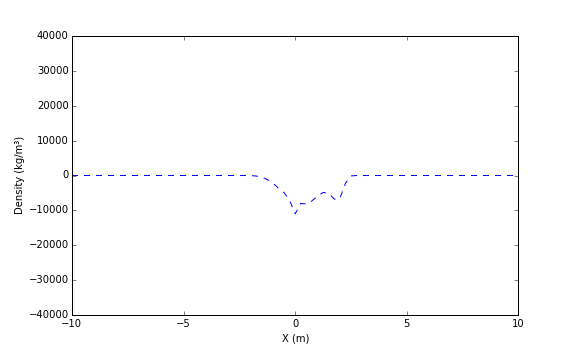
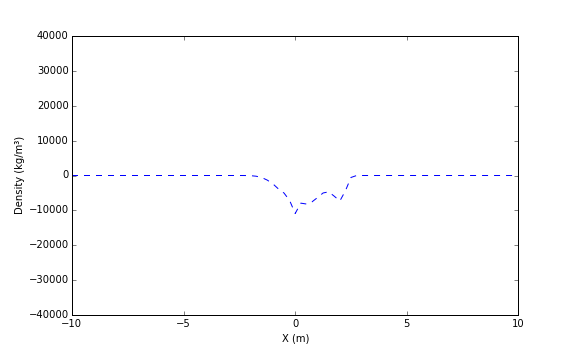
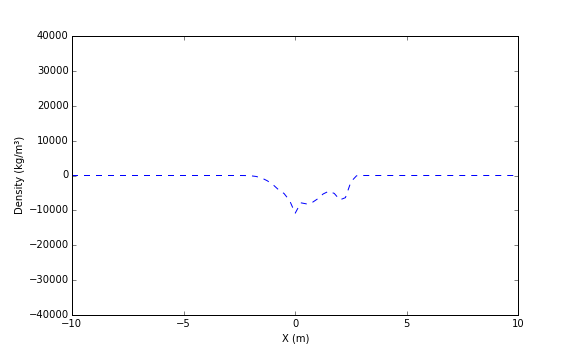
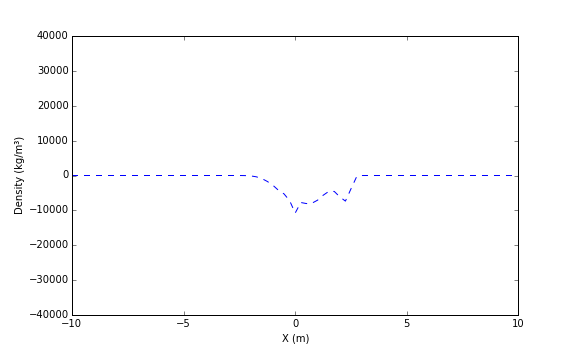
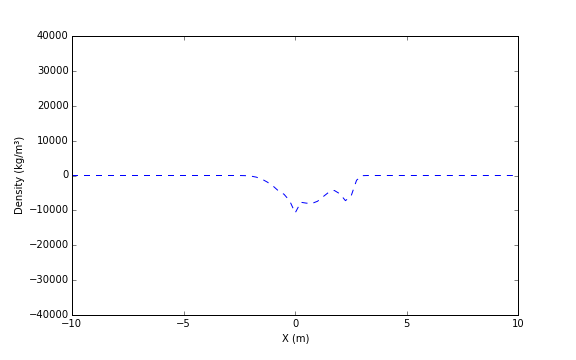
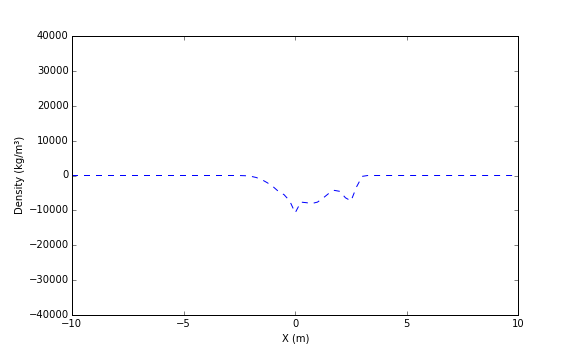
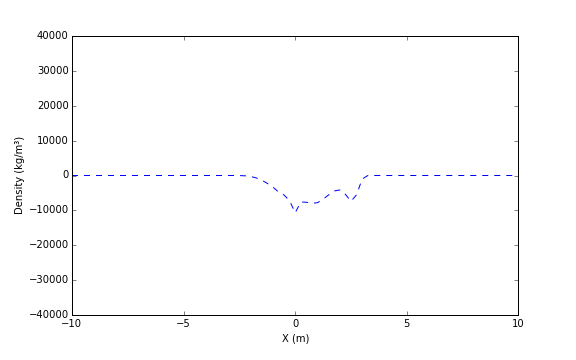
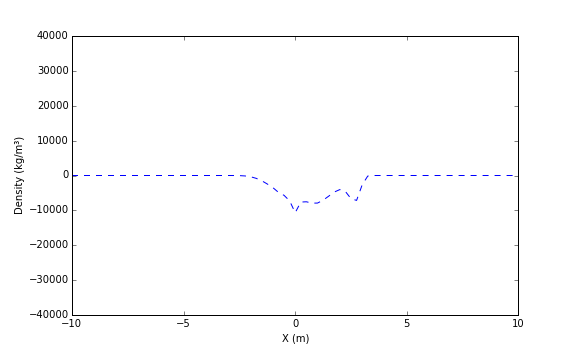
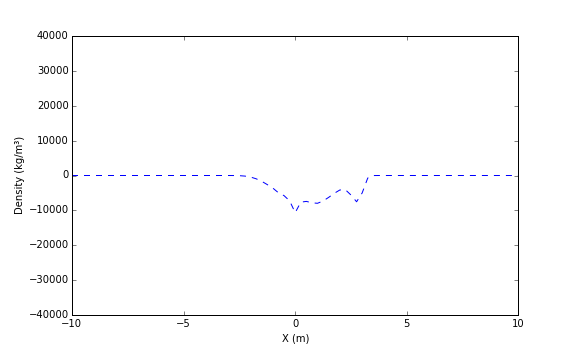
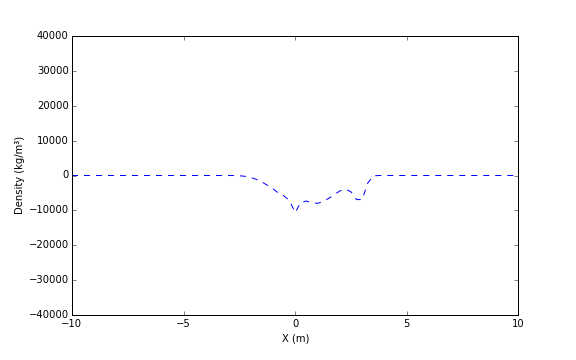
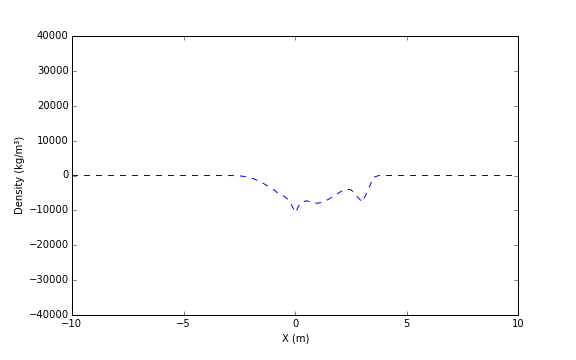
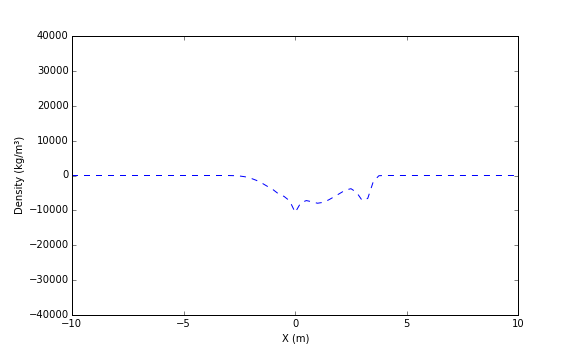
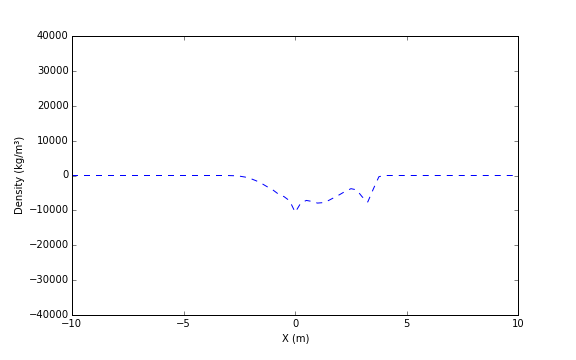
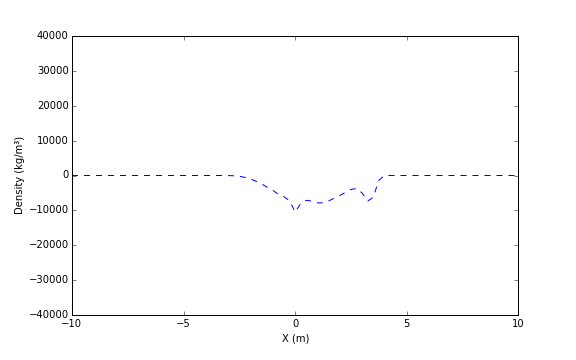
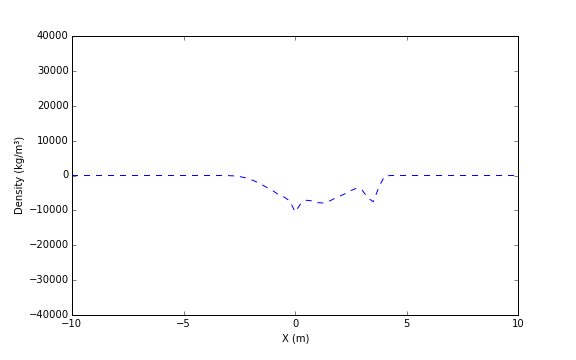
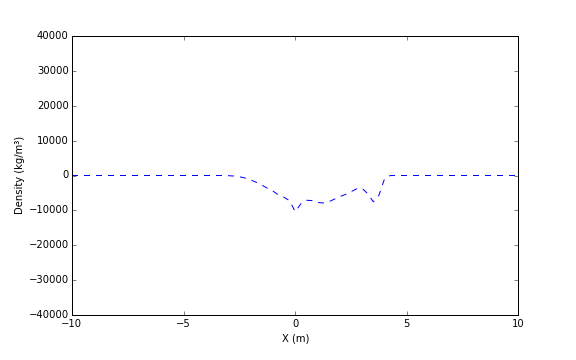
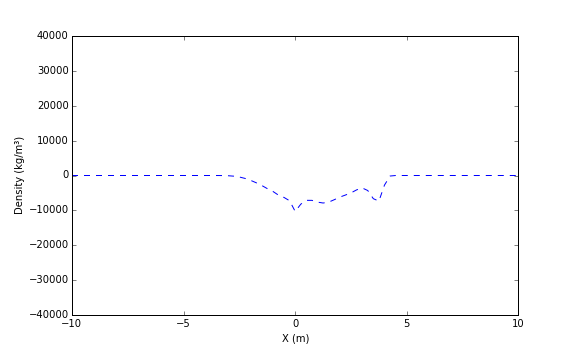
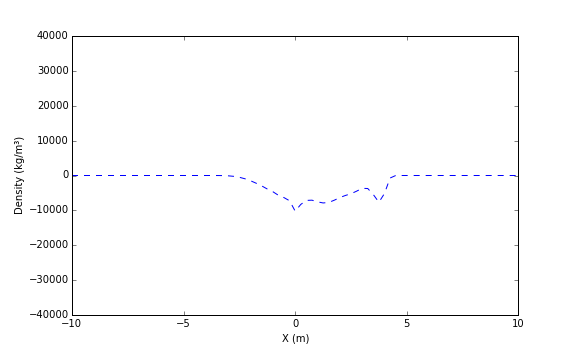
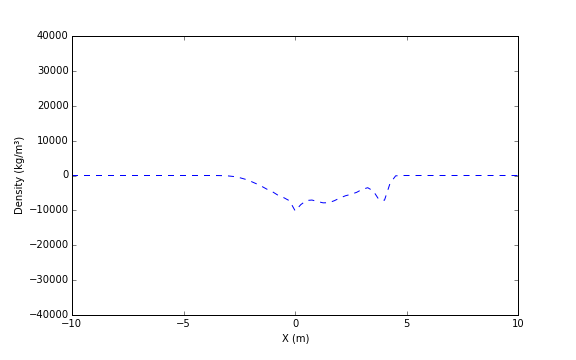
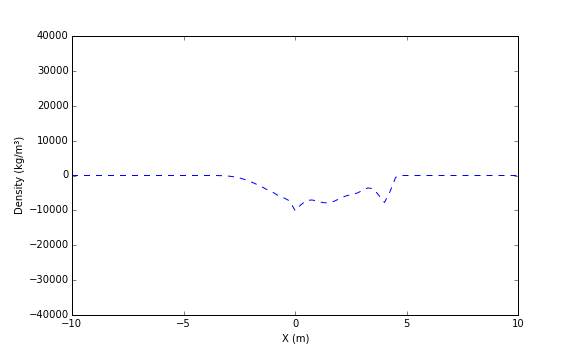
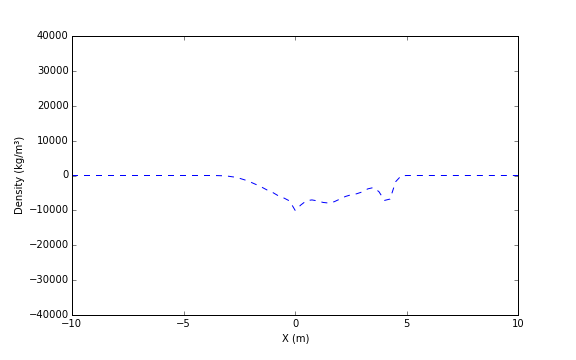
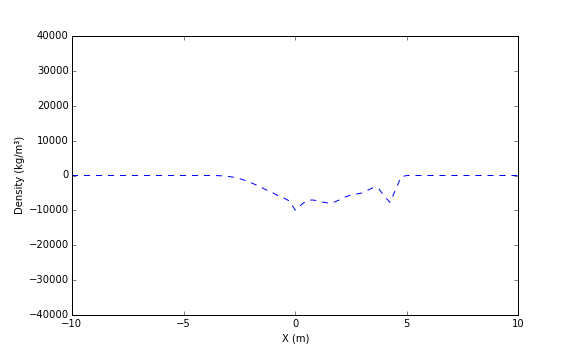
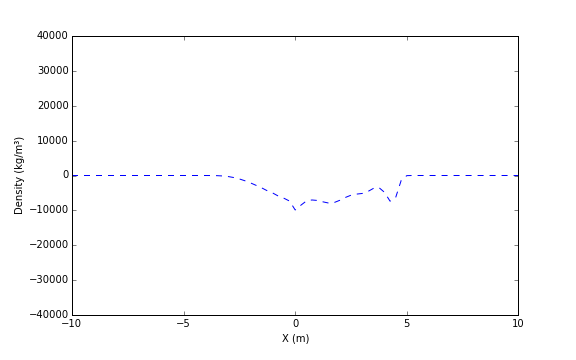
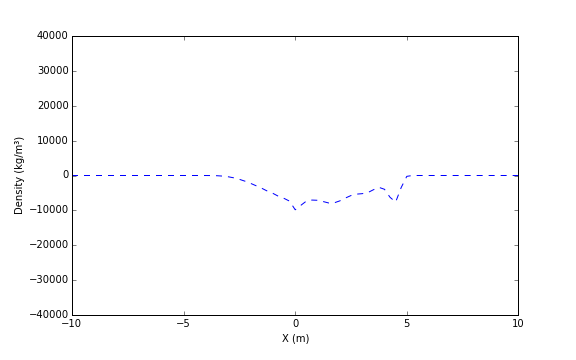
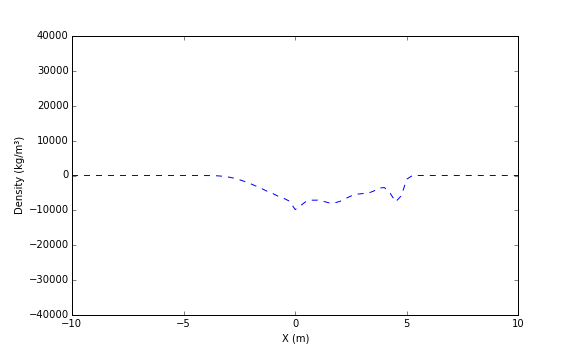
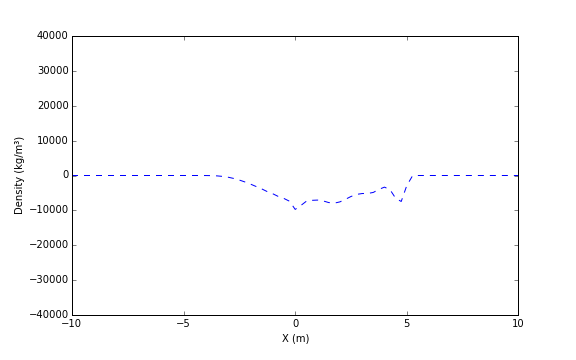
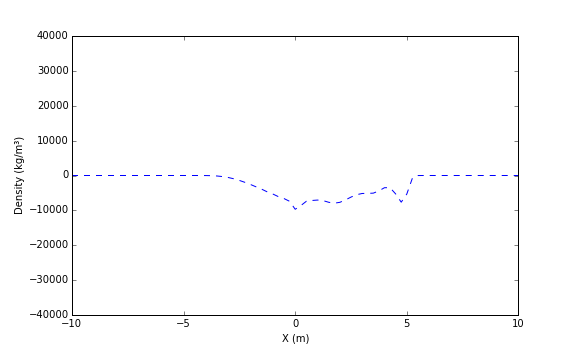
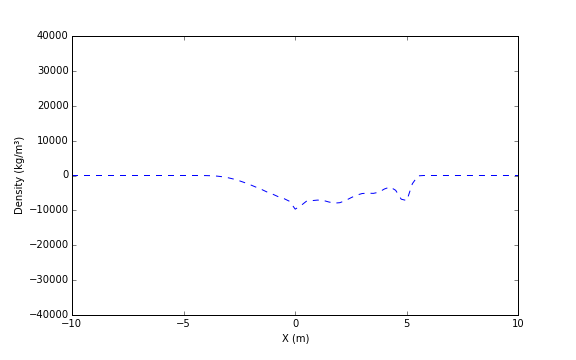
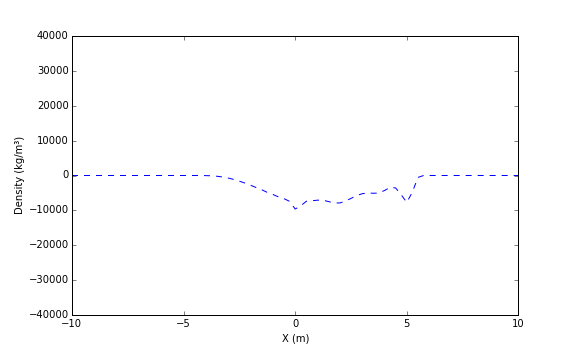
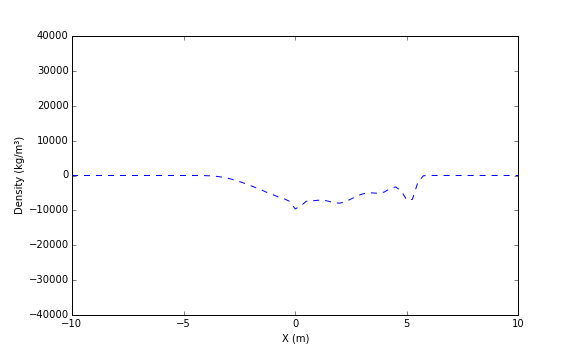
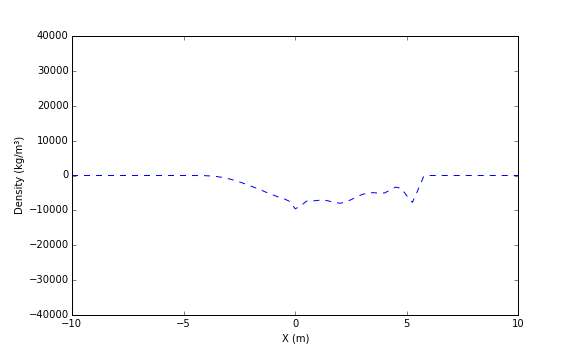
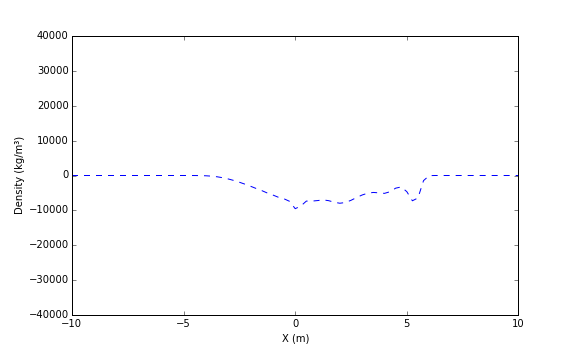
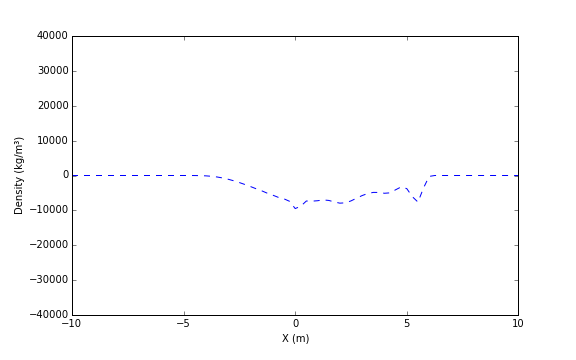
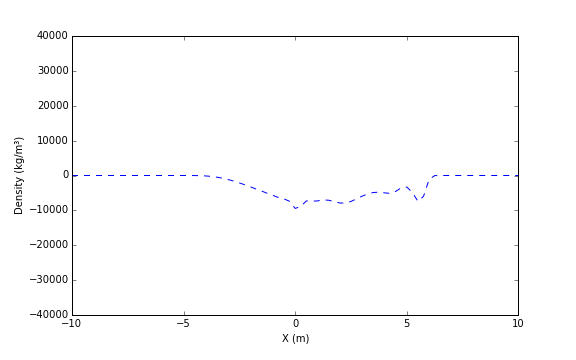
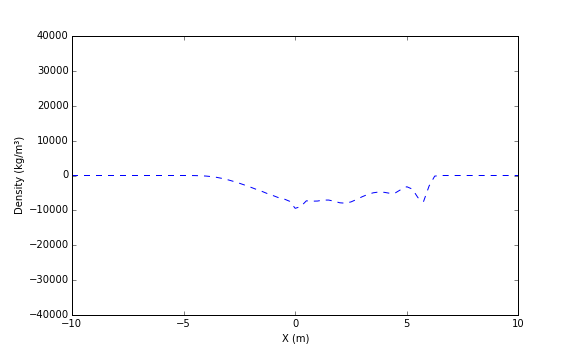
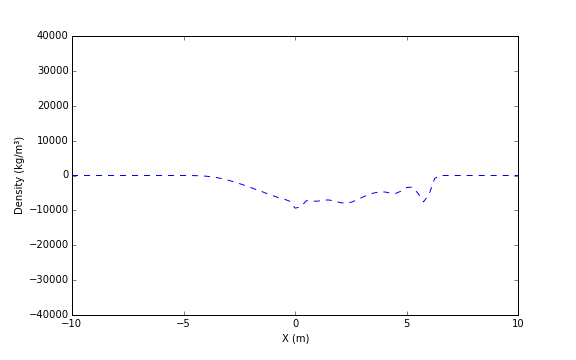
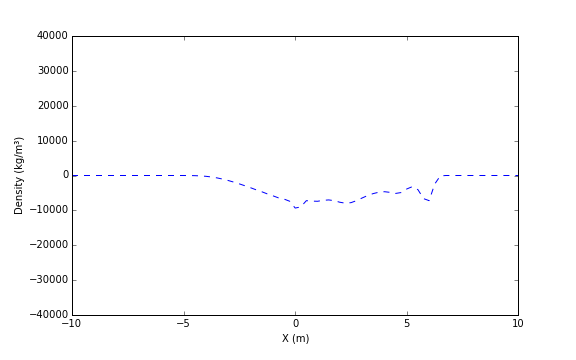
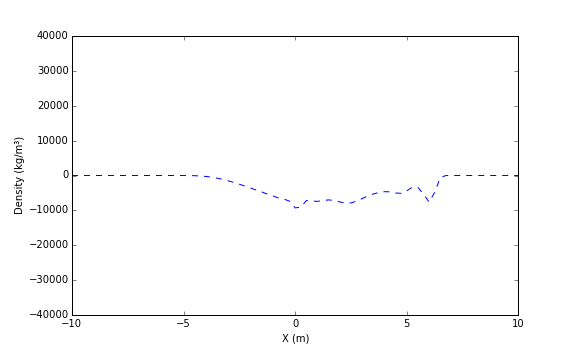
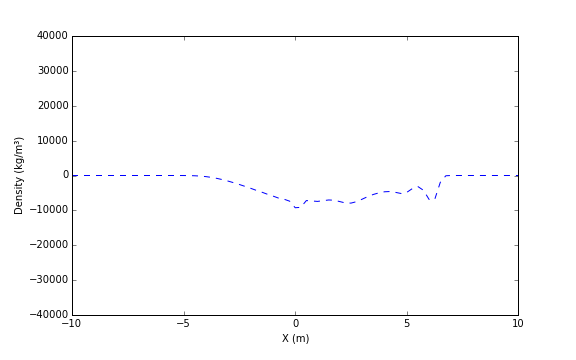
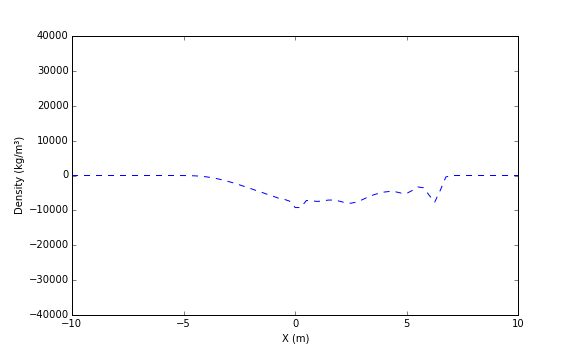
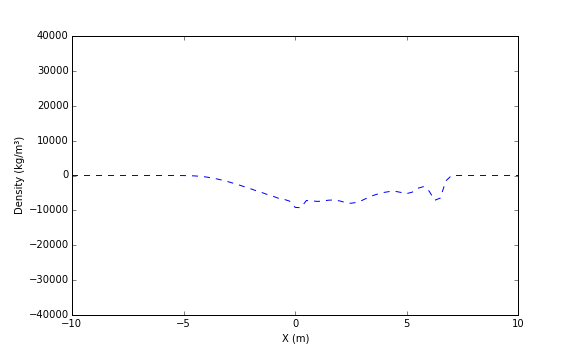
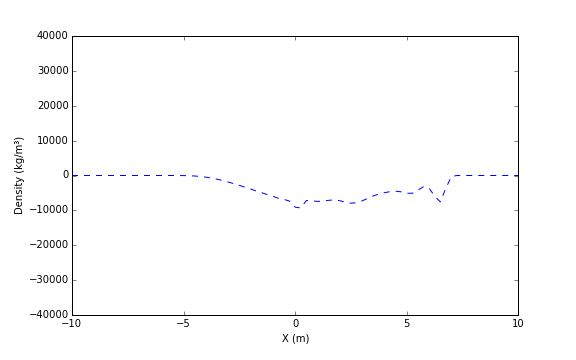
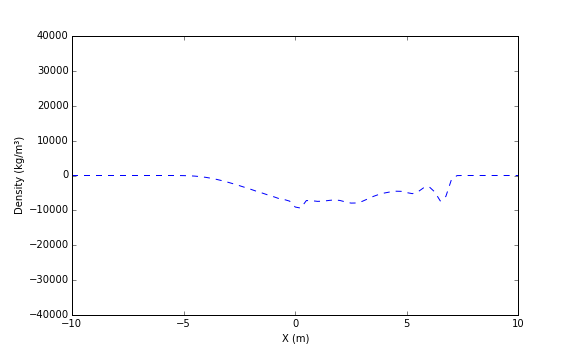
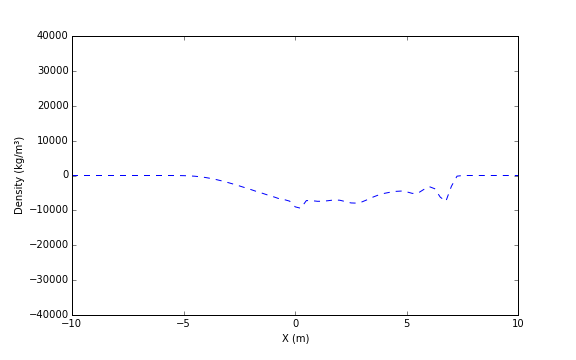
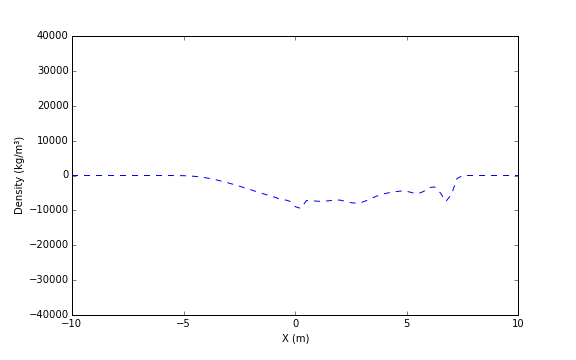
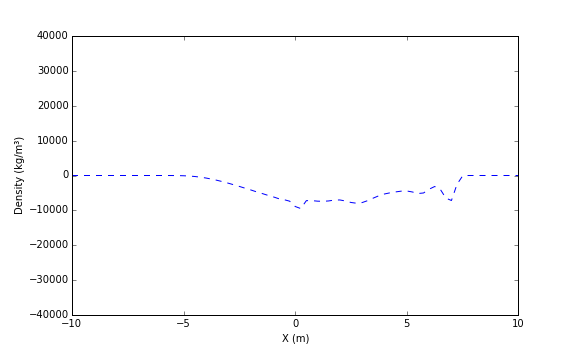
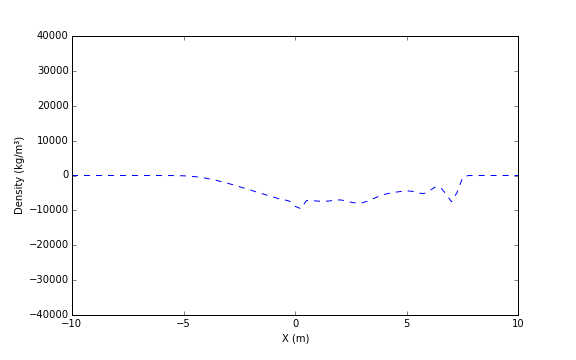
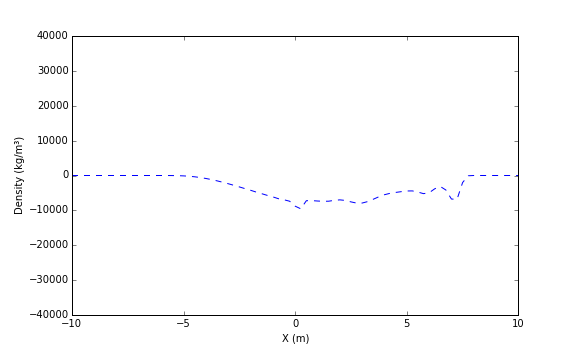
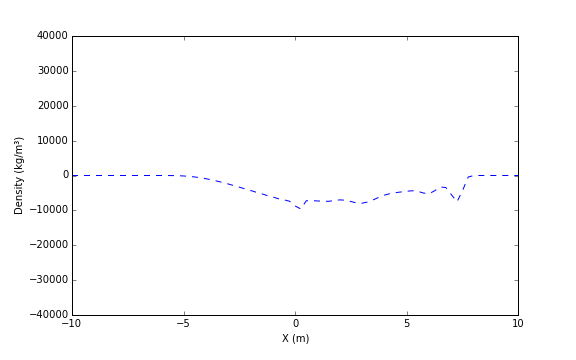
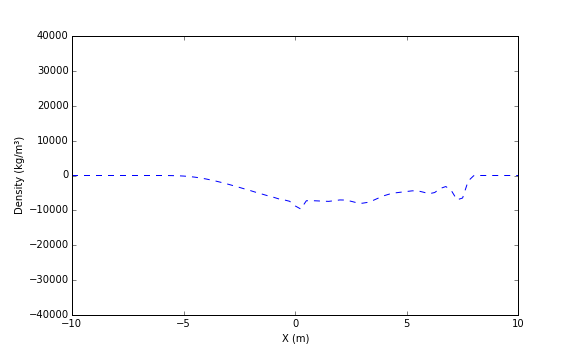
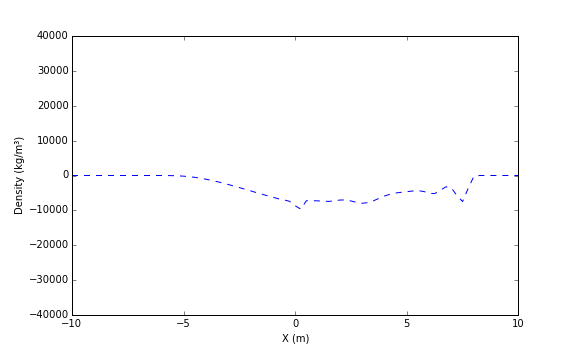
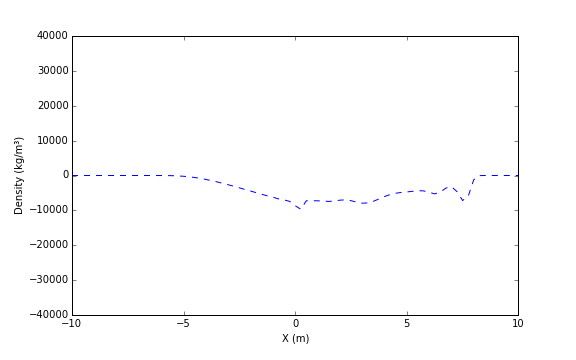
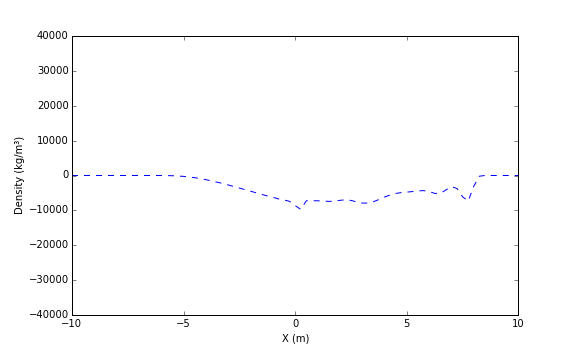
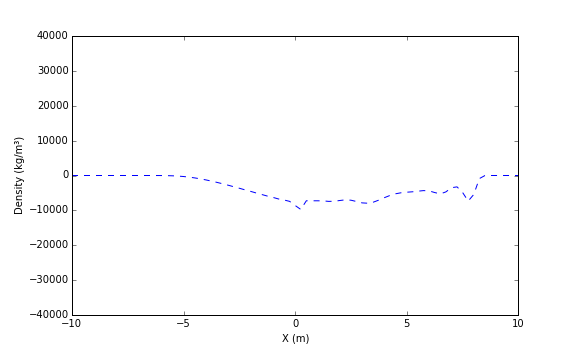
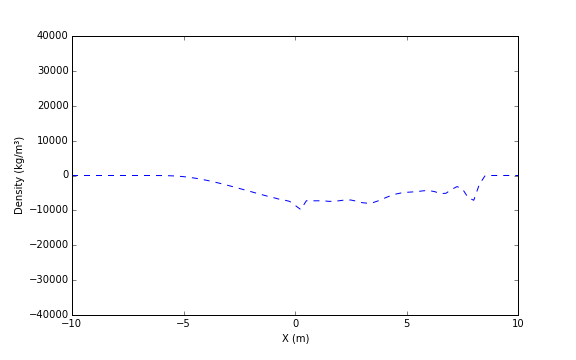
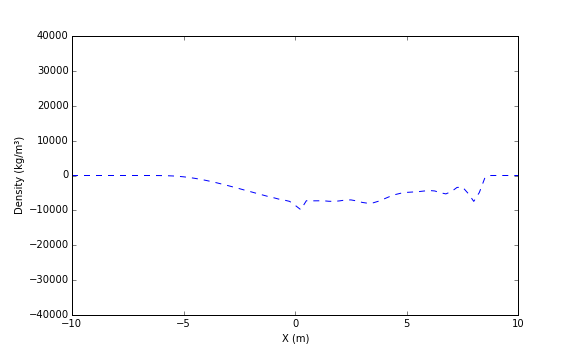
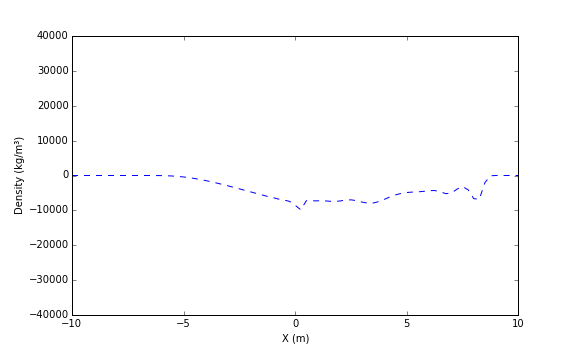
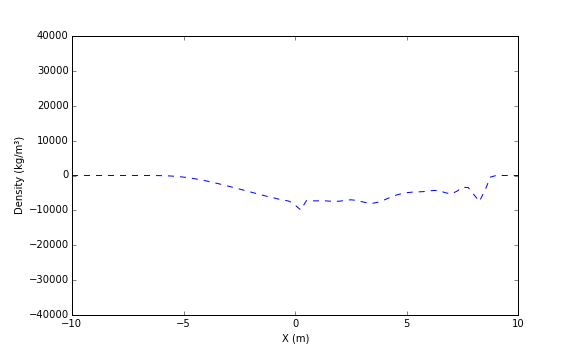
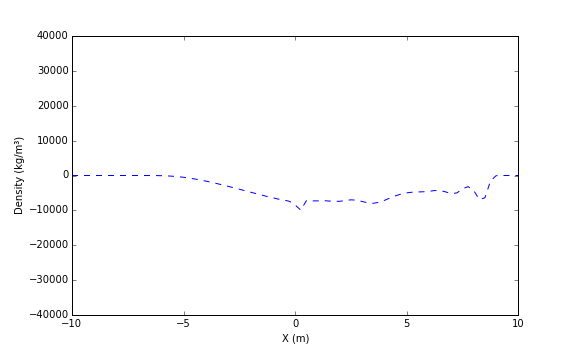
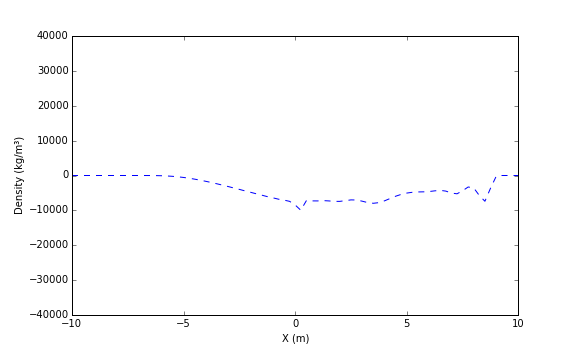
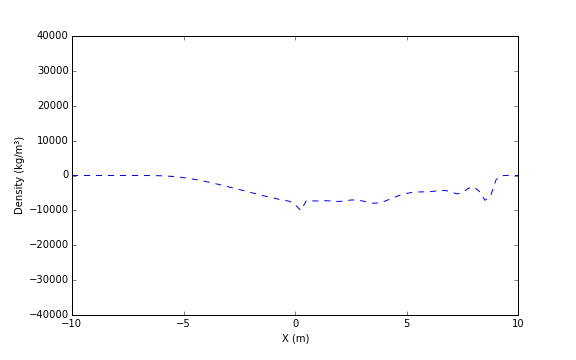
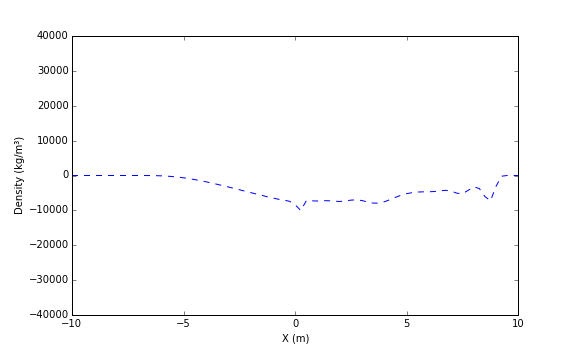
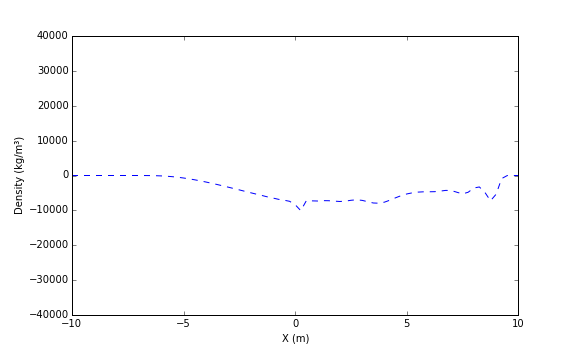
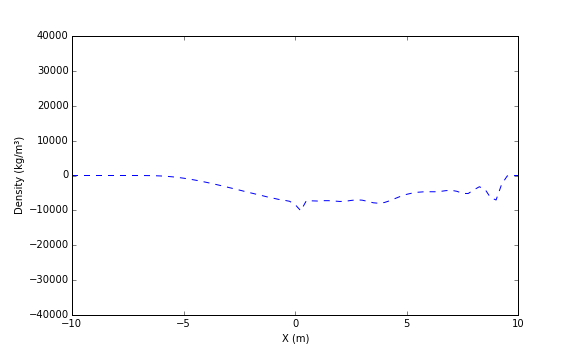
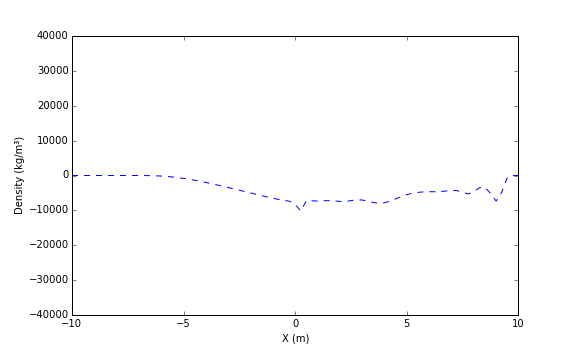
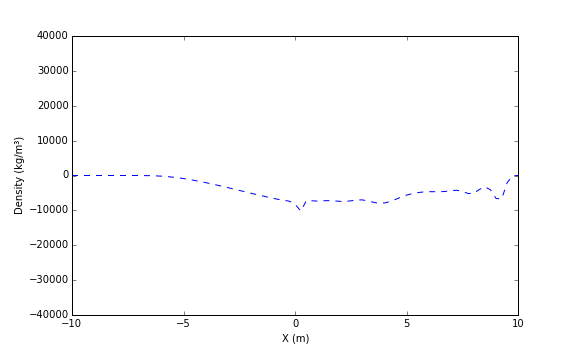
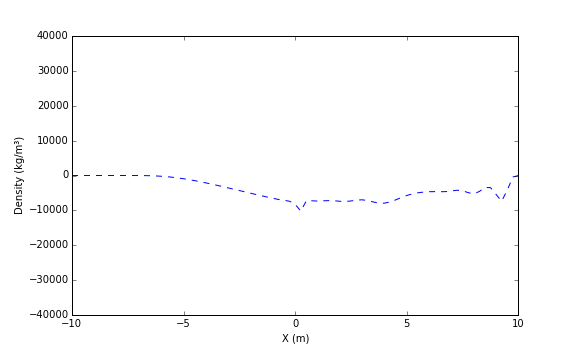
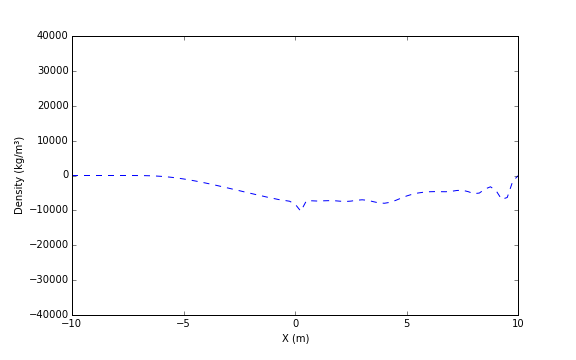
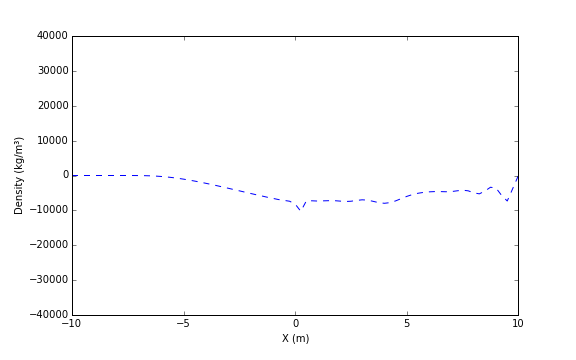
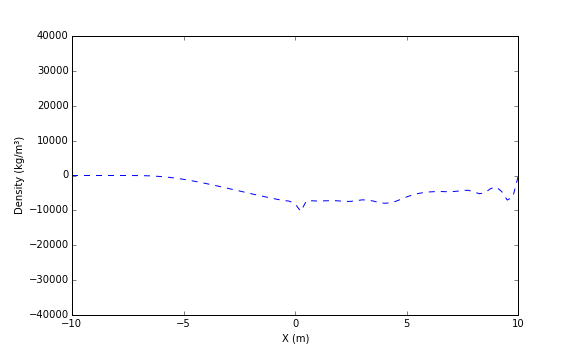
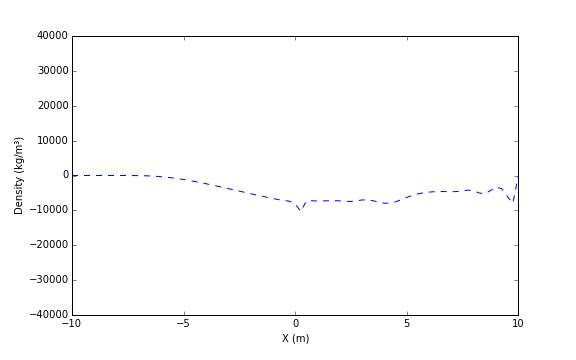
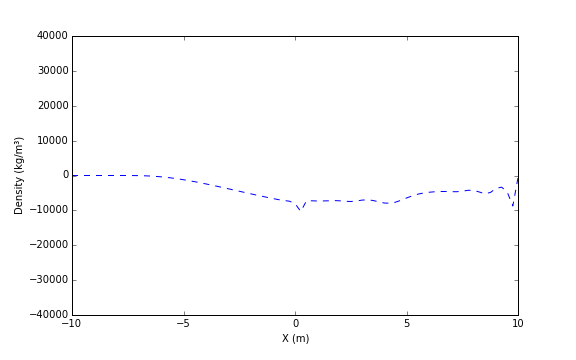
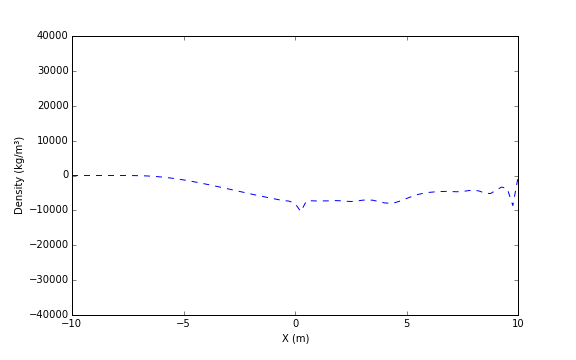
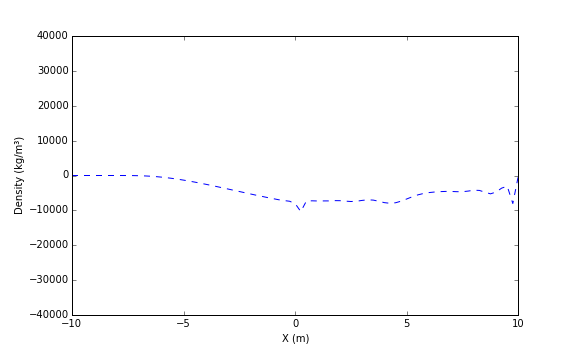
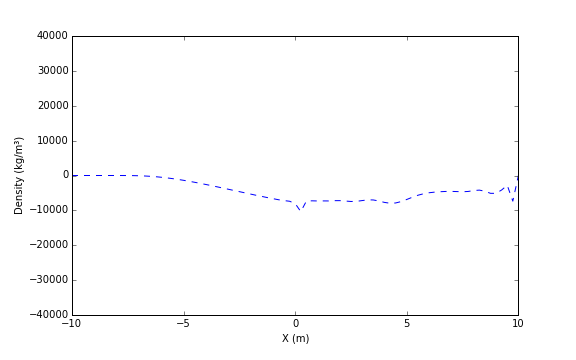
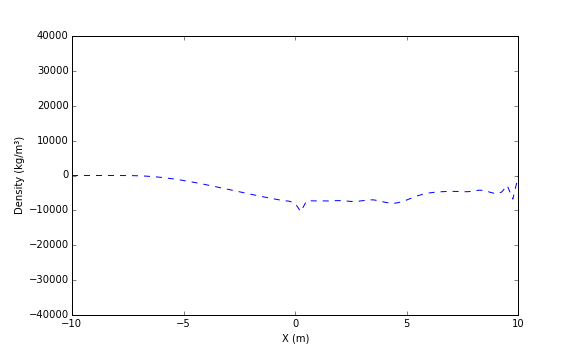
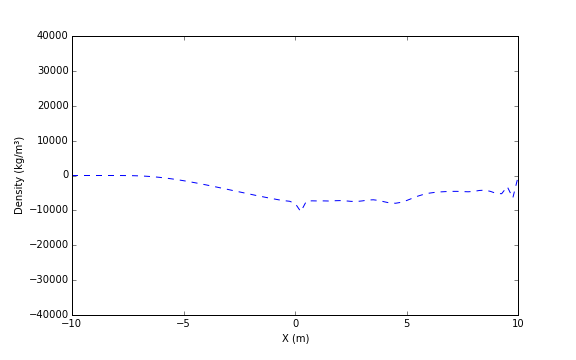
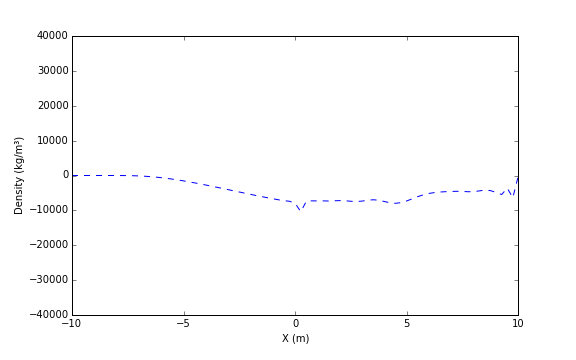
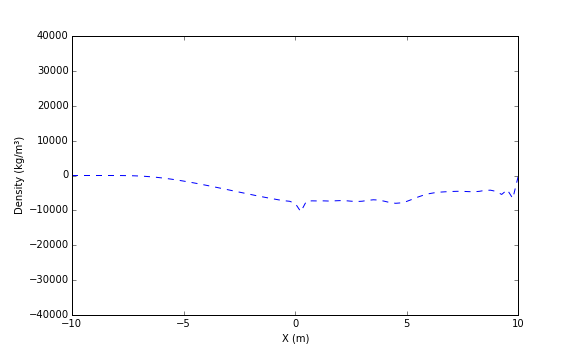
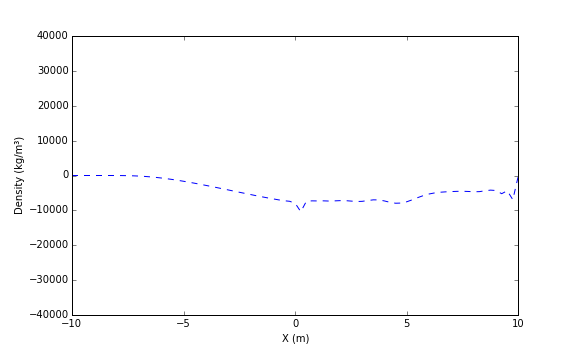
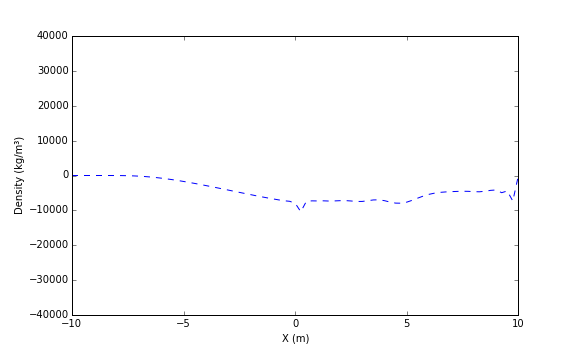
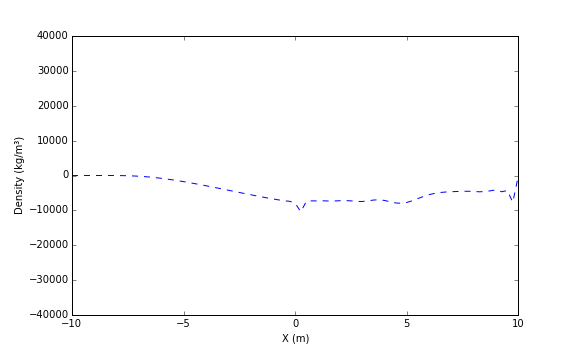
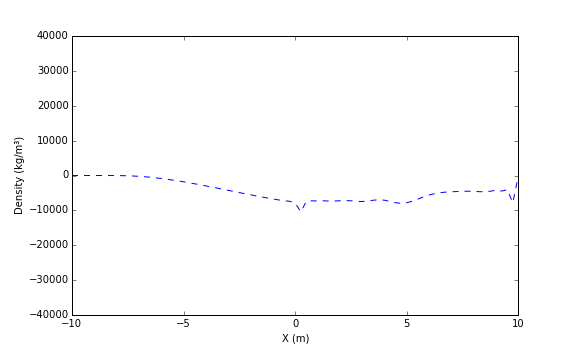
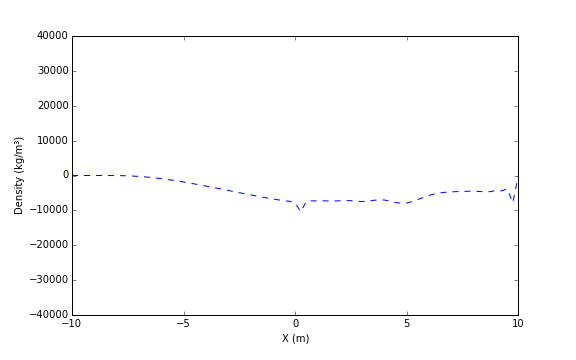
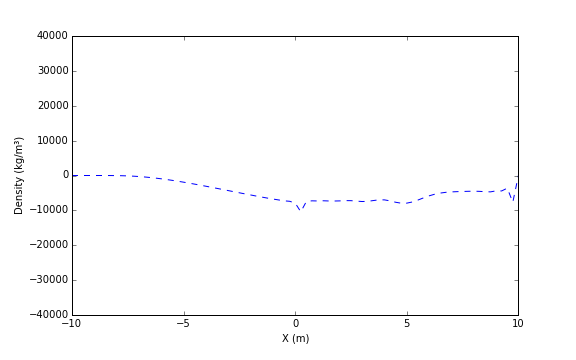
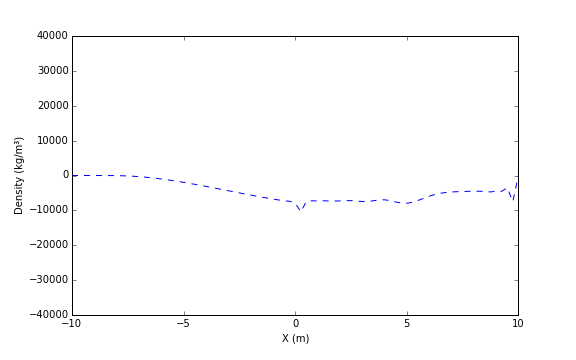
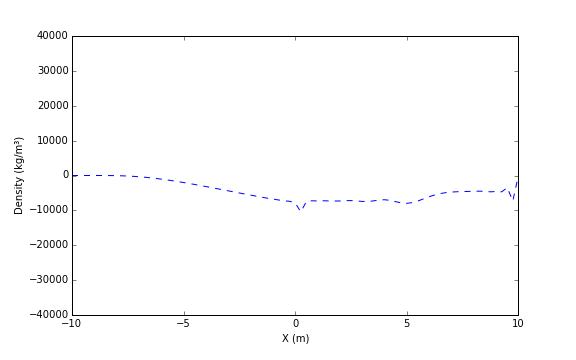
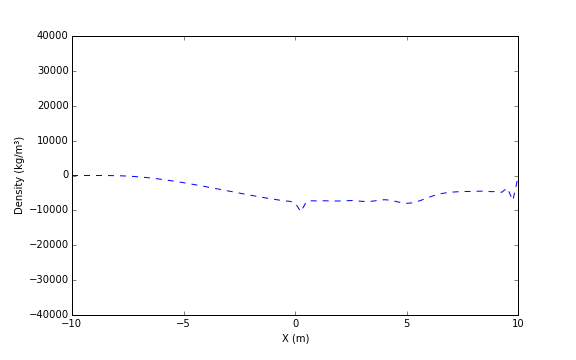
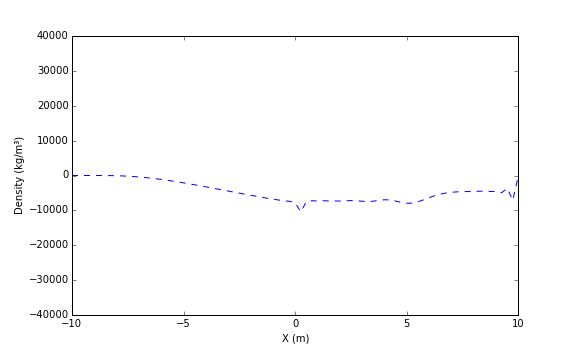
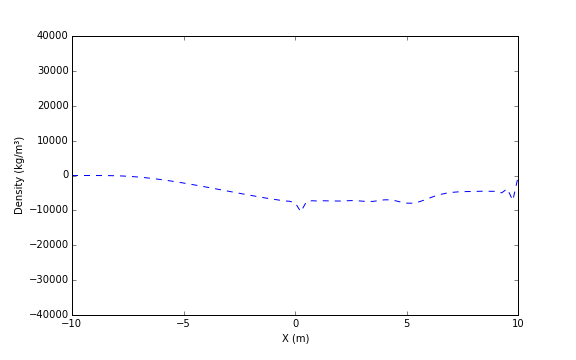
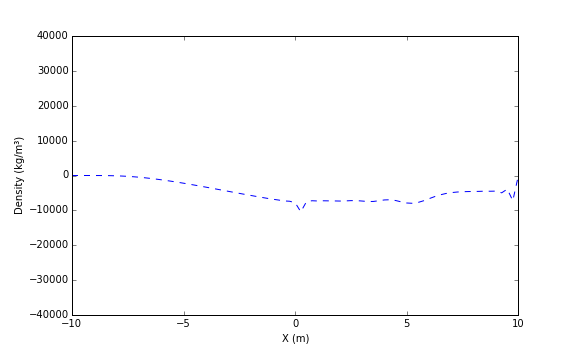
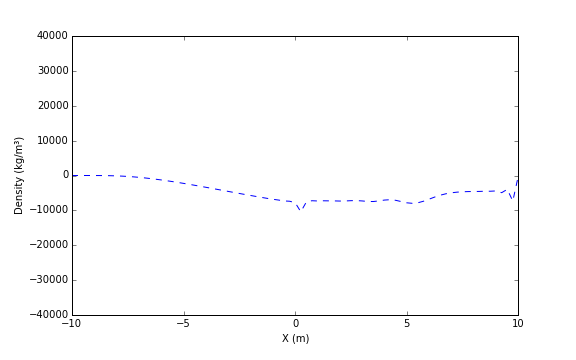
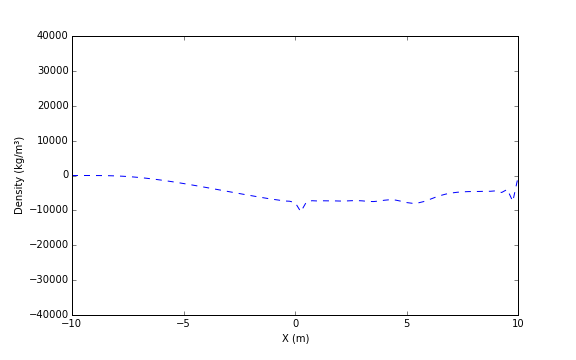
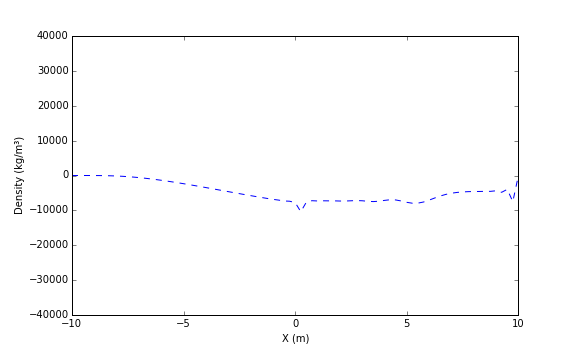
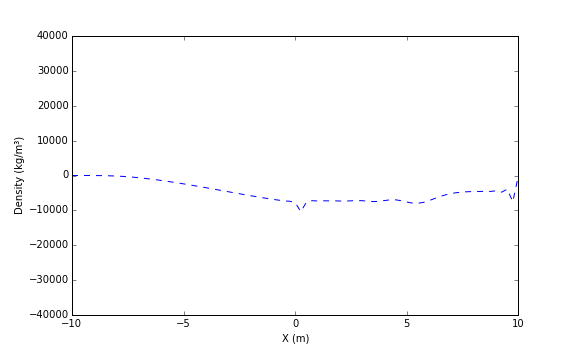
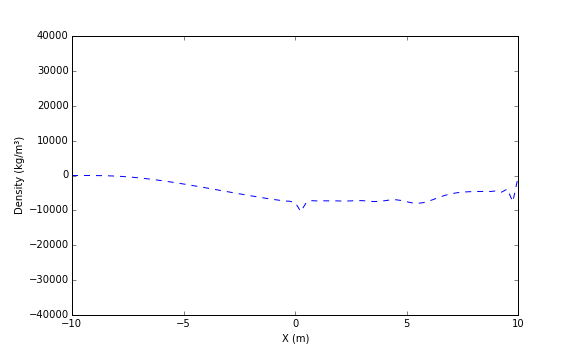
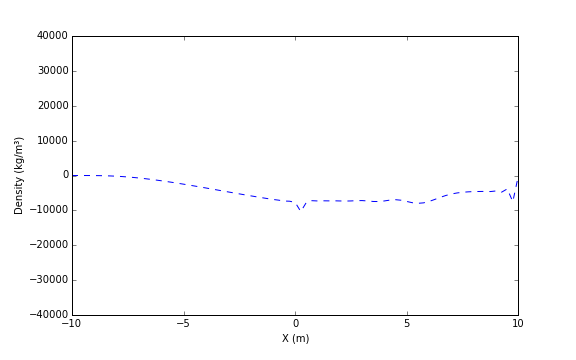
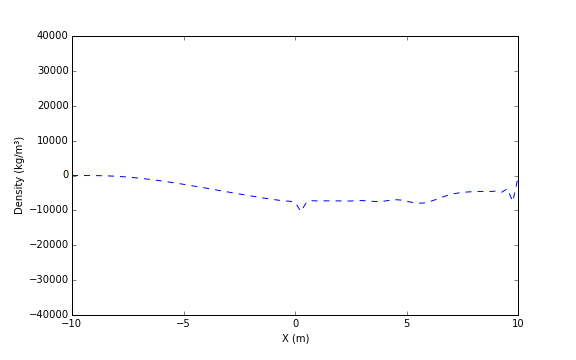
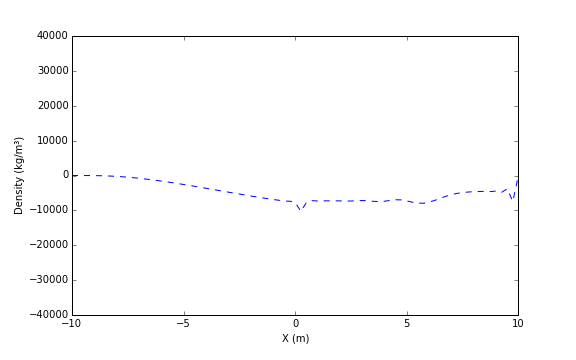
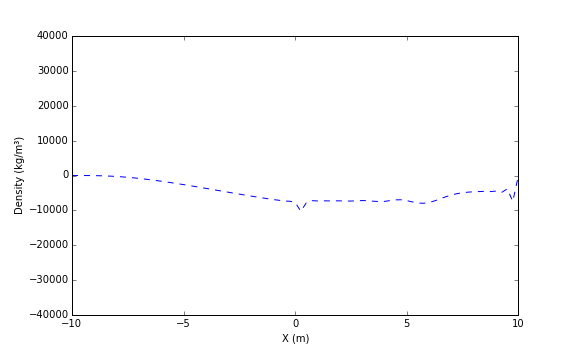
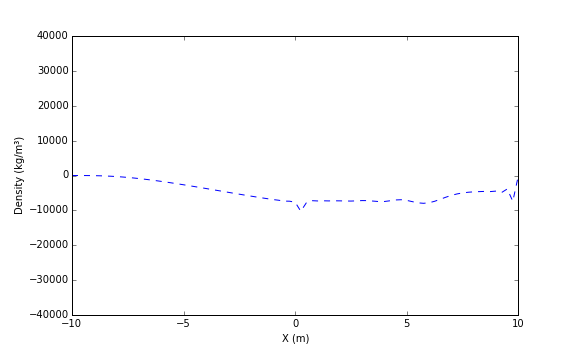
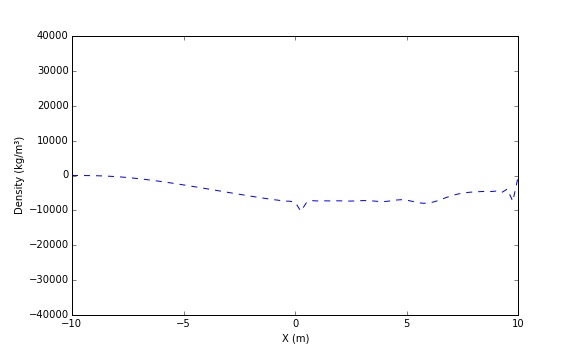
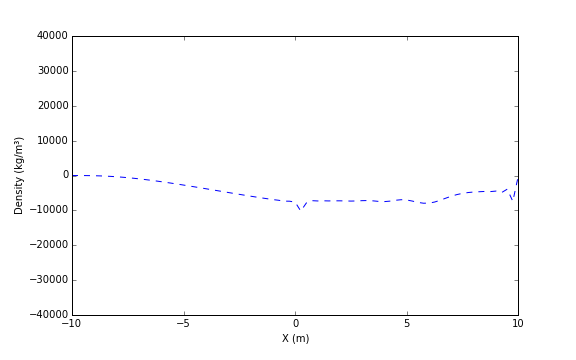
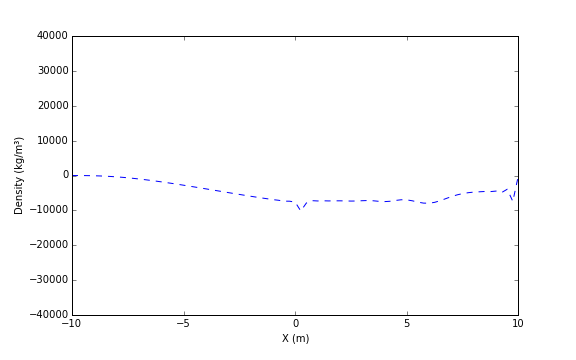
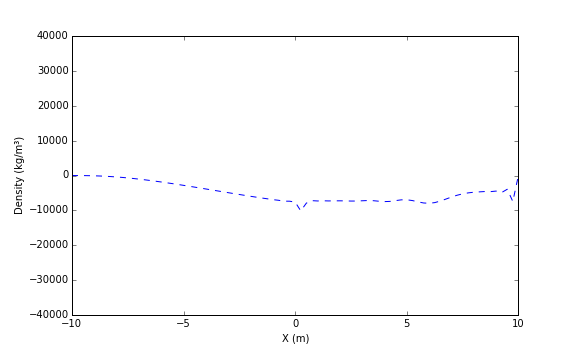
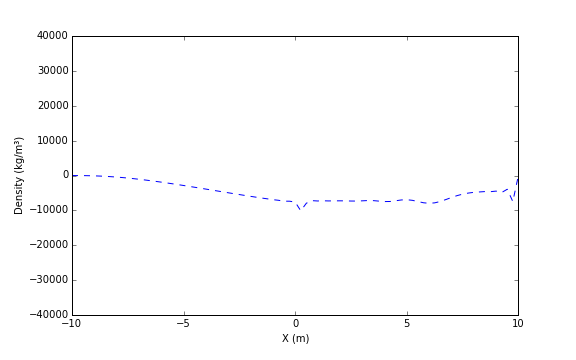
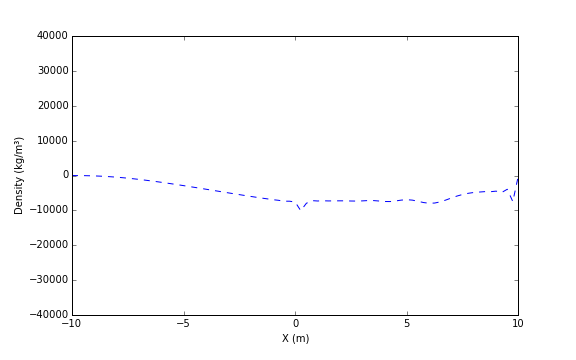
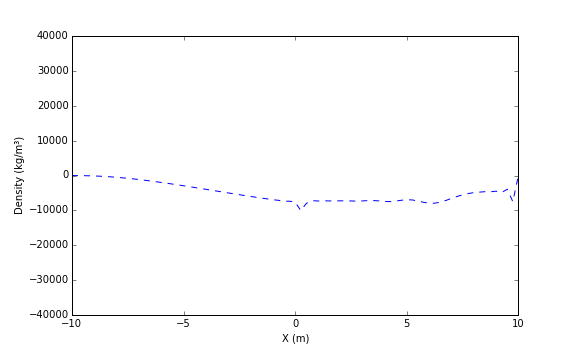
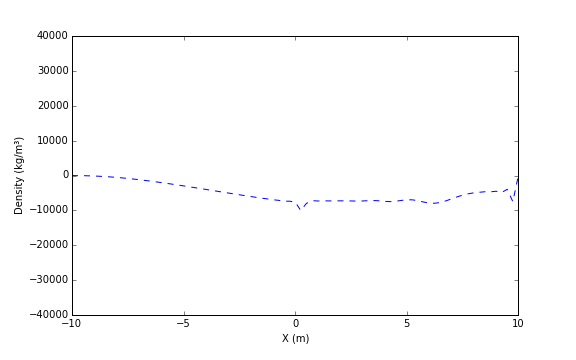
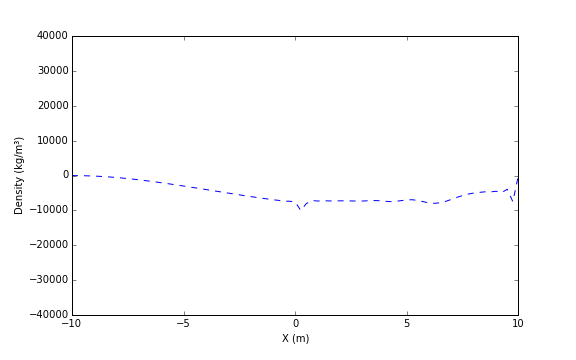
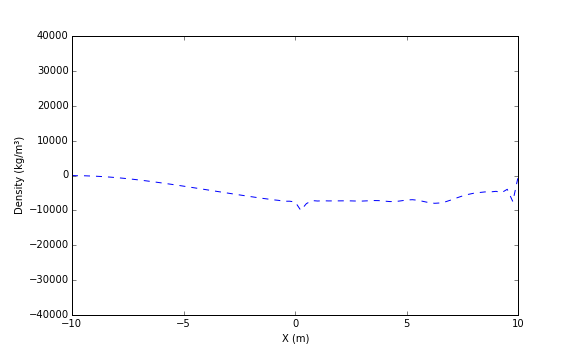
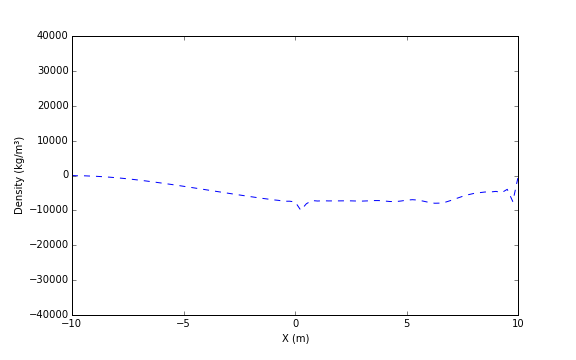
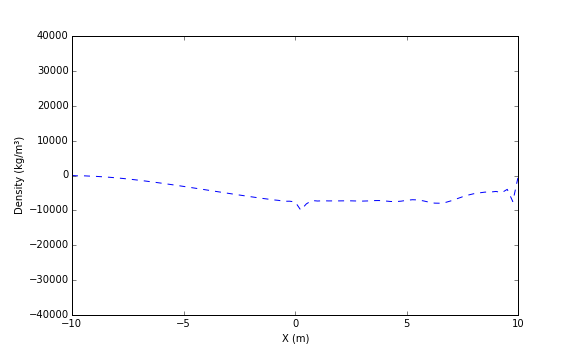
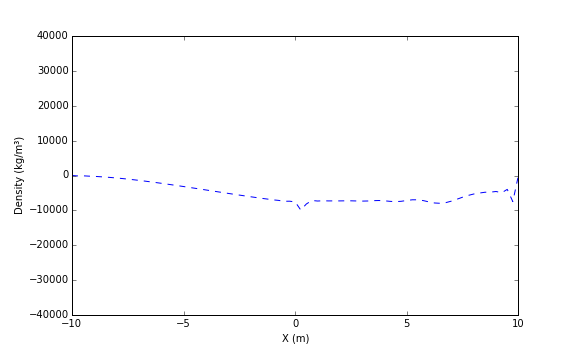
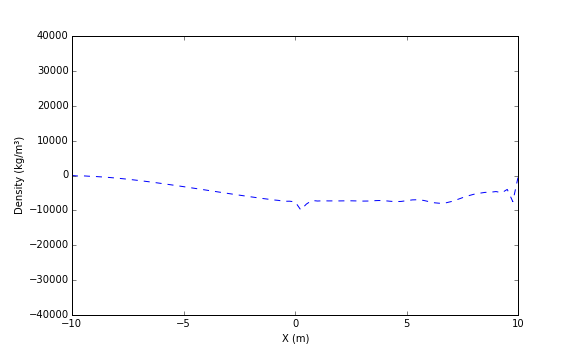
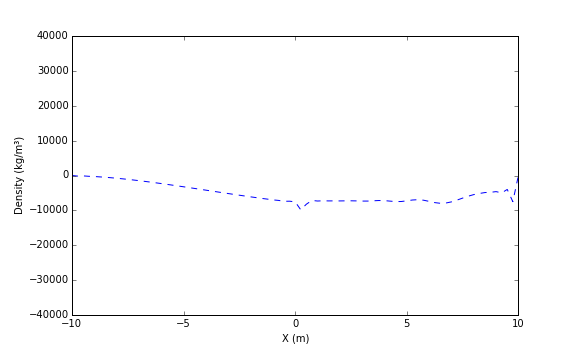
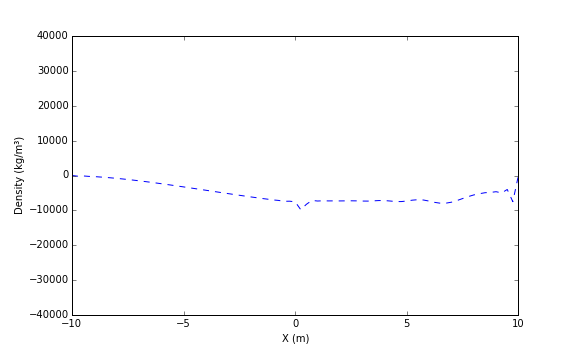
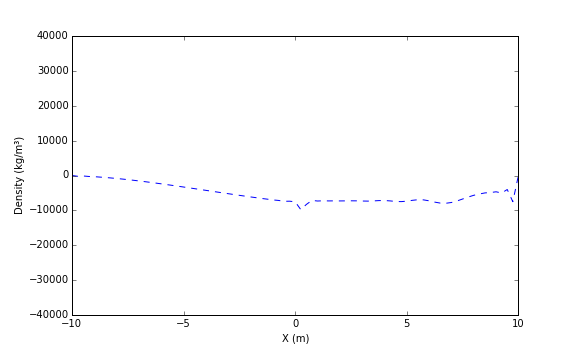
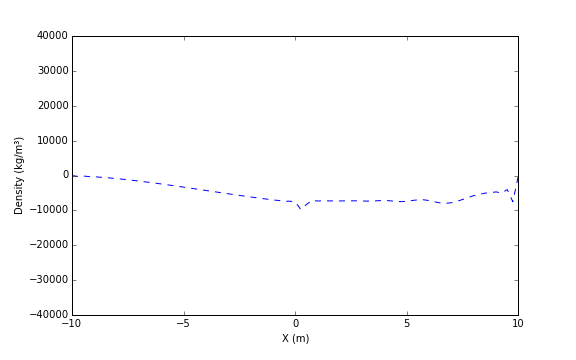
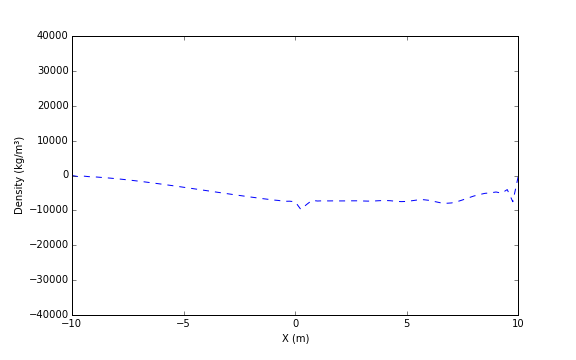
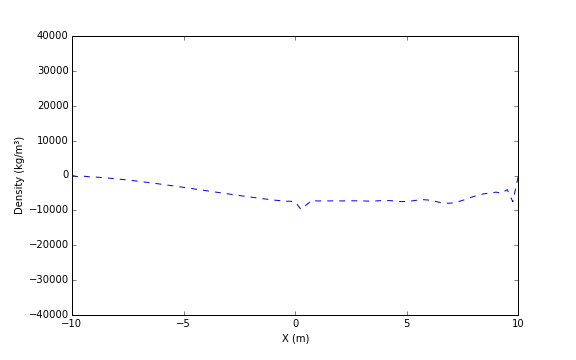
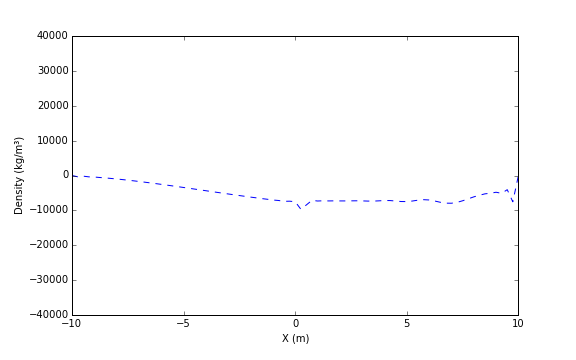
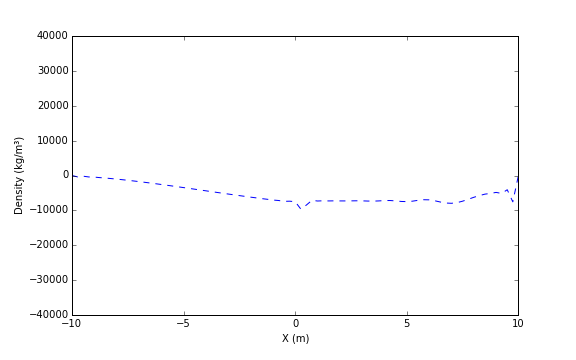
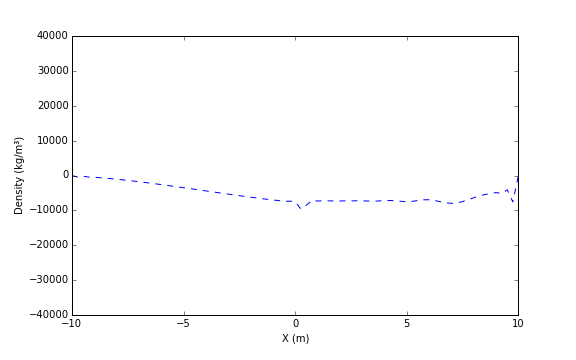
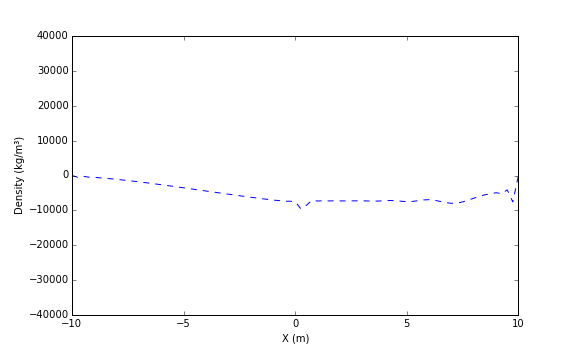
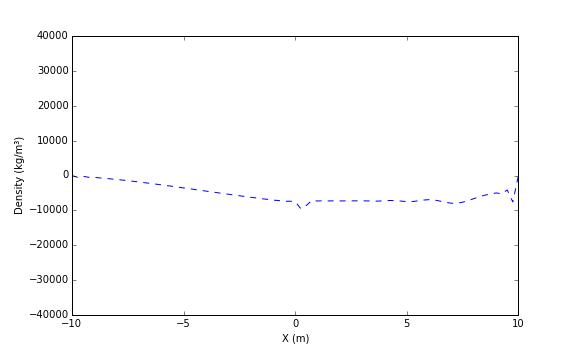
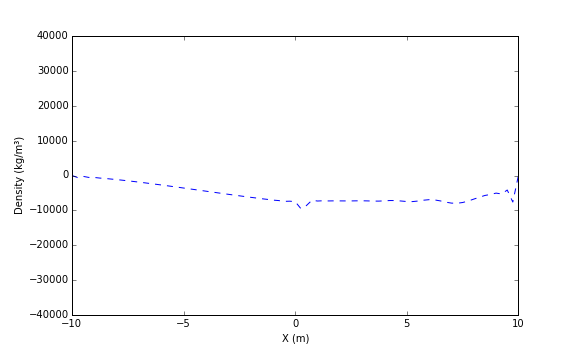
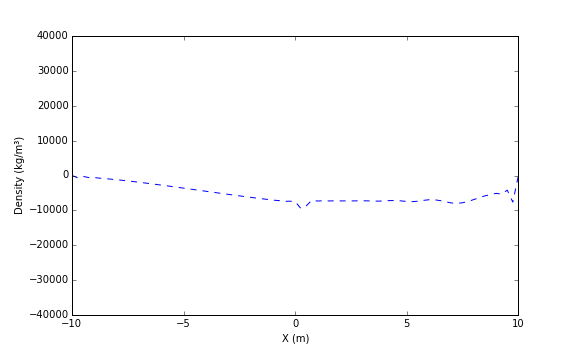

In [9]:
visual(Utot,2,(-40000,40000),"X (m)","Density (kg/m³)")